In [1]:
from road import Road
from vehicle_sim import IntraRoadSimulator
from sidewalk import Sidewalk 
from passenger_sim import Passenger_Simulator
from main_sim import IntegratedSimulator

In [2]:
allowed_rows_input = [
    (0, {"jeep"}), # Row 0 allowed for lane changing
    (1, {"jeep"}),  
    (2, {"jeep", "truck"})  # Row 2 allowed for lane changing
]
jeepney_allowed_rows = [0, 2] #allowed rows for initialization
truck_allowed_rows = [ 2]  #allowed rows for initialization
safe_stopping_speed = 2
safe_deceleration = 2

In [3]:
# Create the sidewalk and road designations (for both pedestrian and vehicle simulators)
sidewalk = Sidewalk(length=50, width=1, max_passengers_per_cell=20)
road_designation = Road(length=50, width=4,speed_limit=5, allowed_rows =allowed_rows_input)
print(f"The allowed rows for each vehicle are {road_designation.allowed_rows}")
# Initialize the vehicle simulator (intra-road simulator) with required parameters
vehicle_simulator = IntraRoadSimulator(road=road_designation)

# Initialize the pedestrian simulator
pedestrian_simulator = Passenger_Simulator(
    sidewalk = sidewalk,
    passenger_arrival_rate = 1,  # Arrival rate of passengers per timestep
    road_designation=road_designation,
    max_passengers_per_cell = 20,
    vehicle_simulator = vehicle_simulator  # Pass the vehicle simulator to handle interactions
)

# Now, initialize the integrated simulator with both simulators
integrated_simulator = IntegratedSimulator(vehicle_simulator=vehicle_simulator, pedestrian_simulator=pedestrian_simulator)

The allowed rows for each vehicle are [(0, {'jeep'}), (1, {'jeep'}), (2, {'jeep', 'truck'})]


/home/jovyan/.conda-envs/cx_team/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jovyan/.conda-envs/cx_team/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


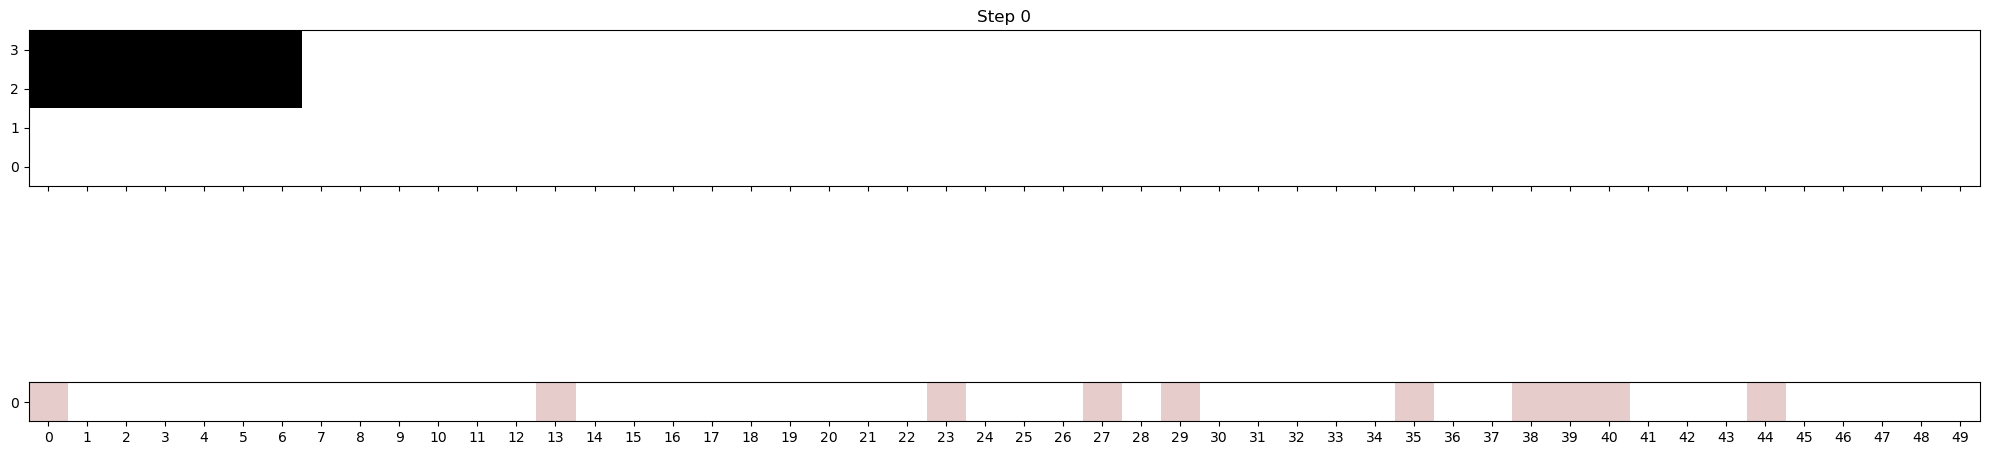

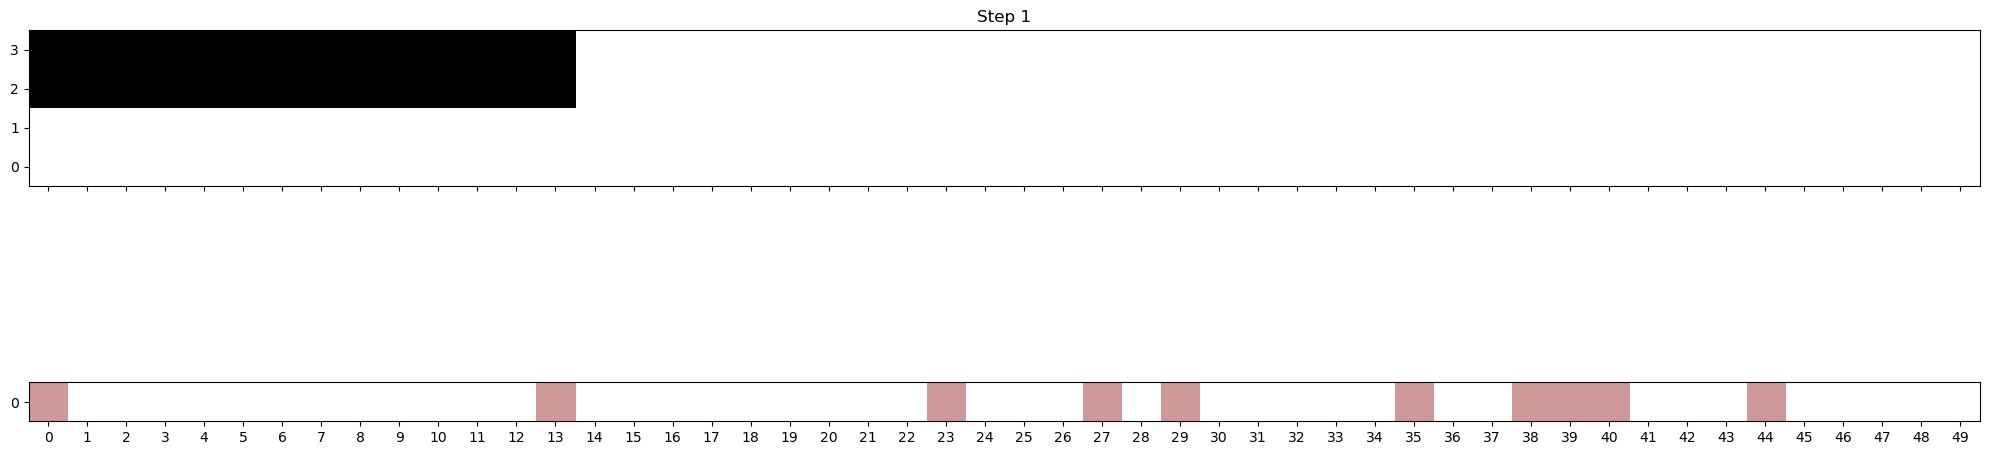

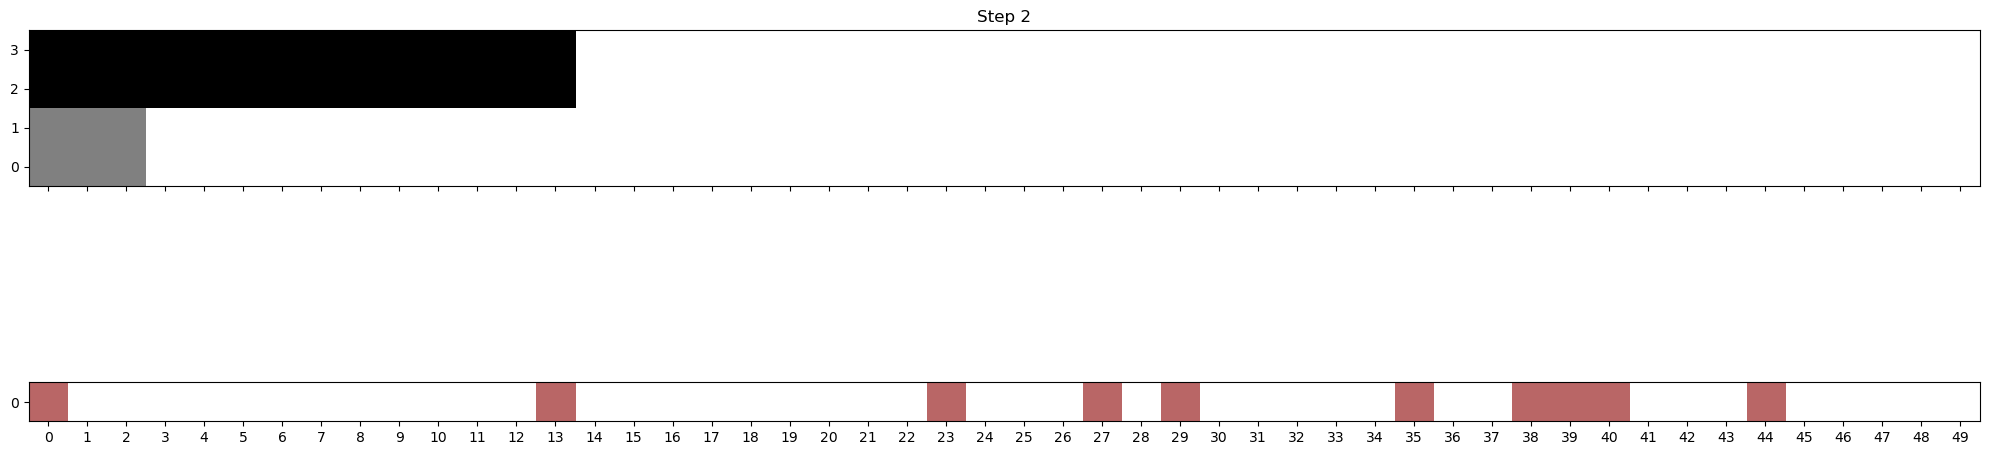

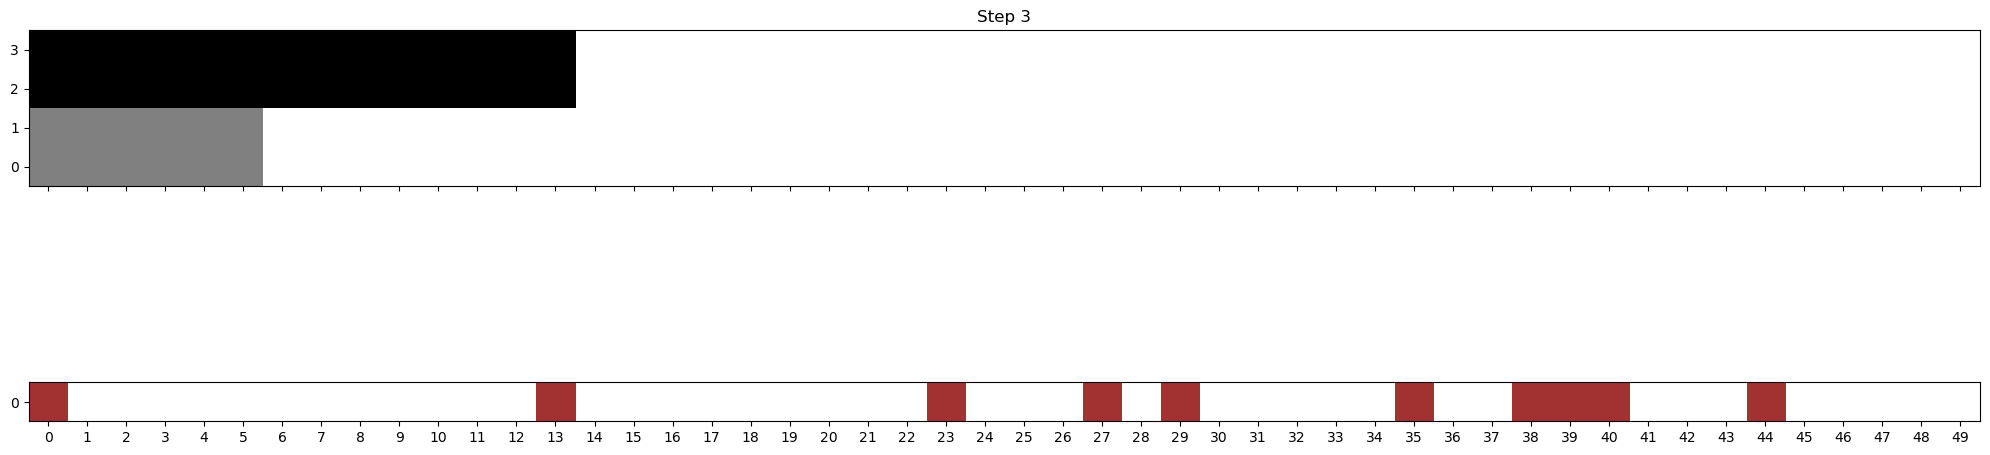

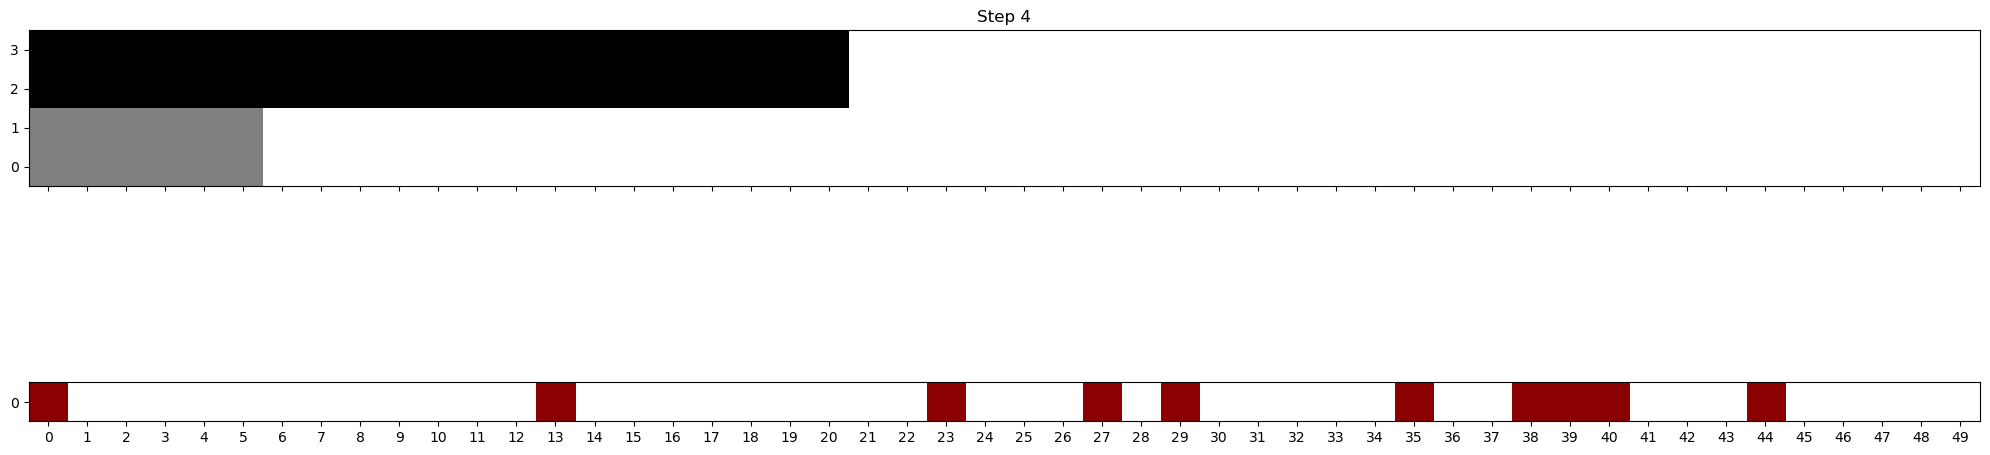

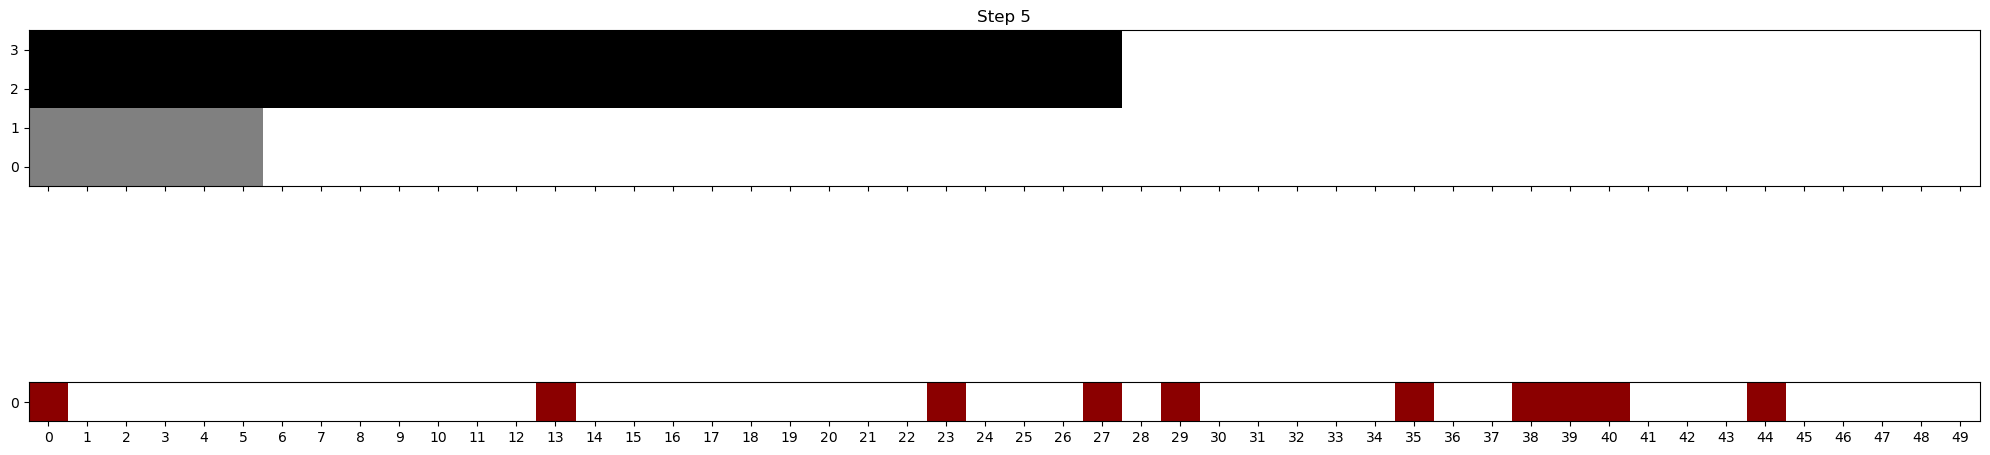

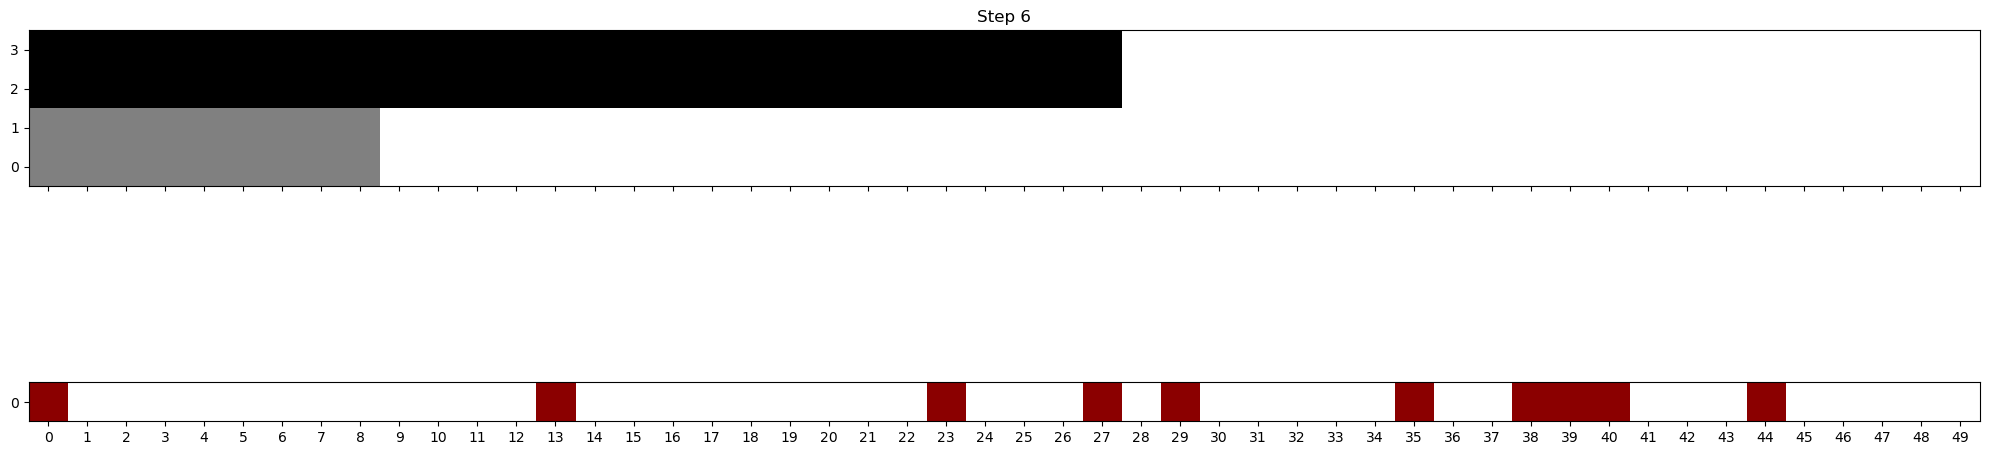

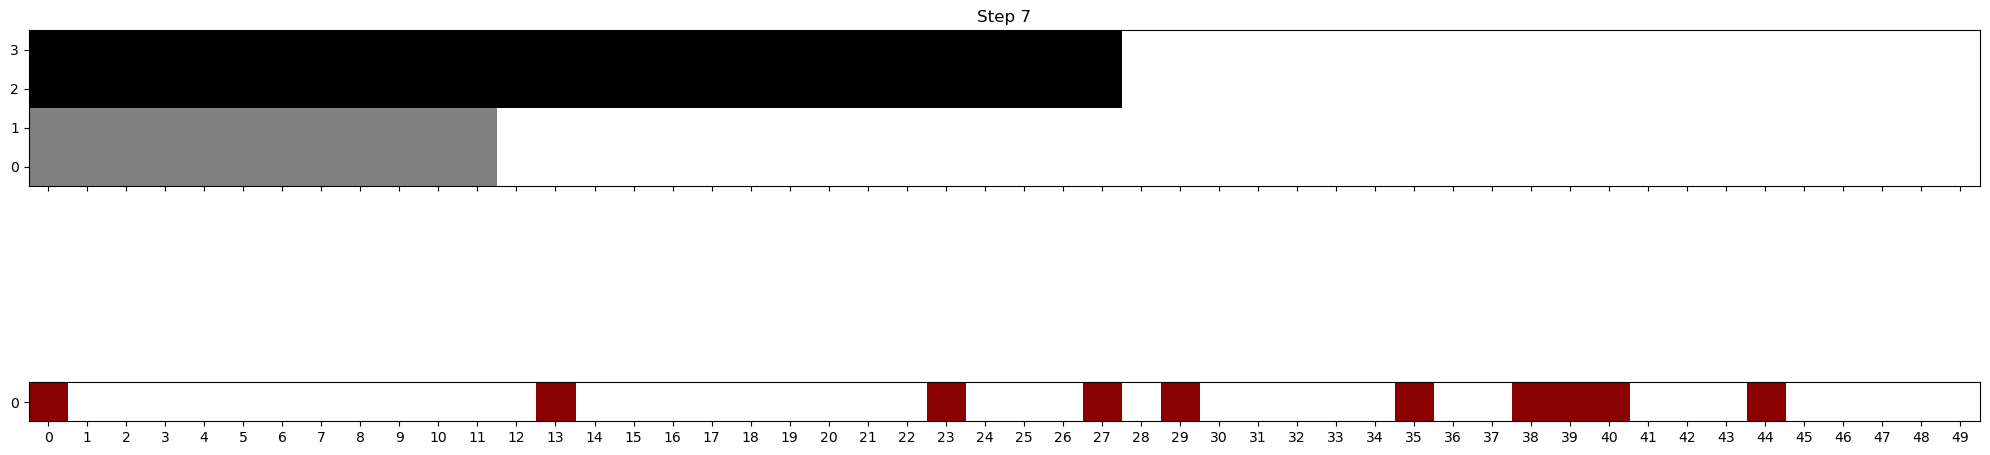

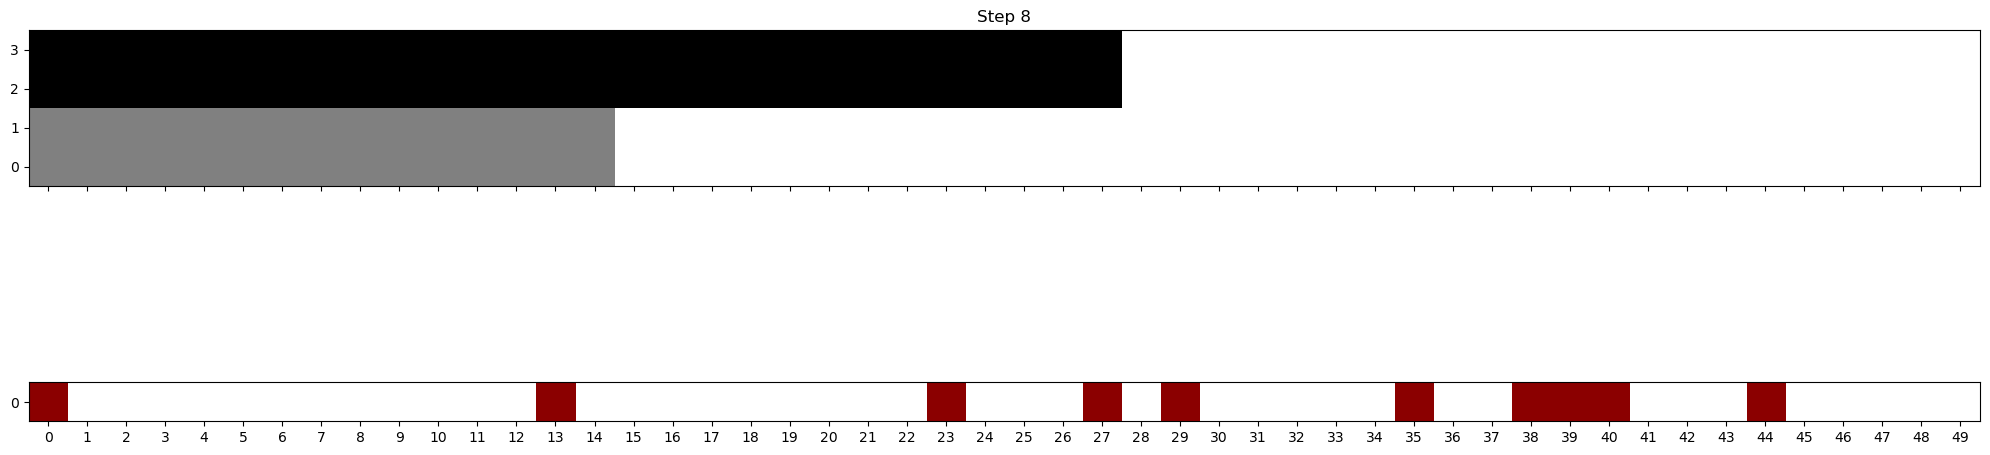

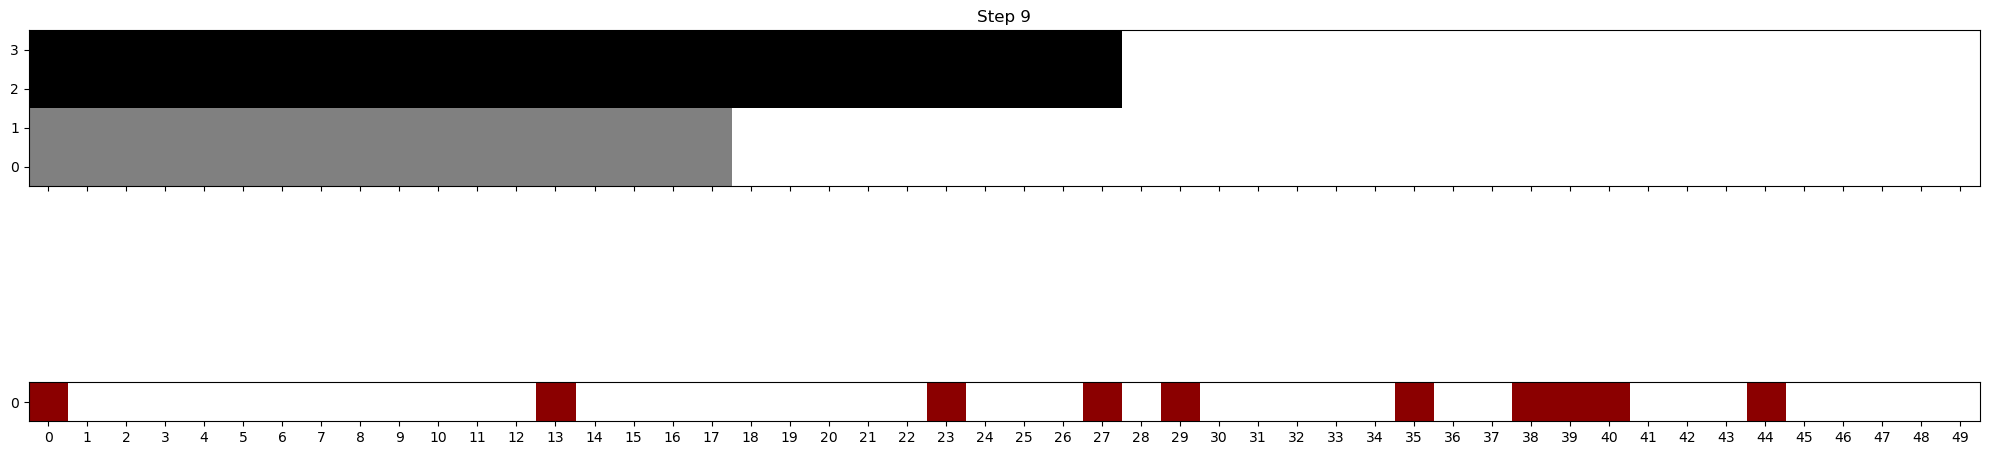

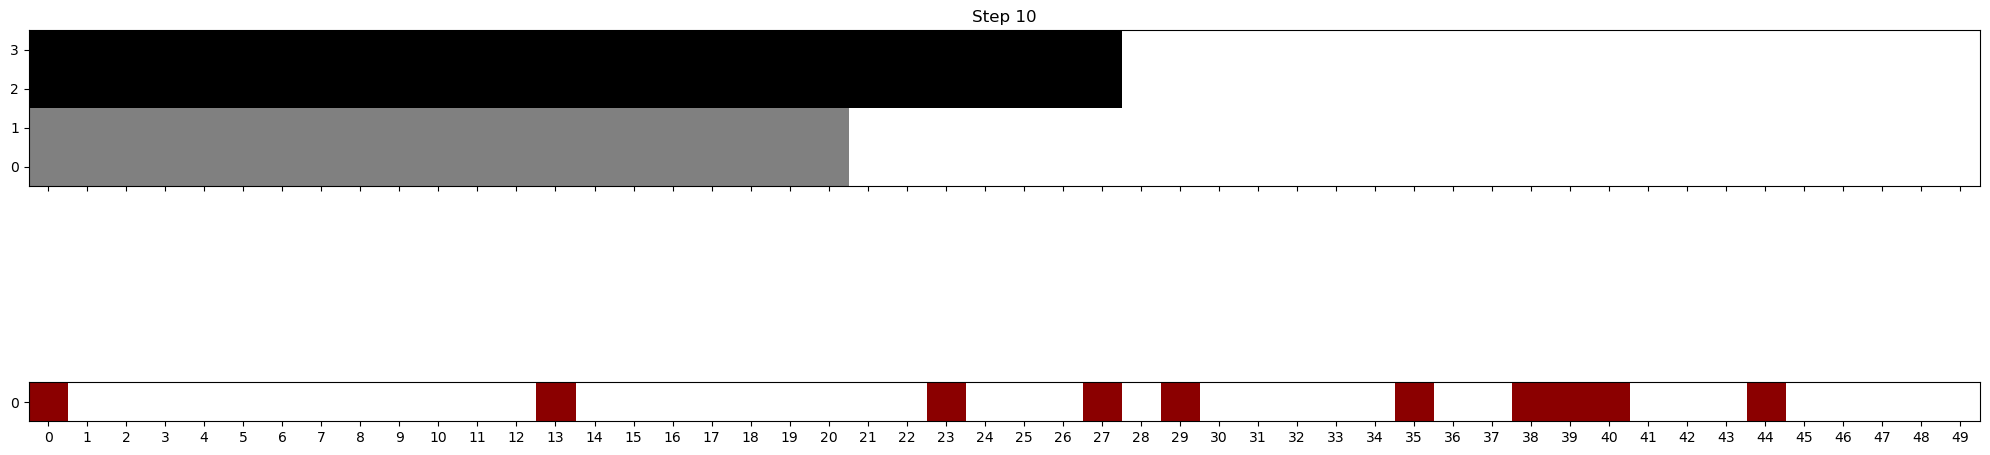

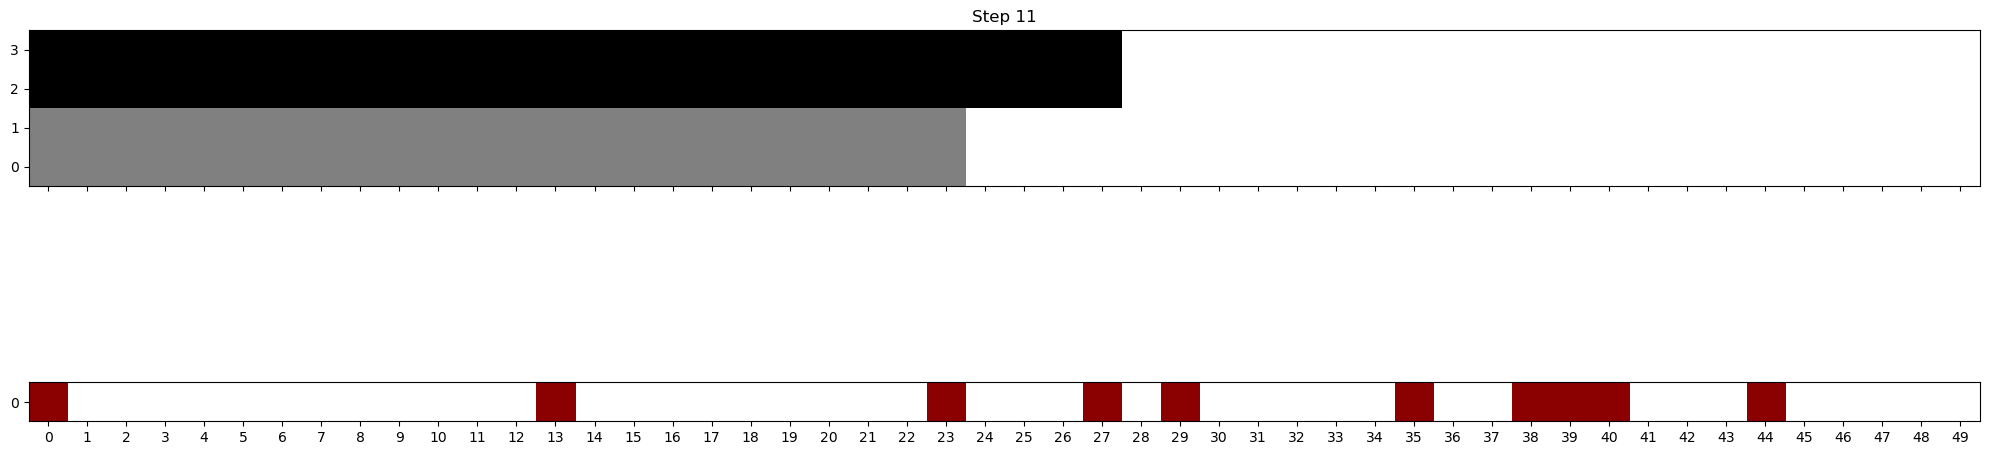

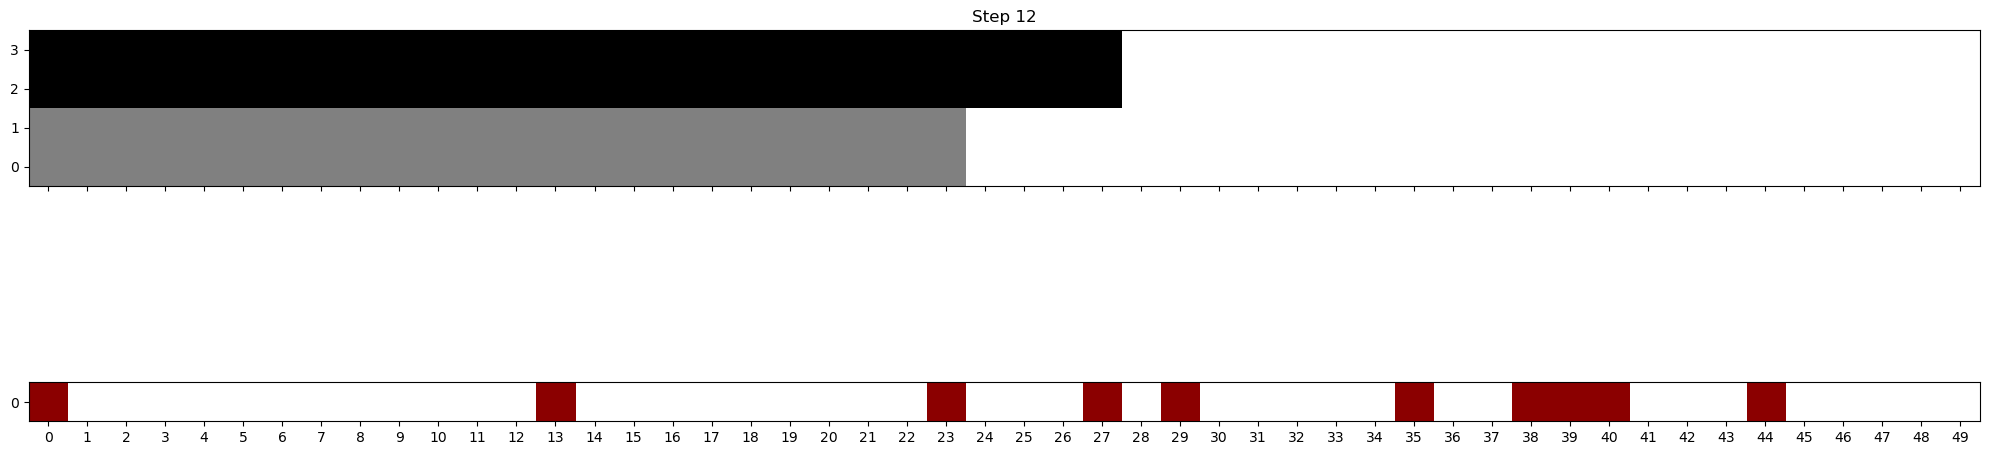

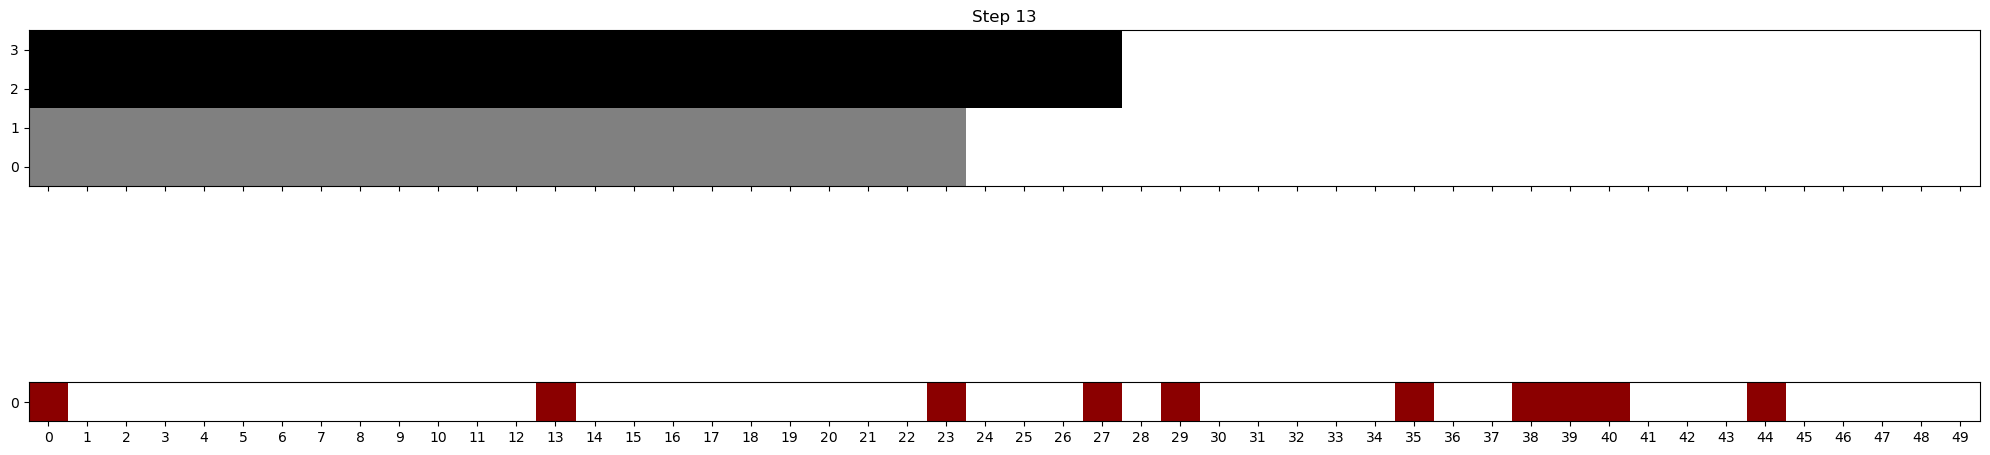

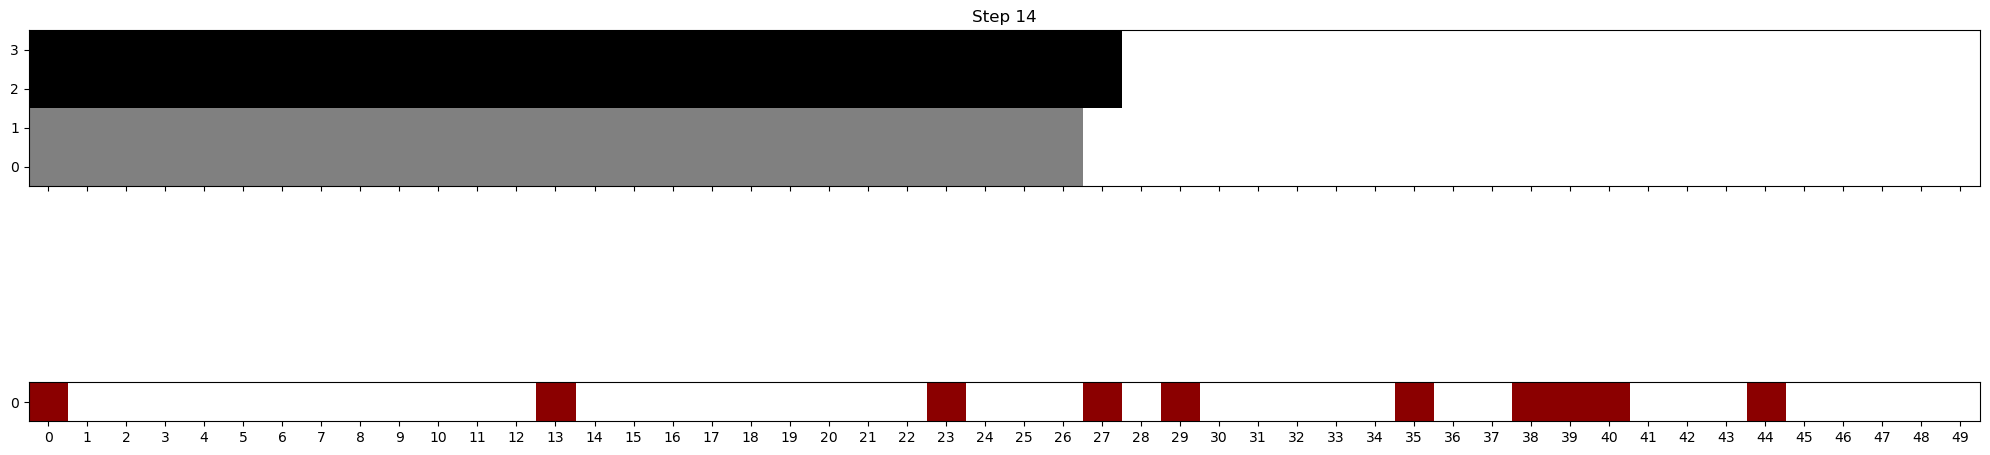

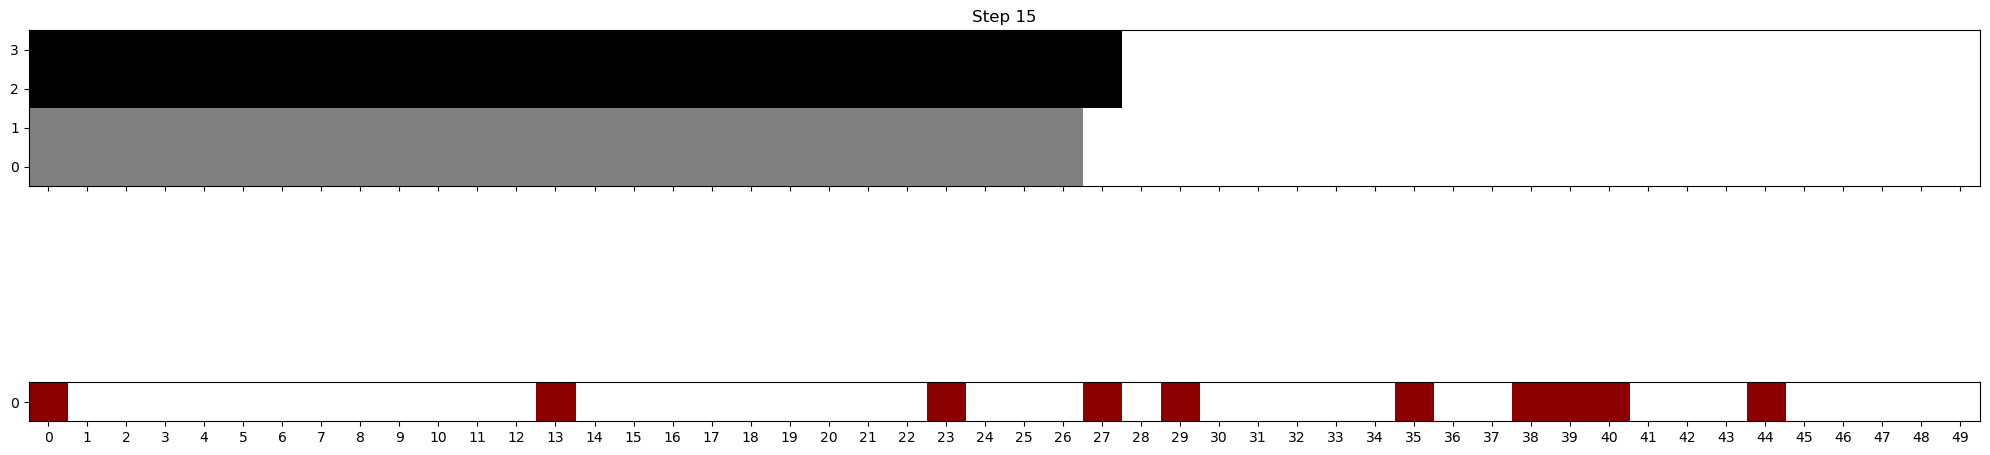

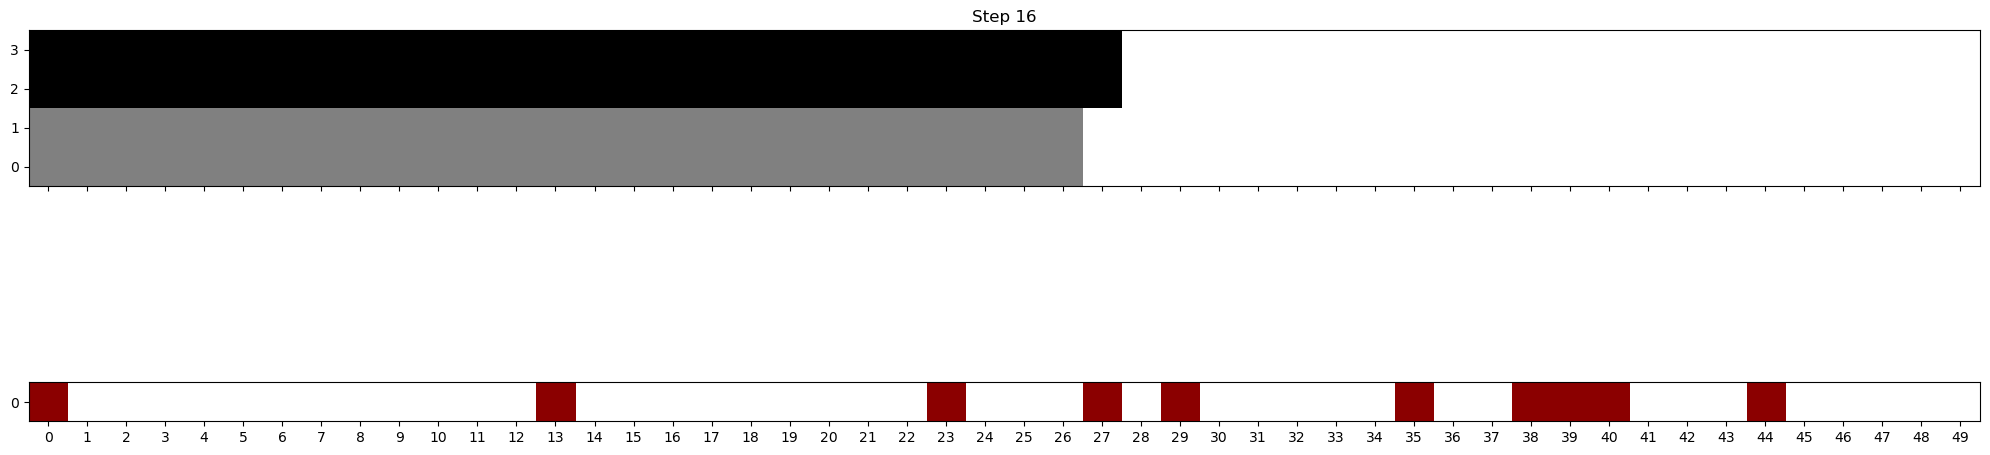

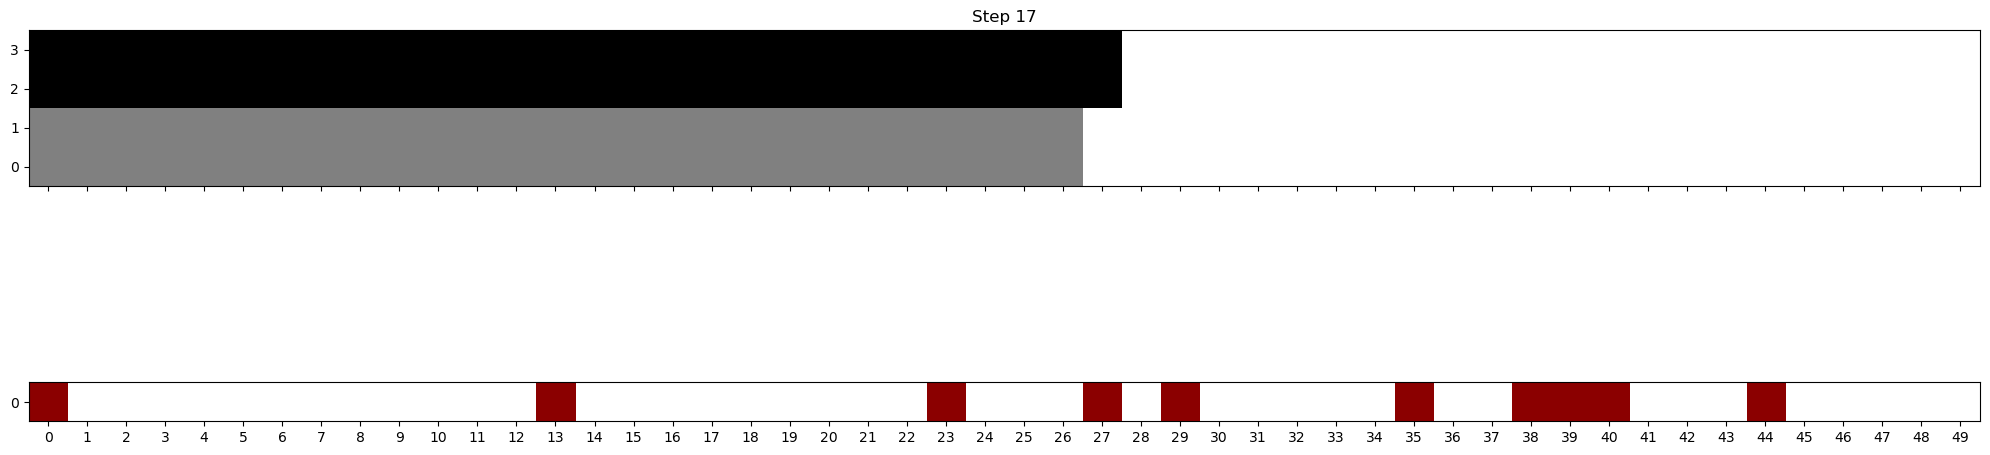

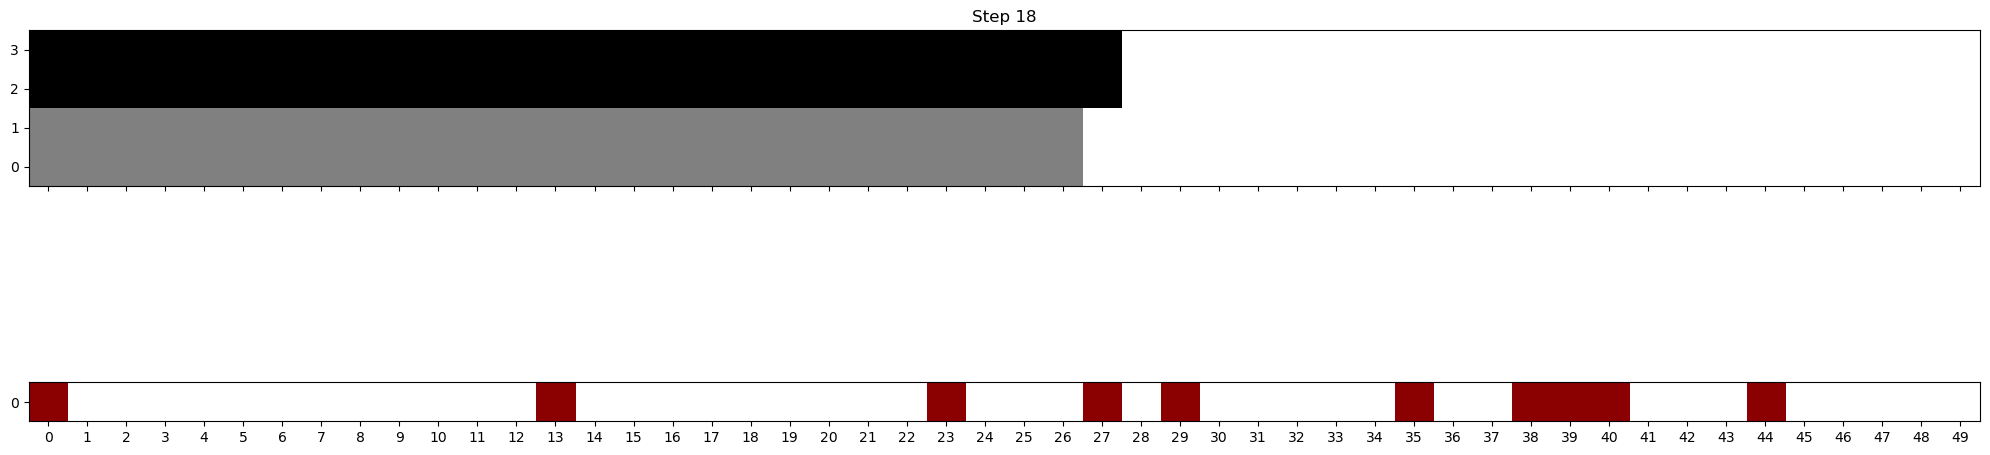

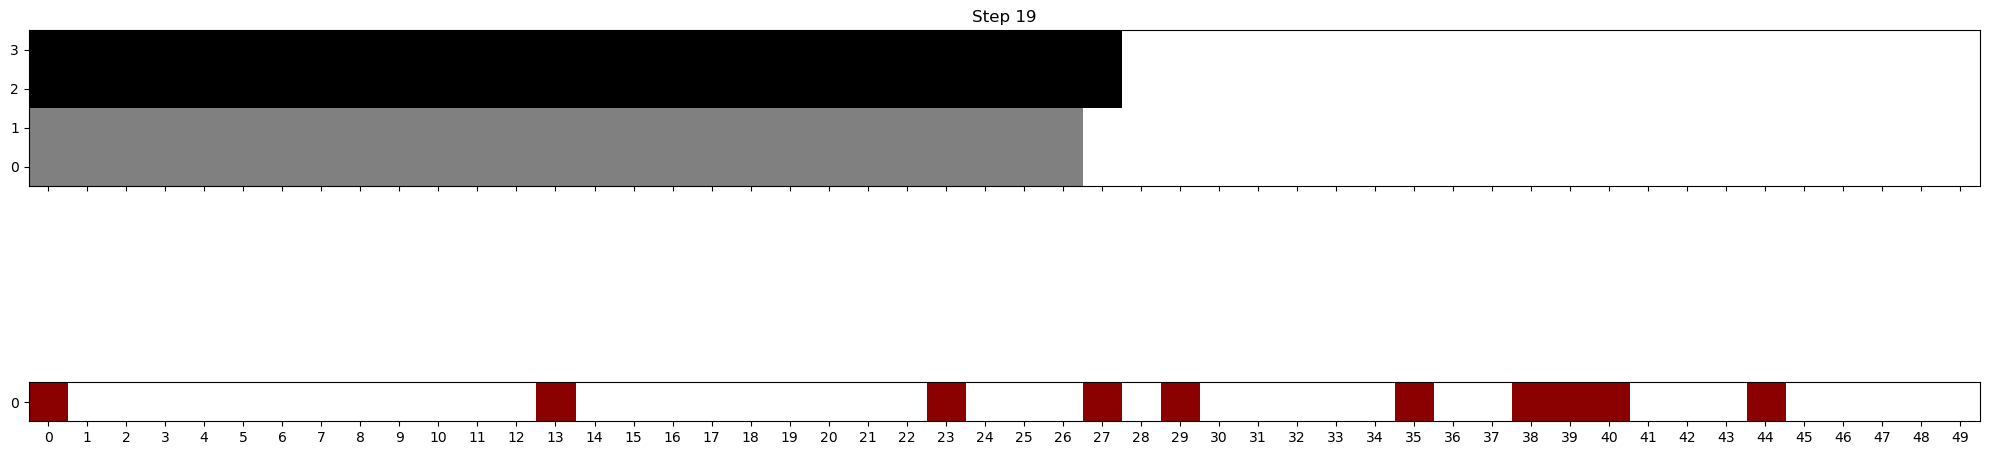

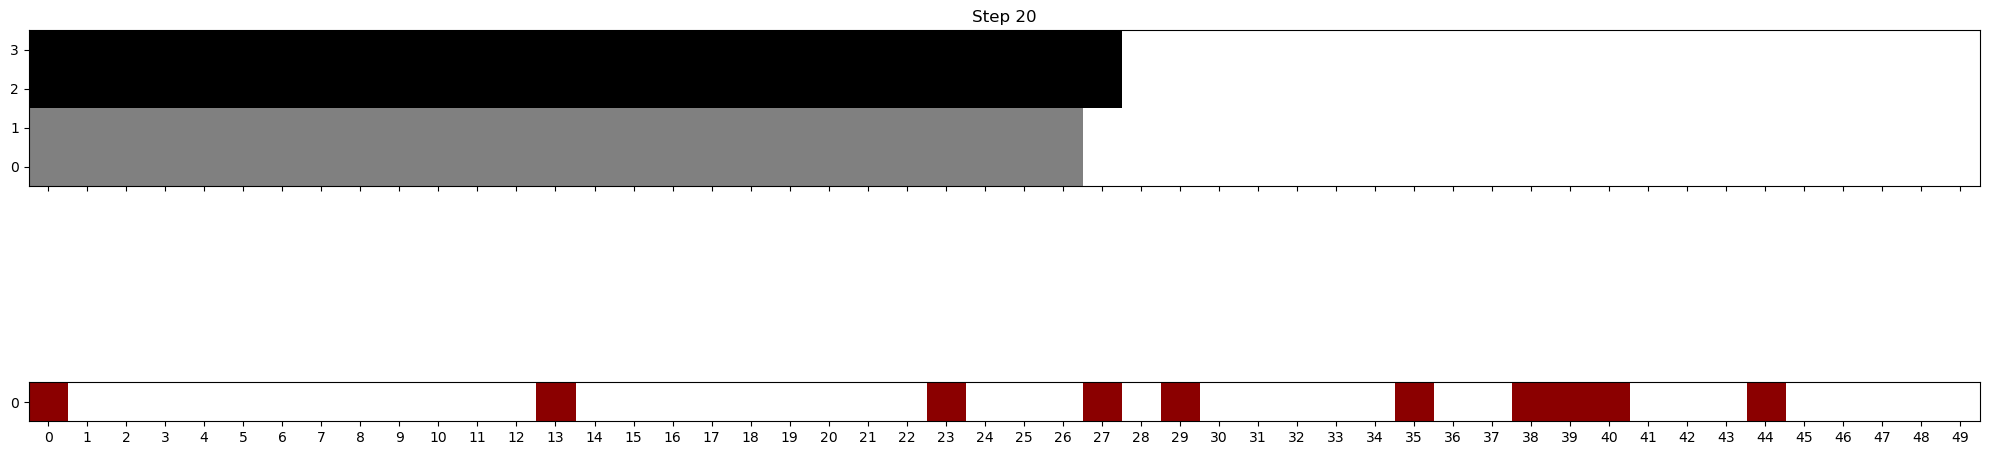

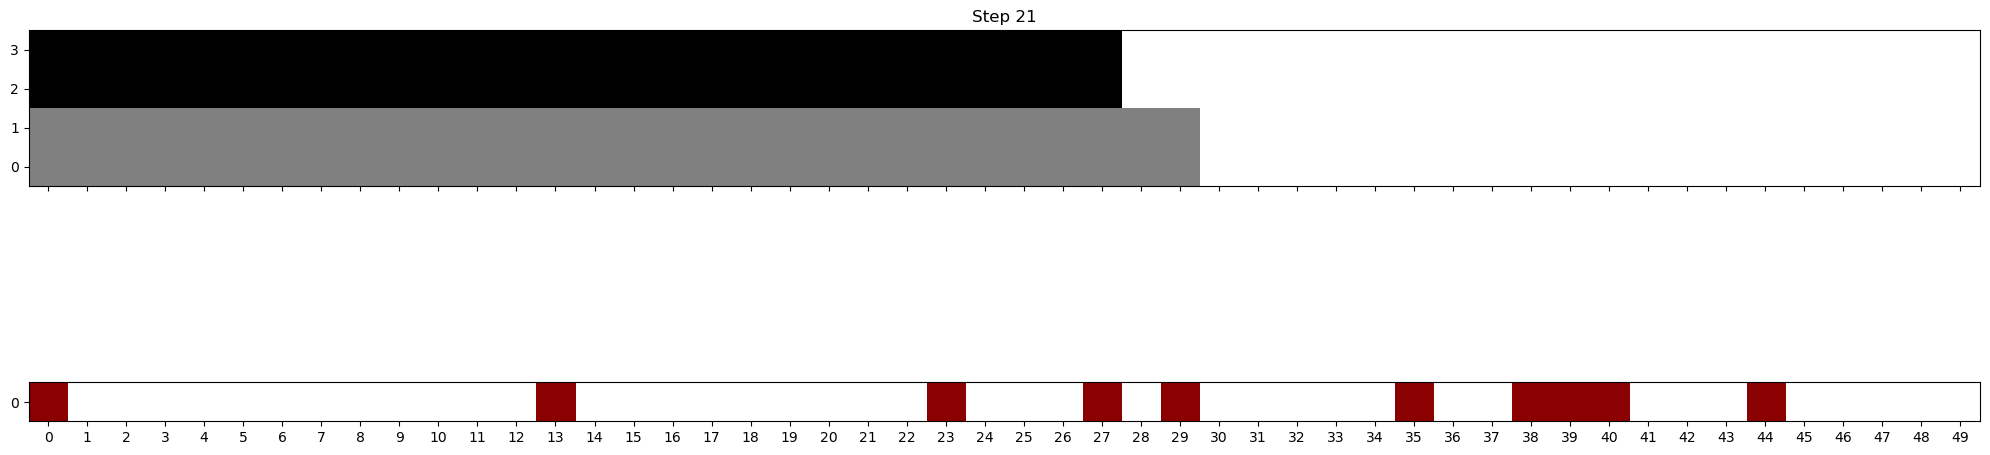

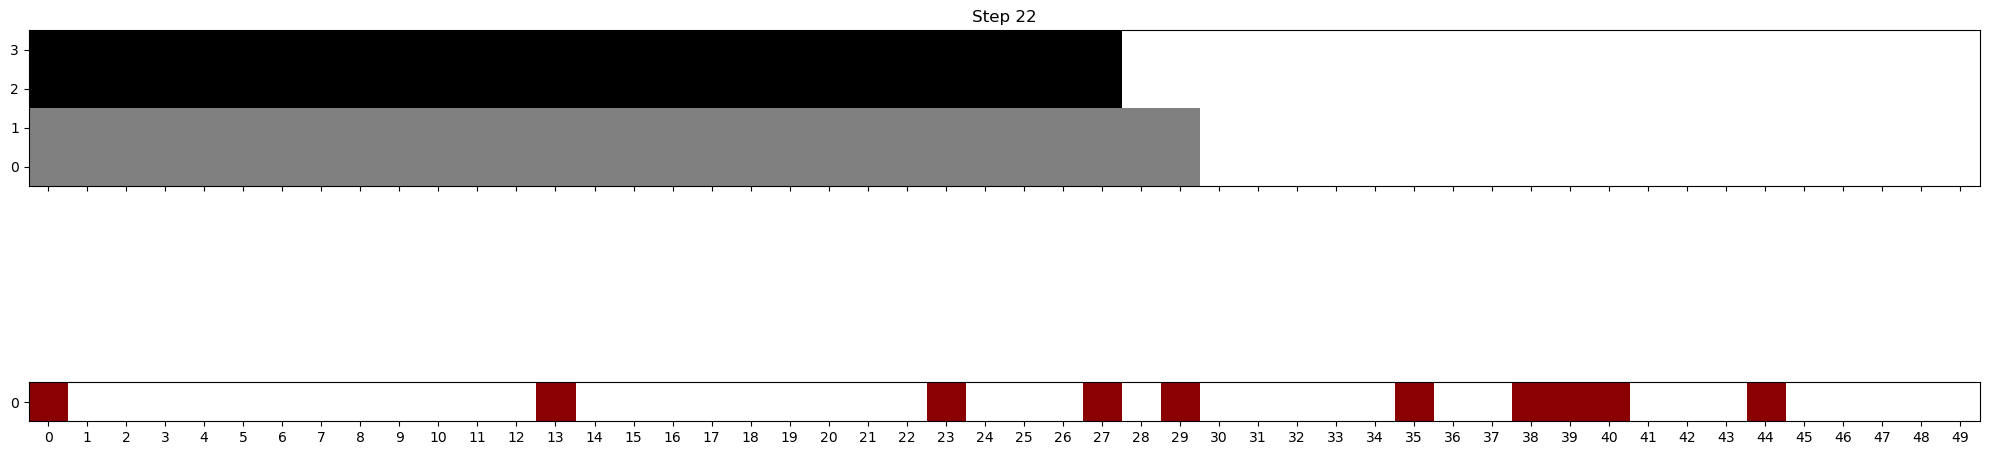

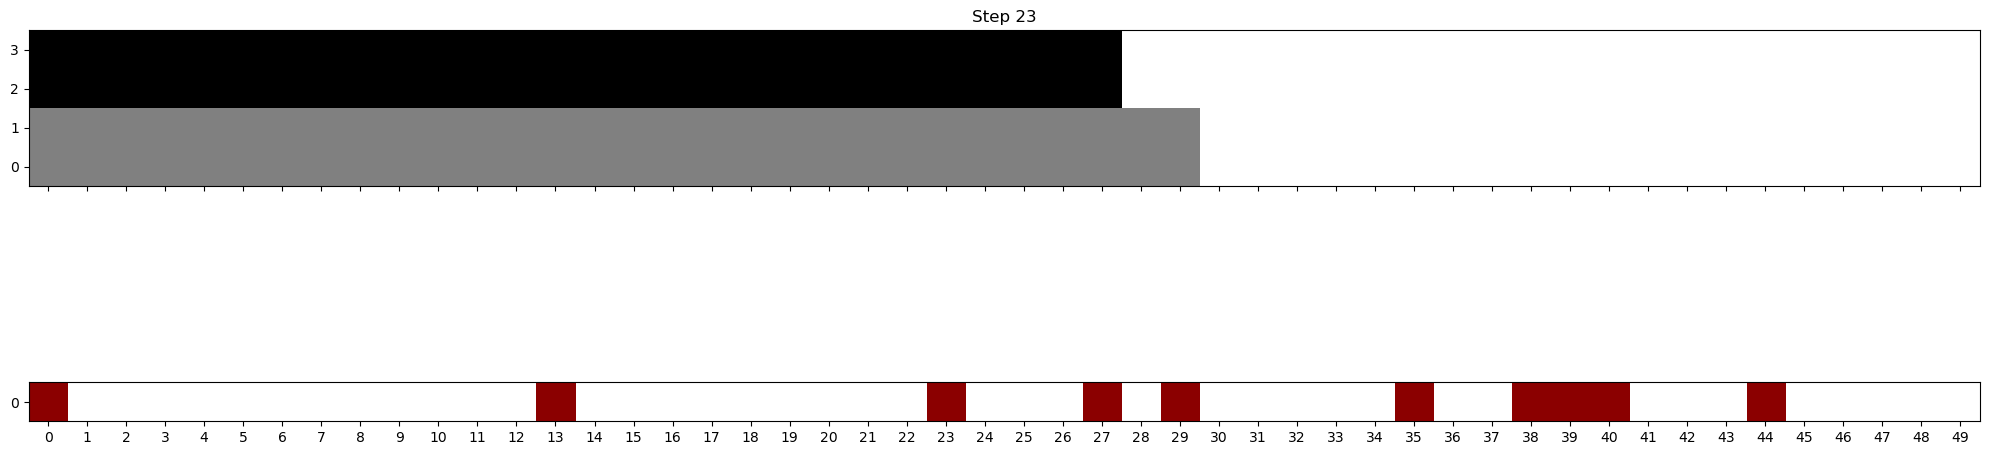

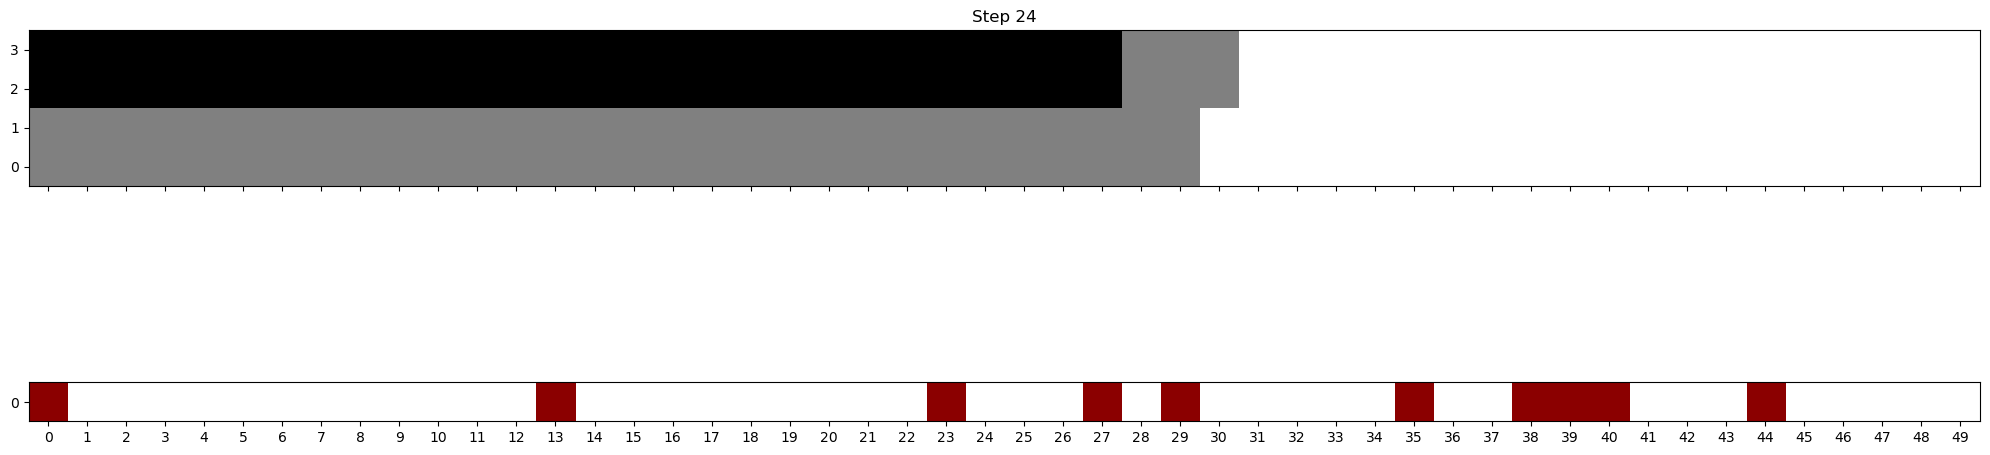

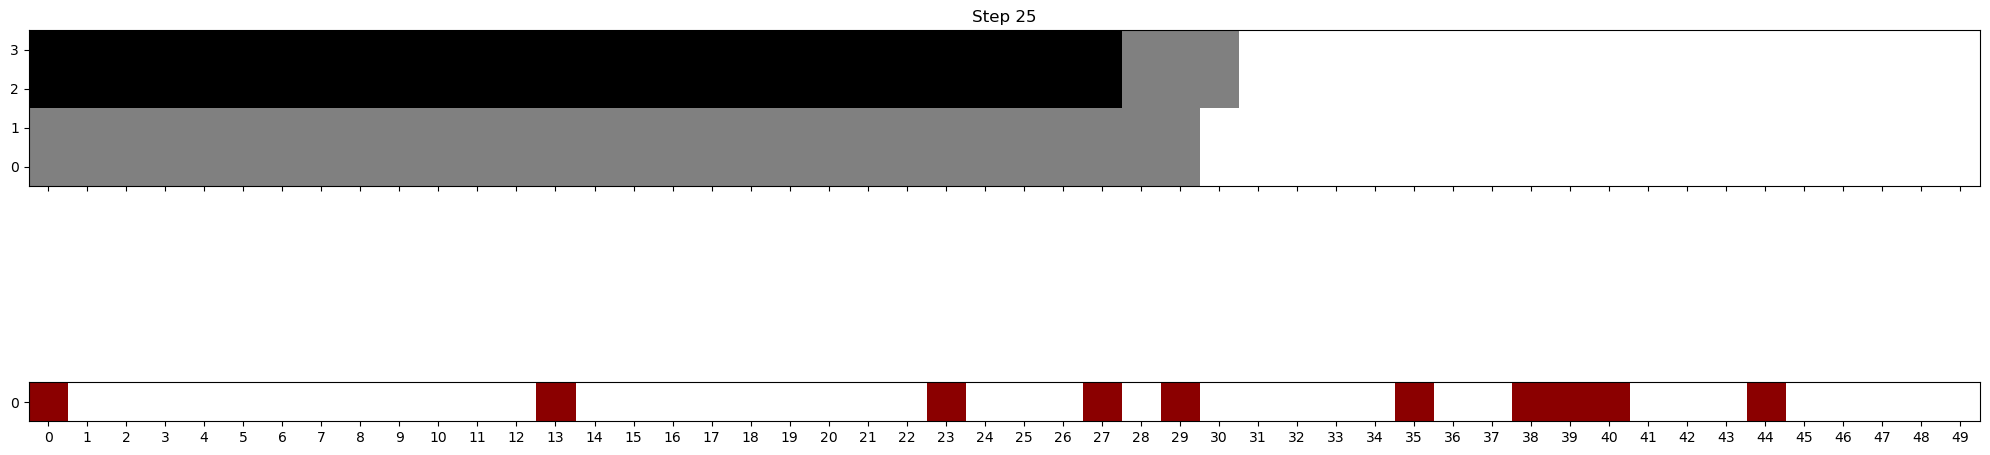

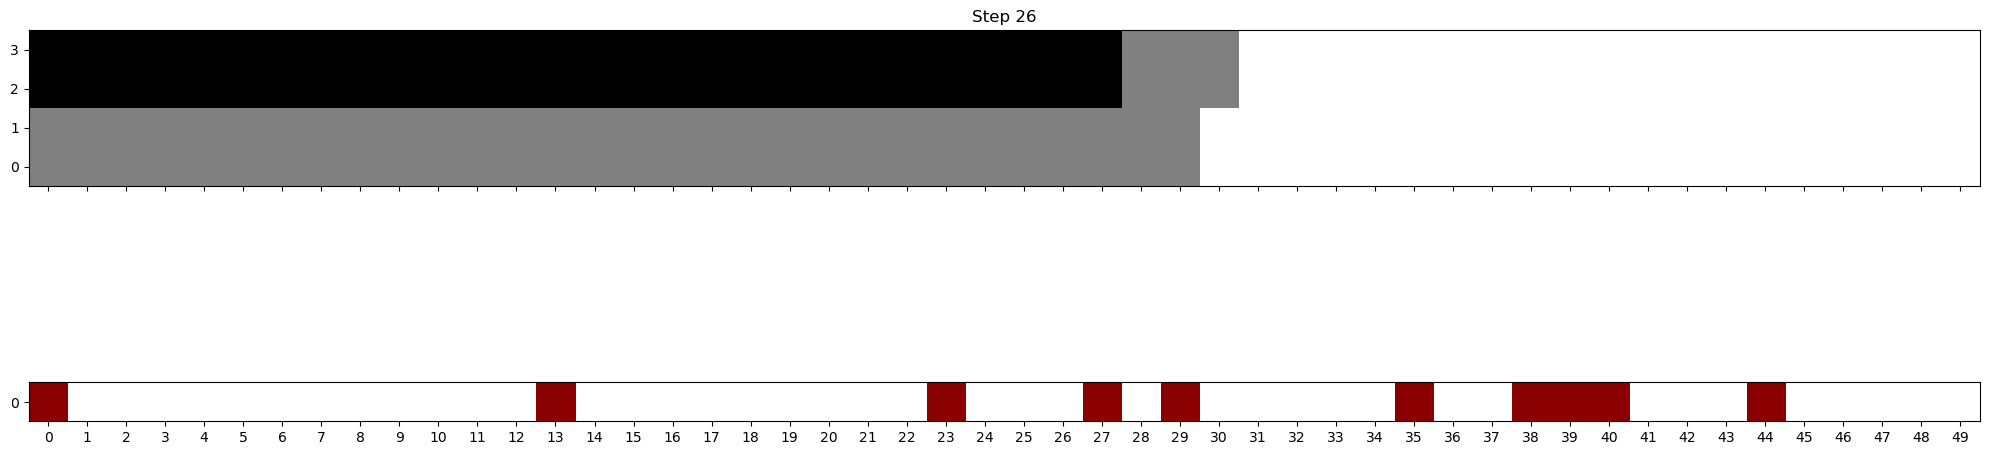

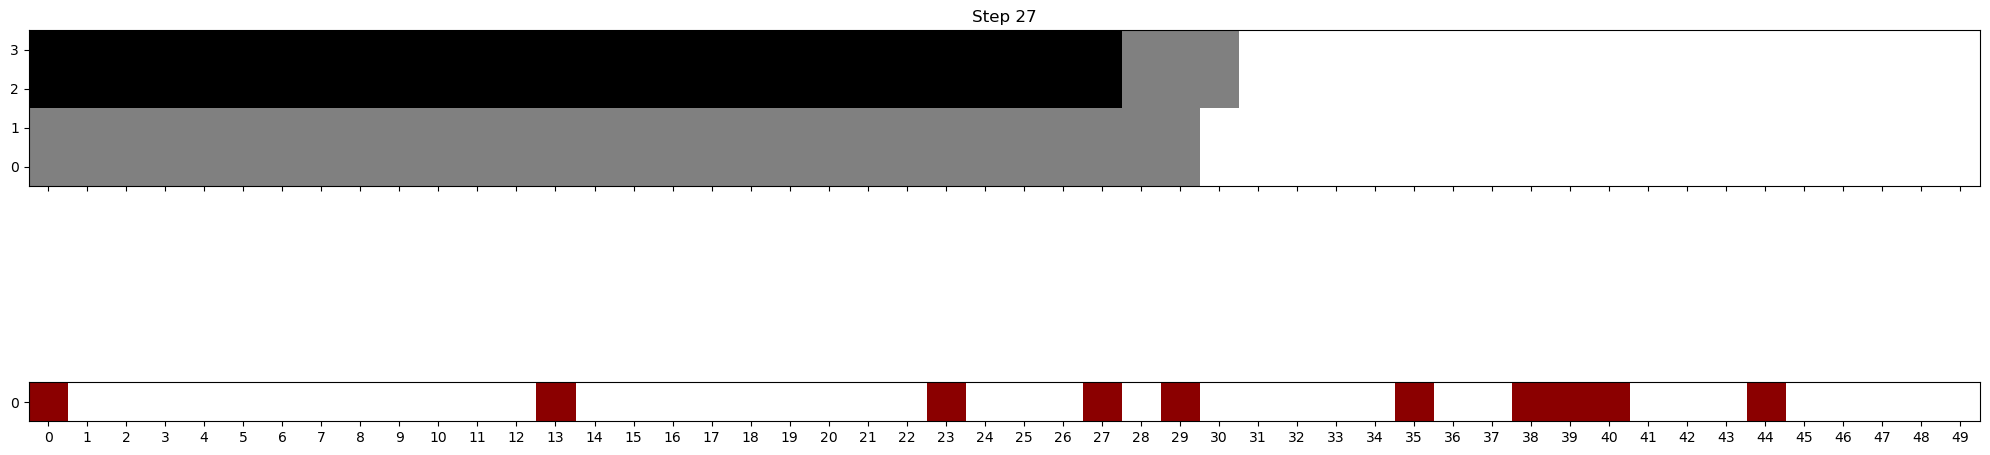

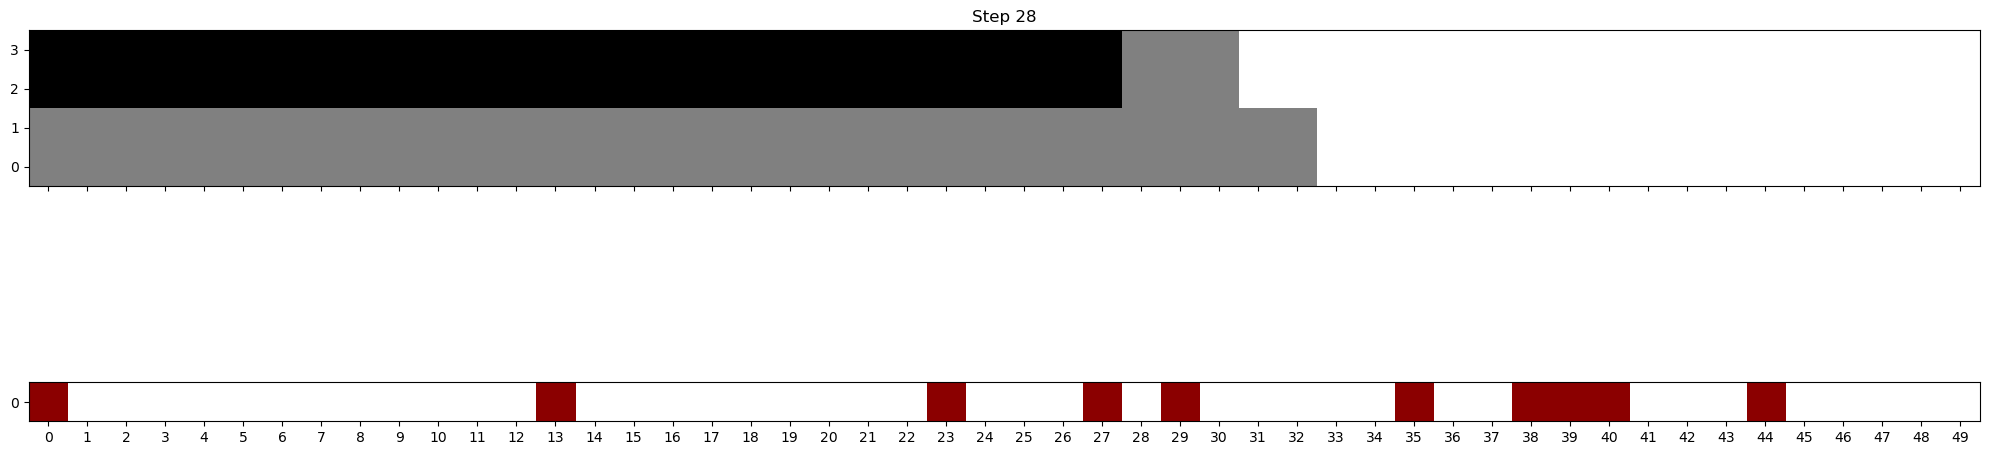

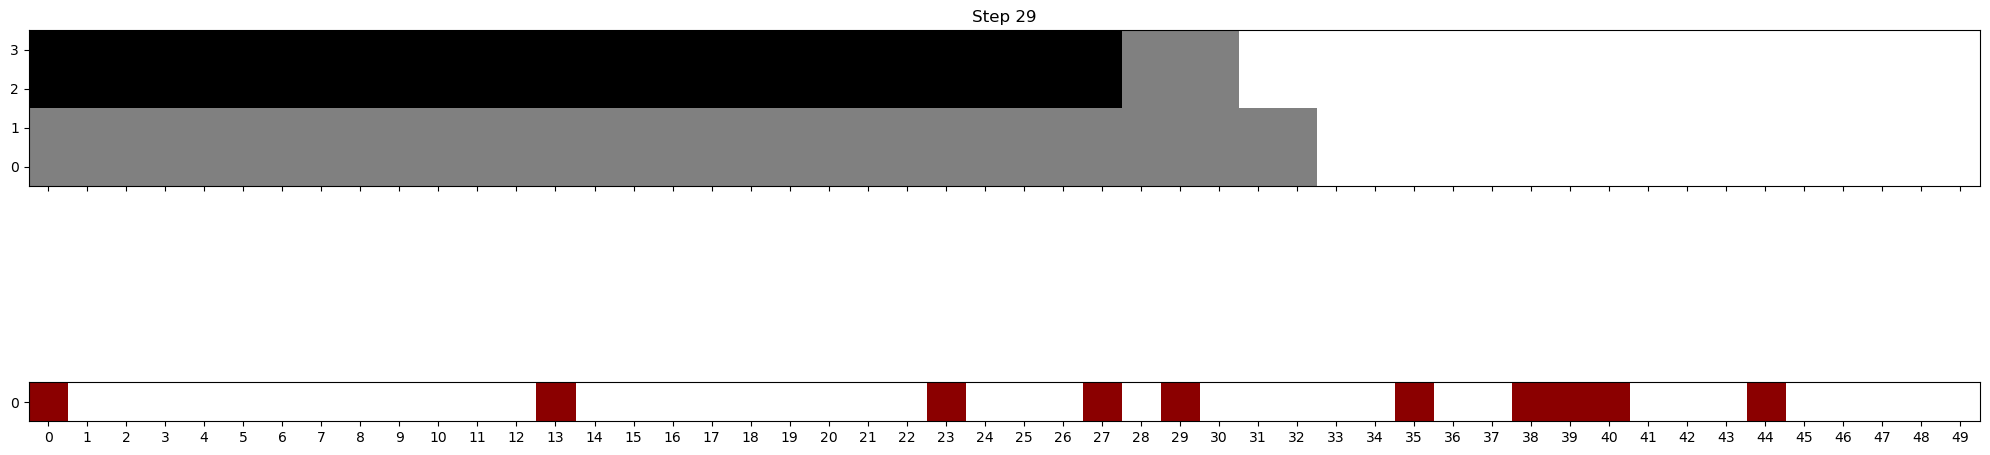

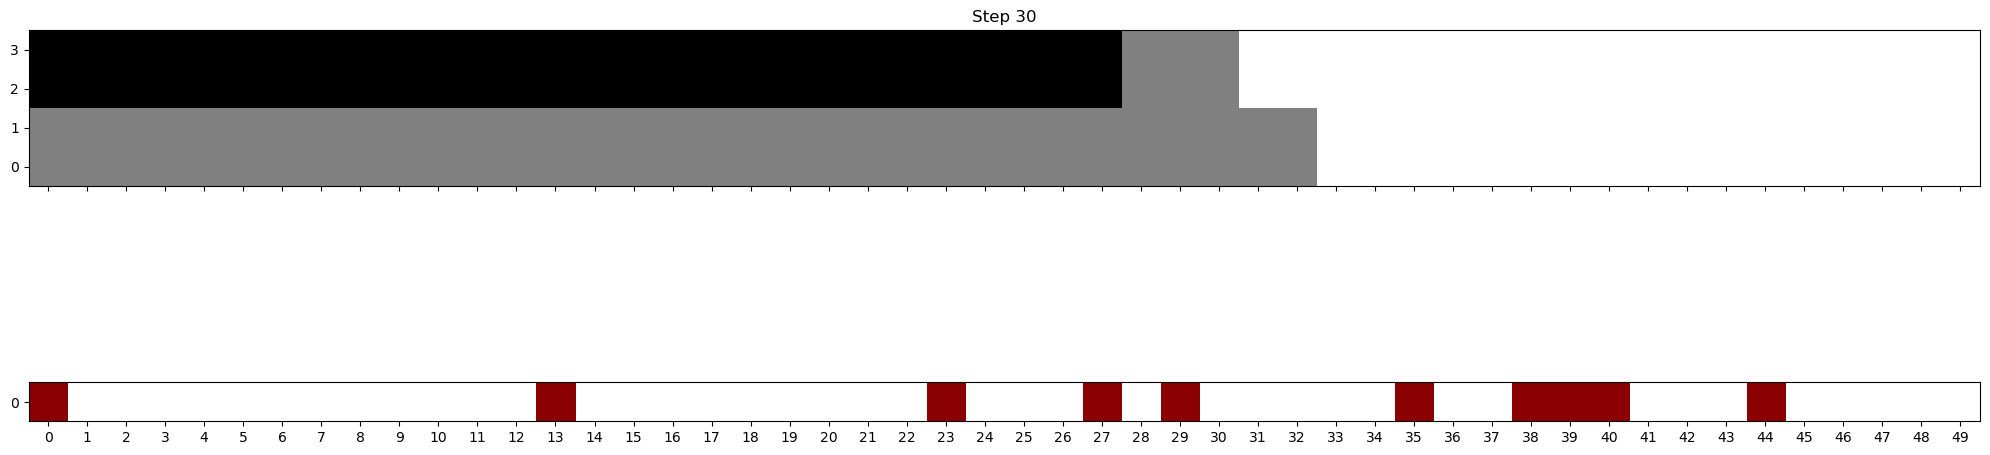

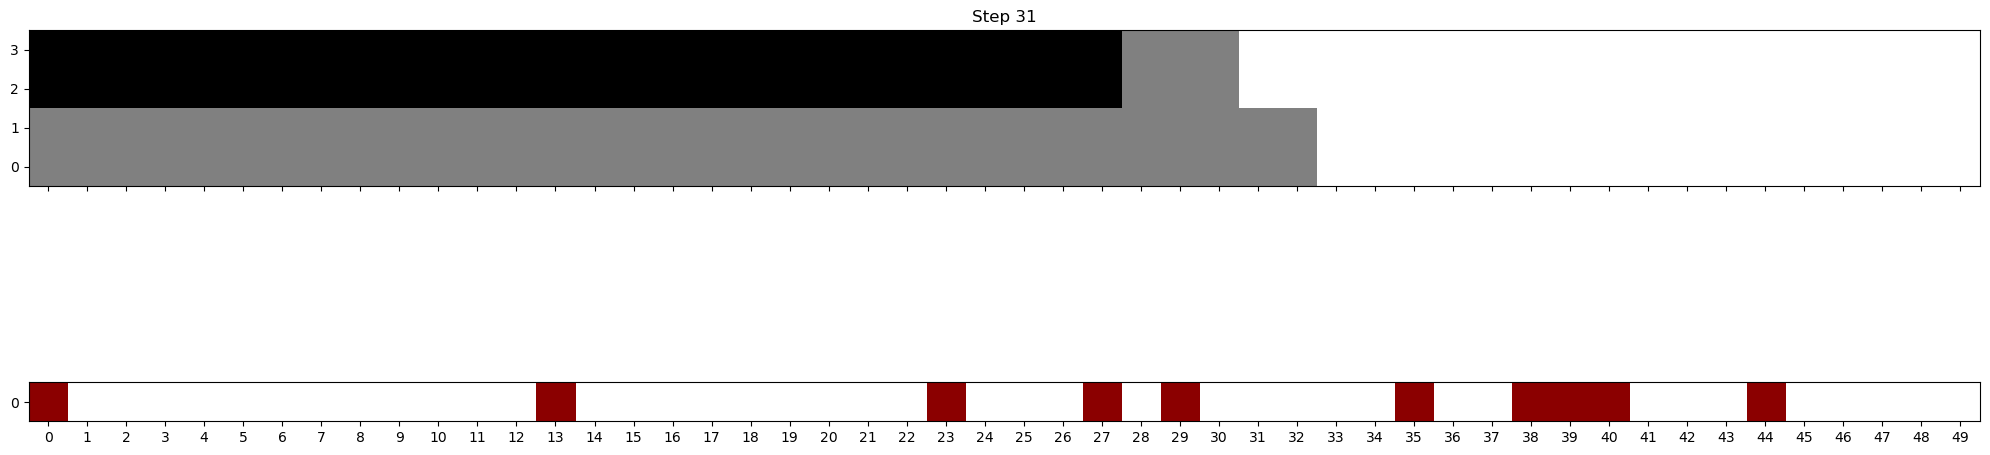

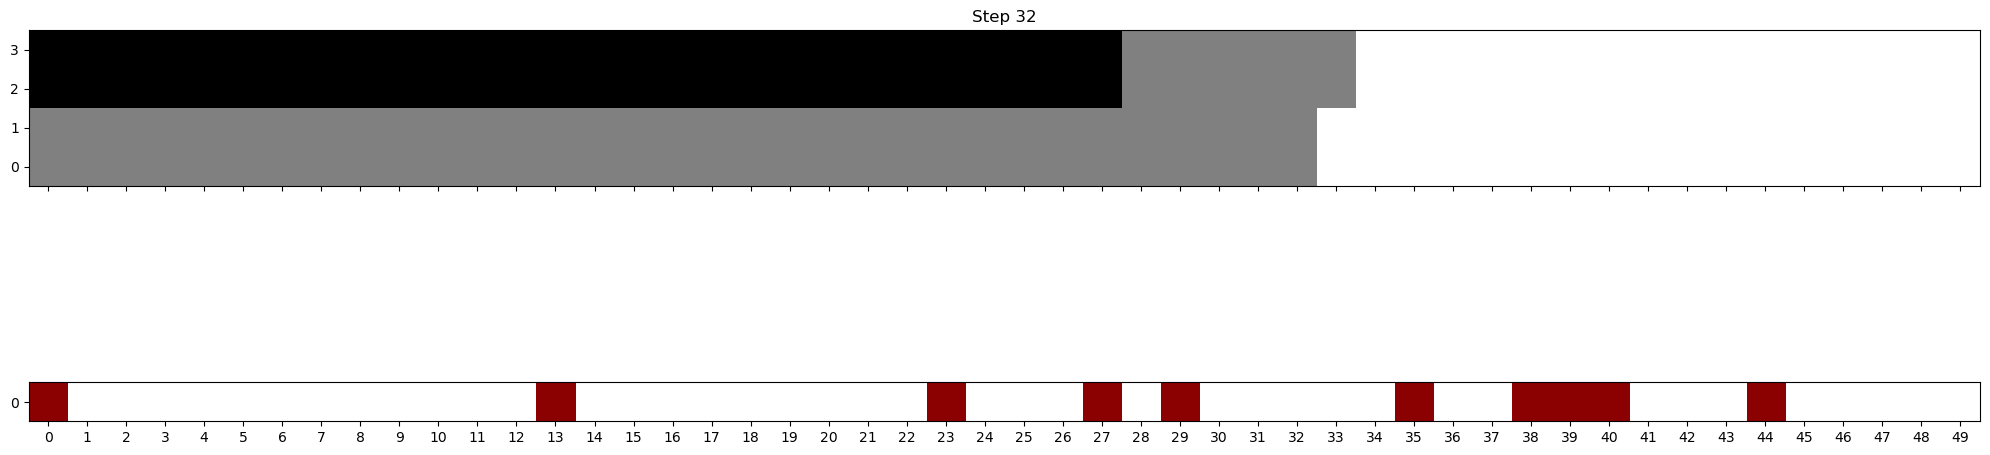

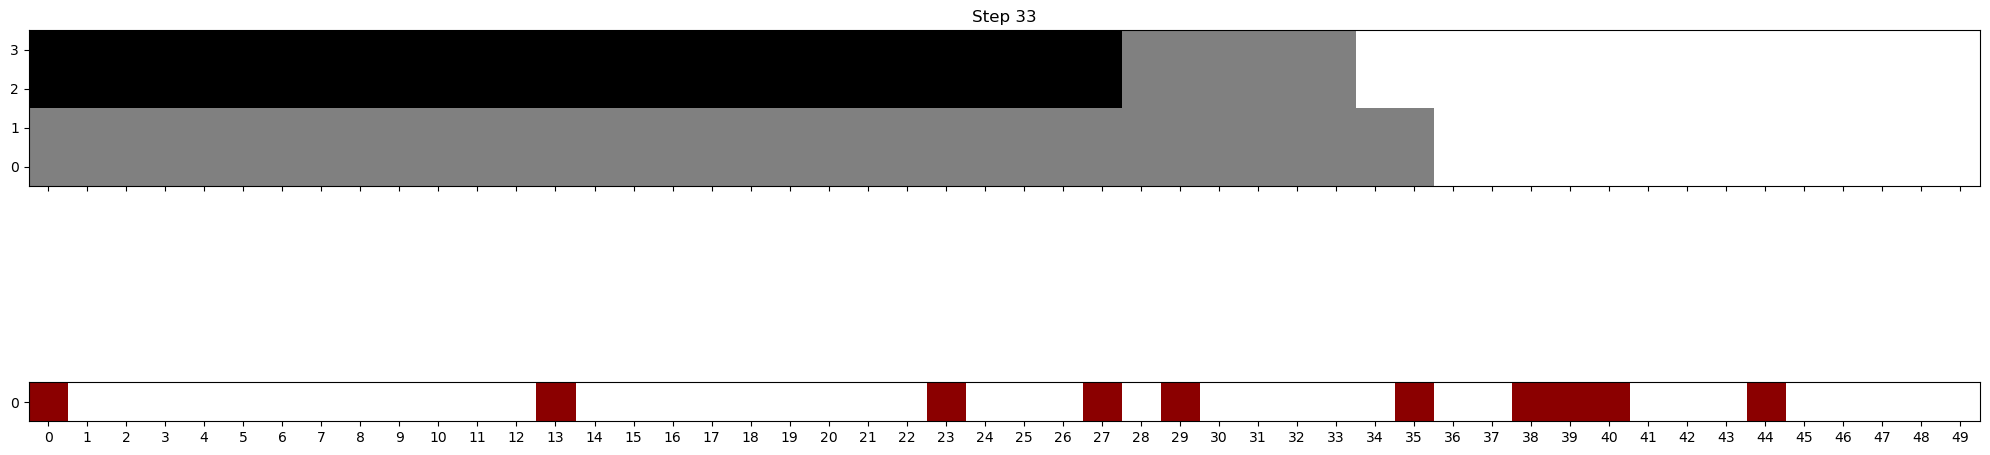

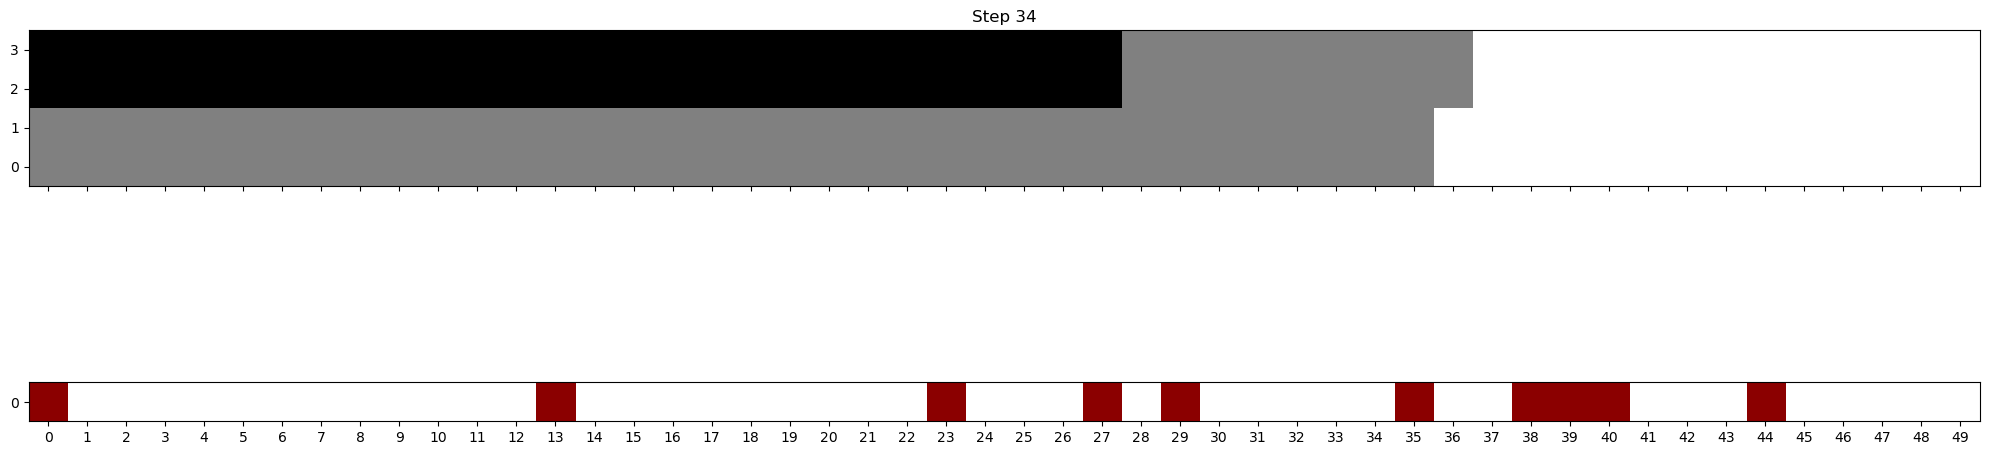

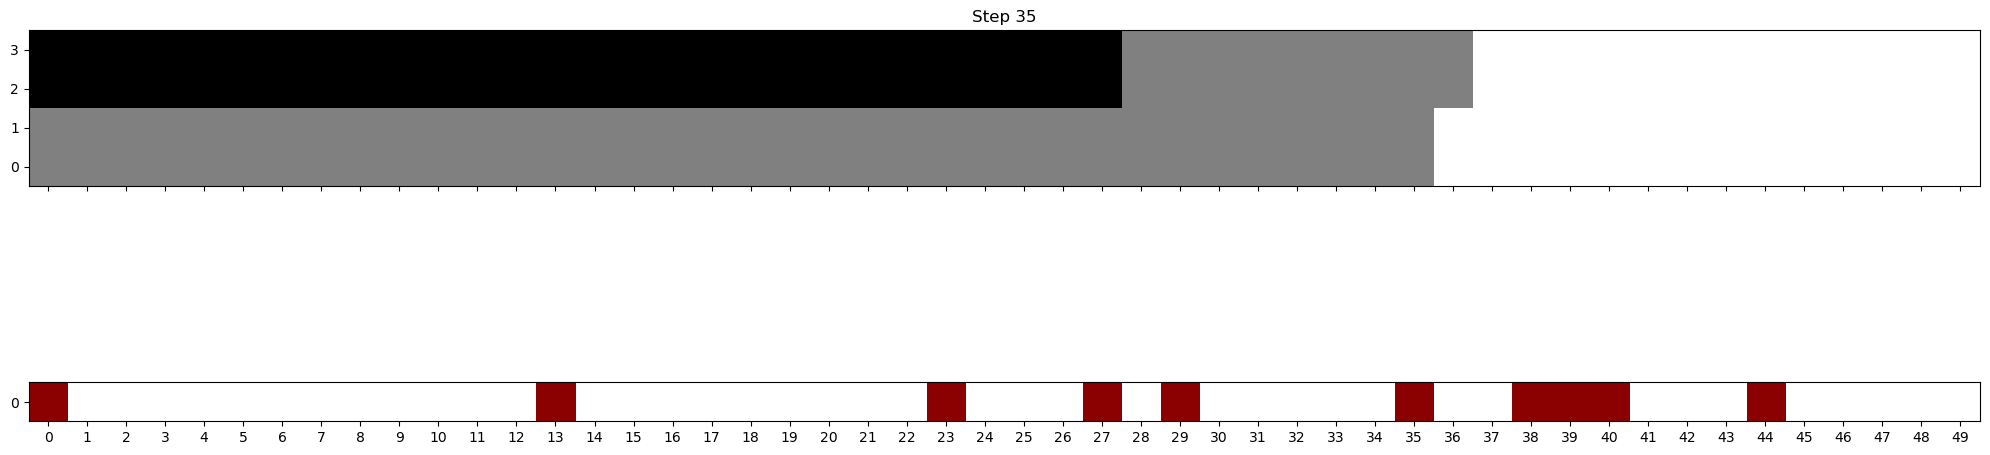

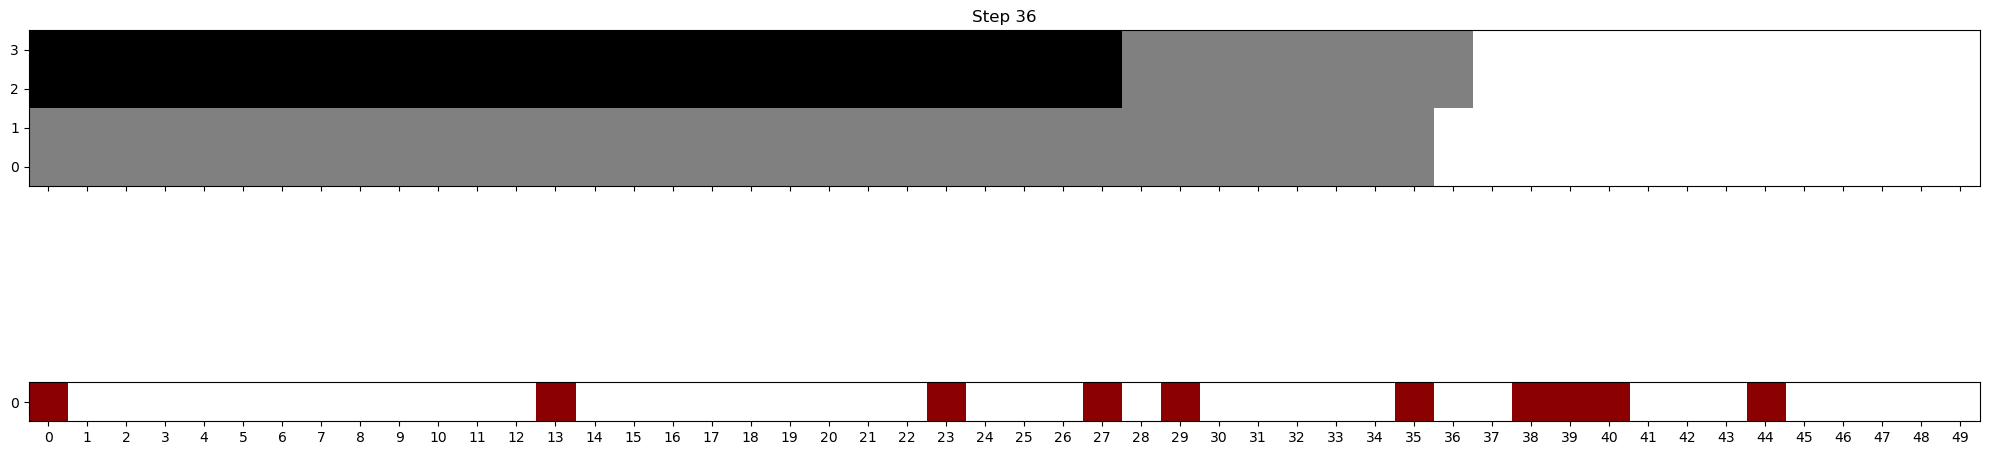

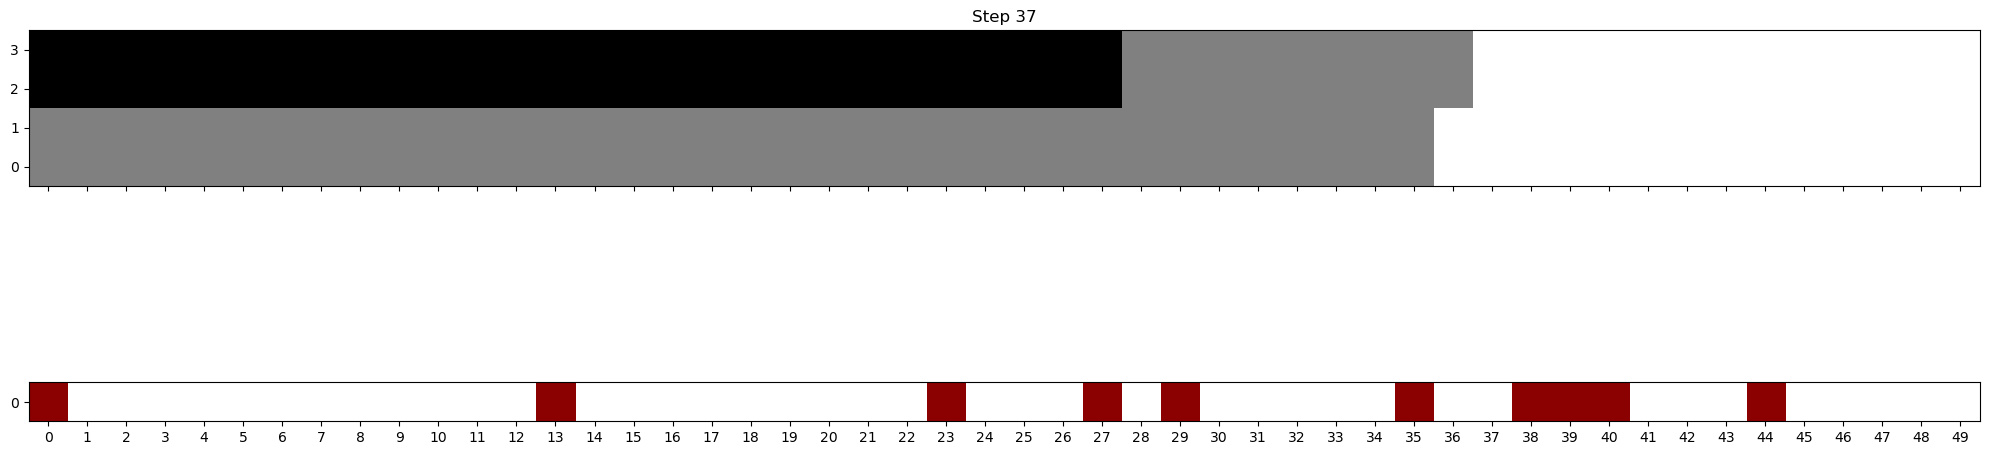

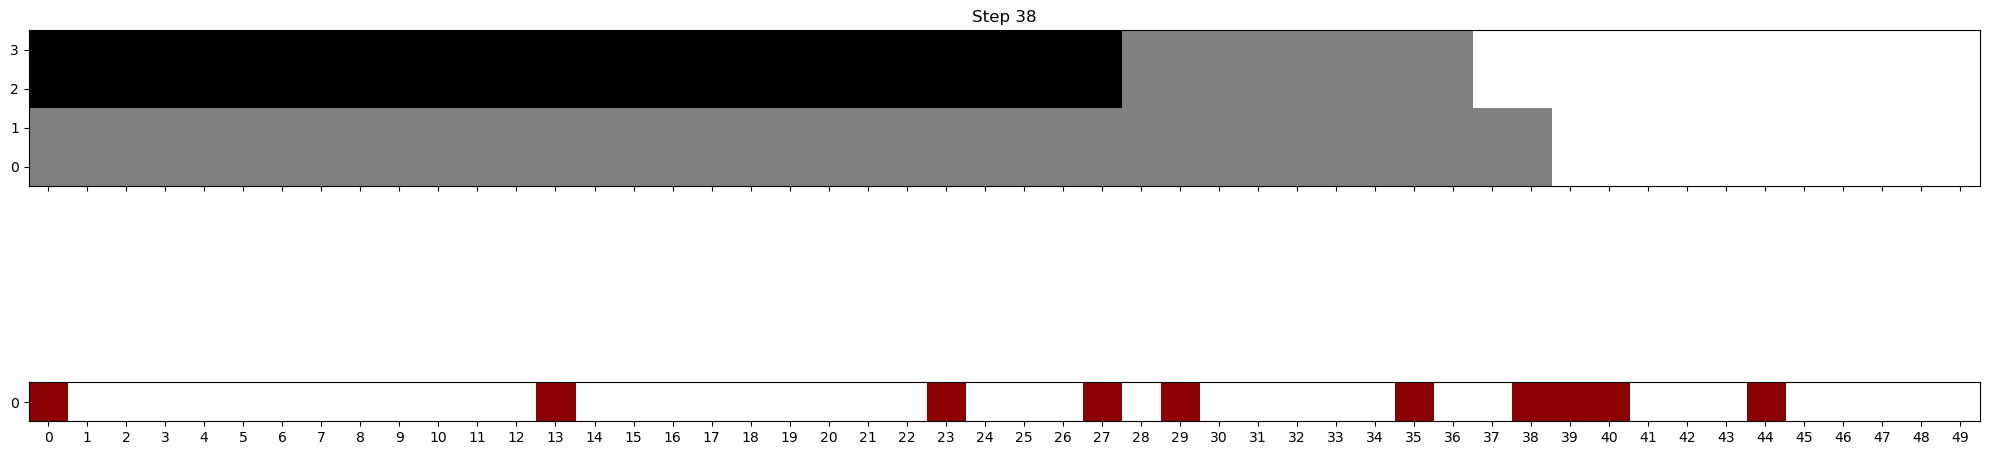

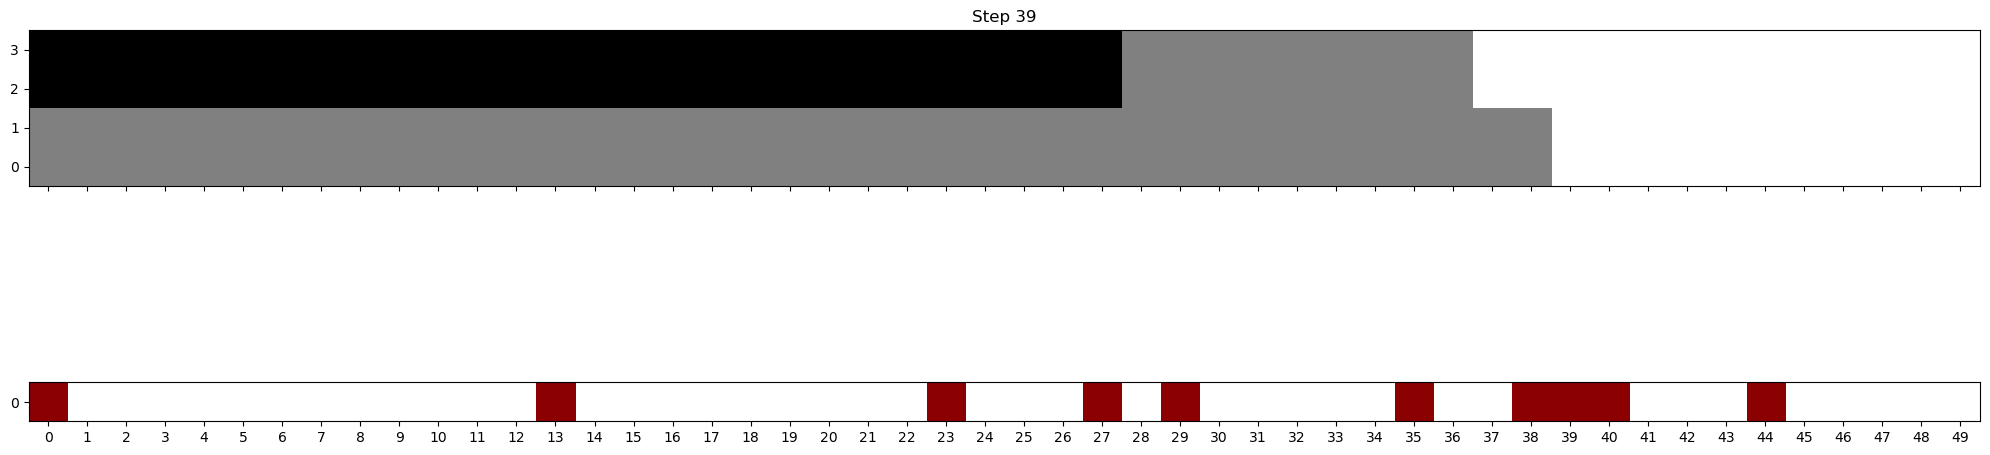

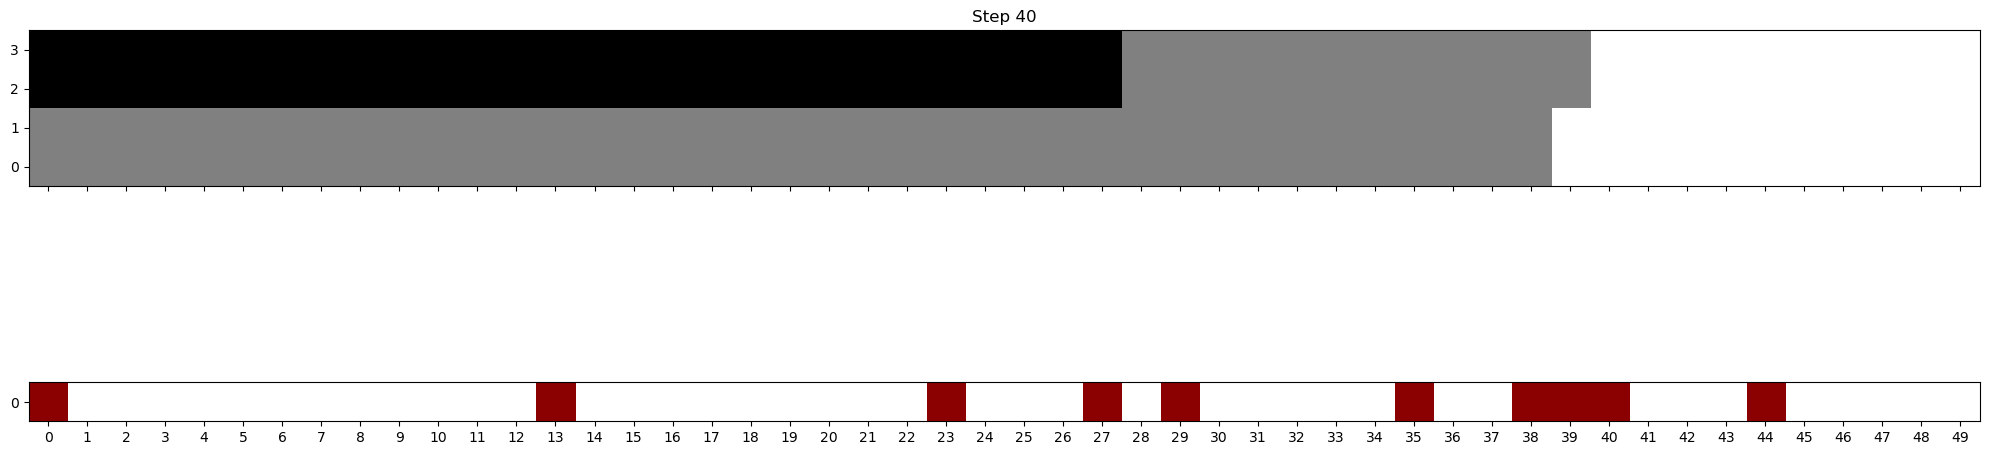

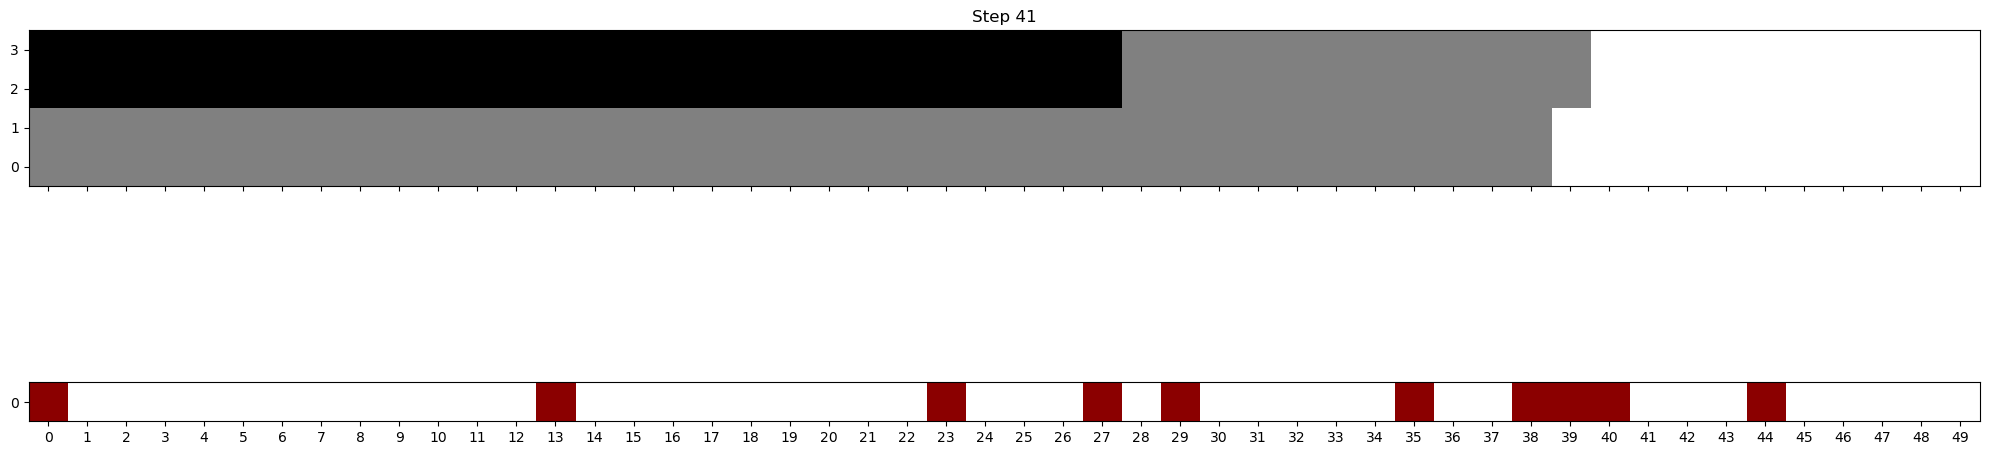

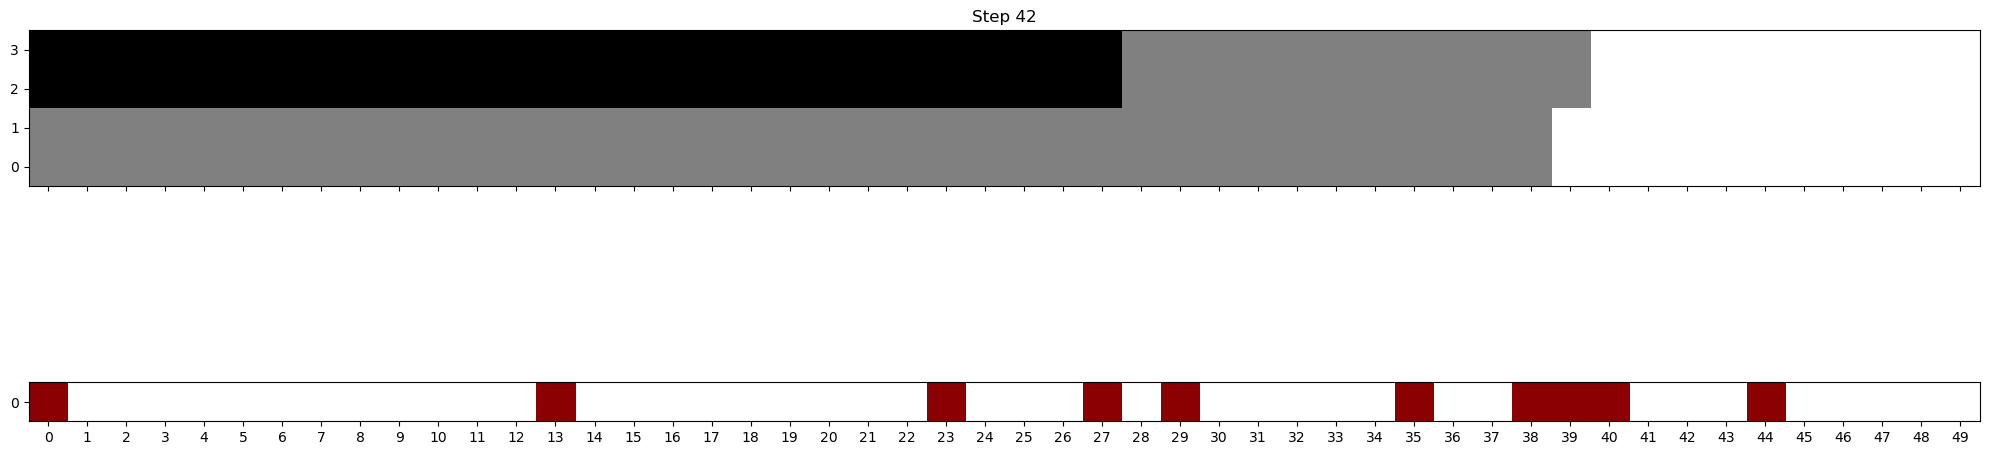

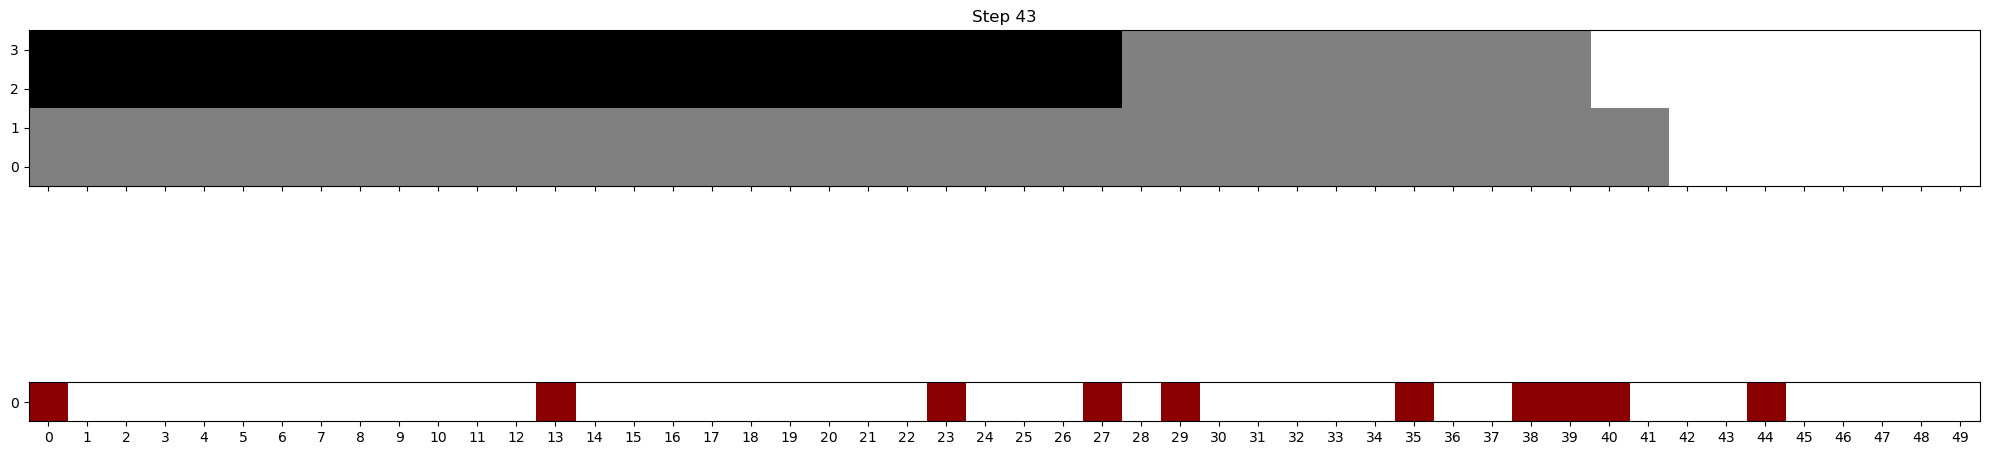

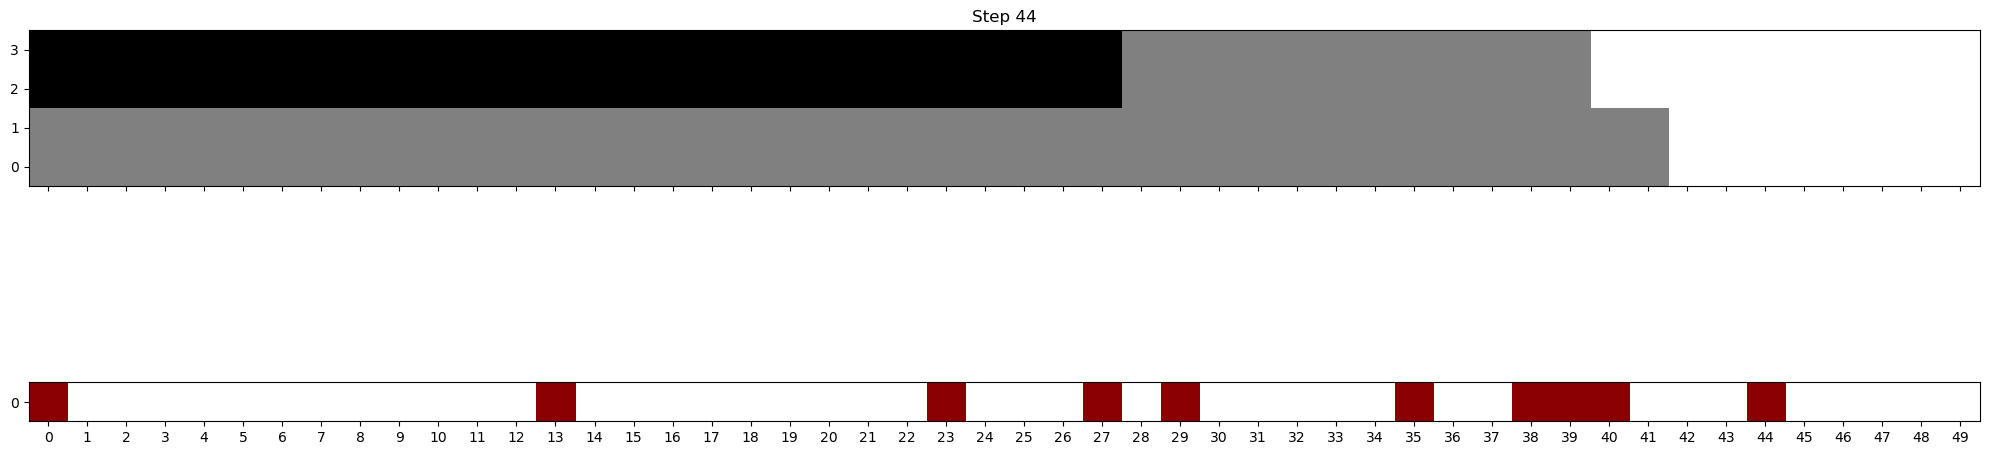

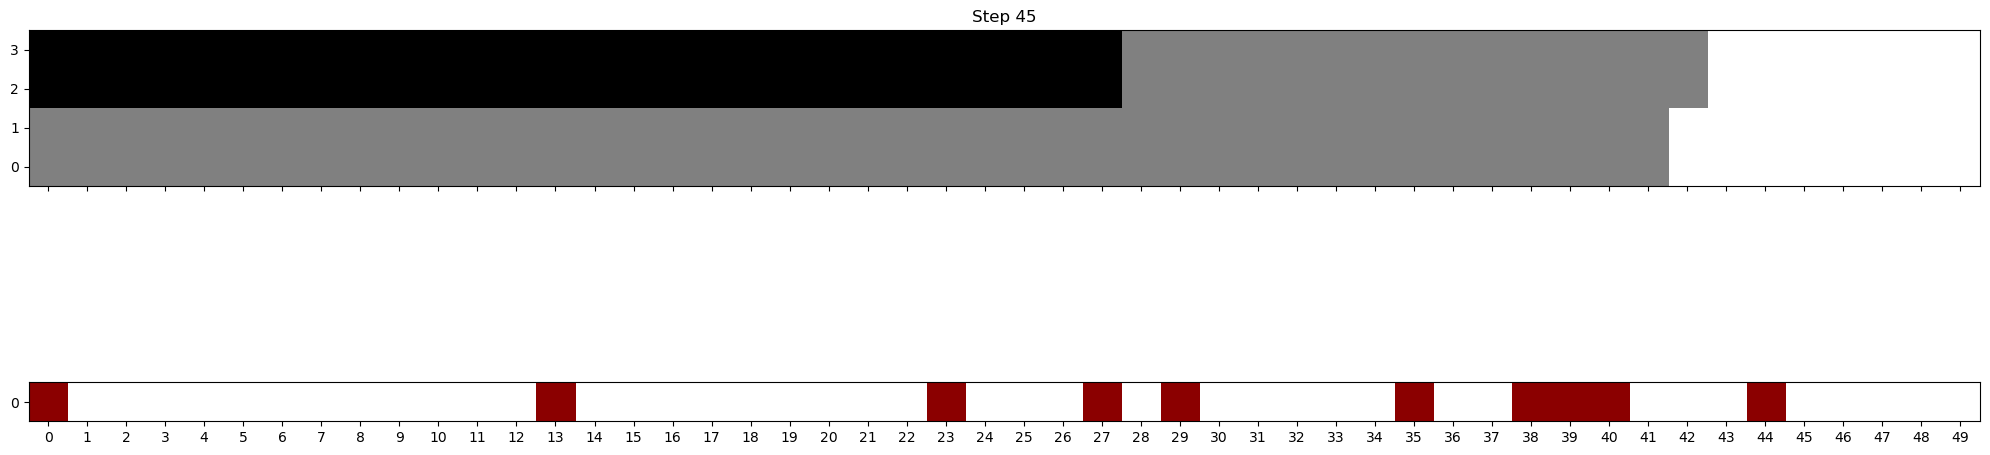

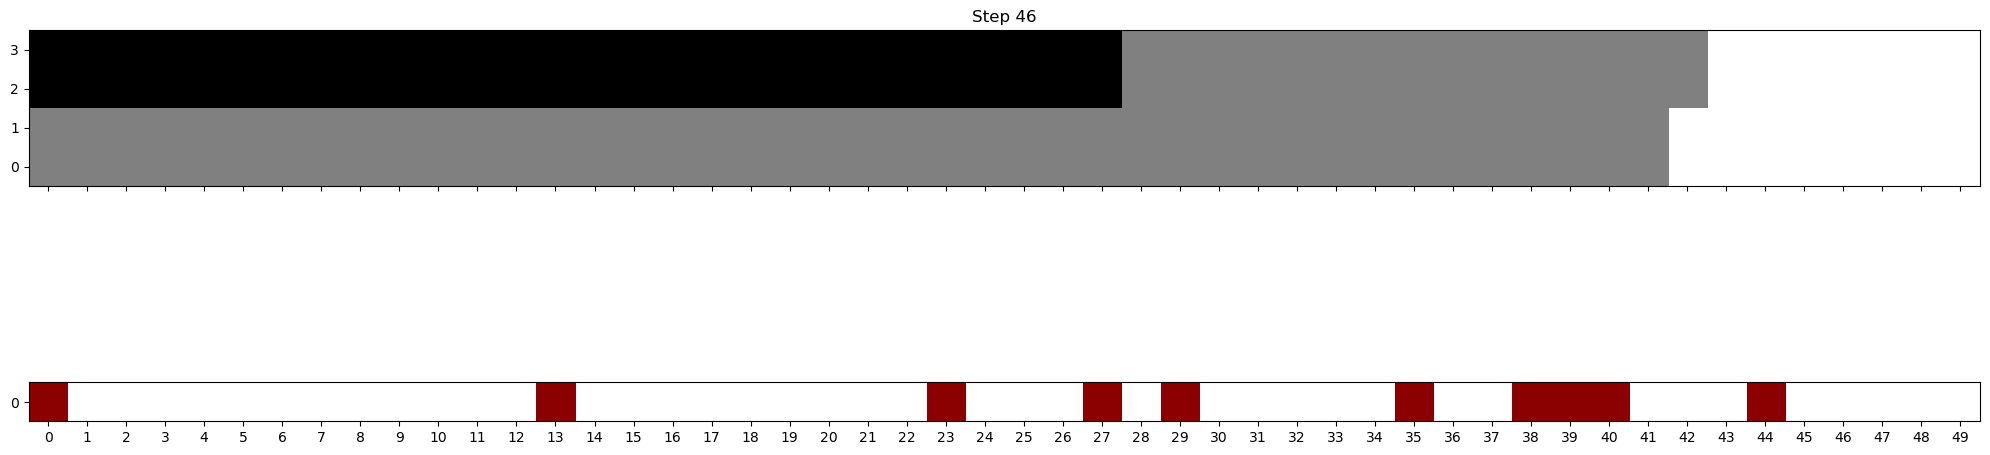

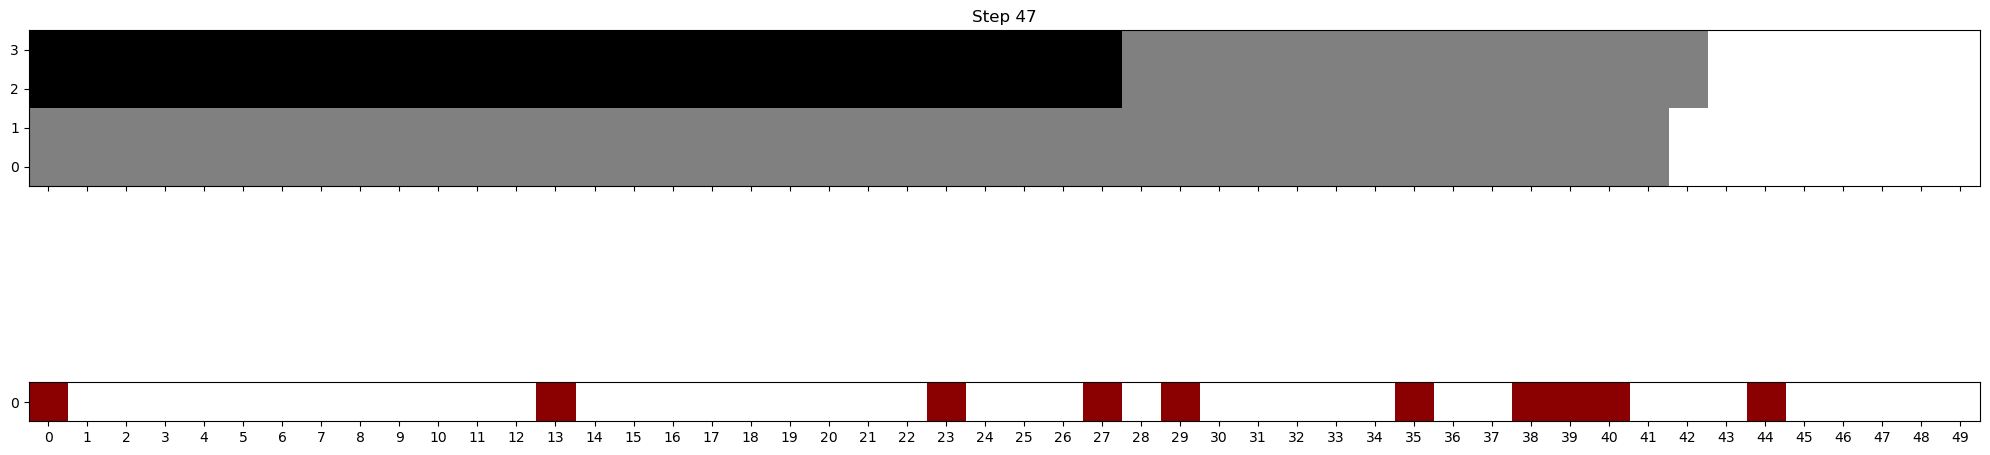

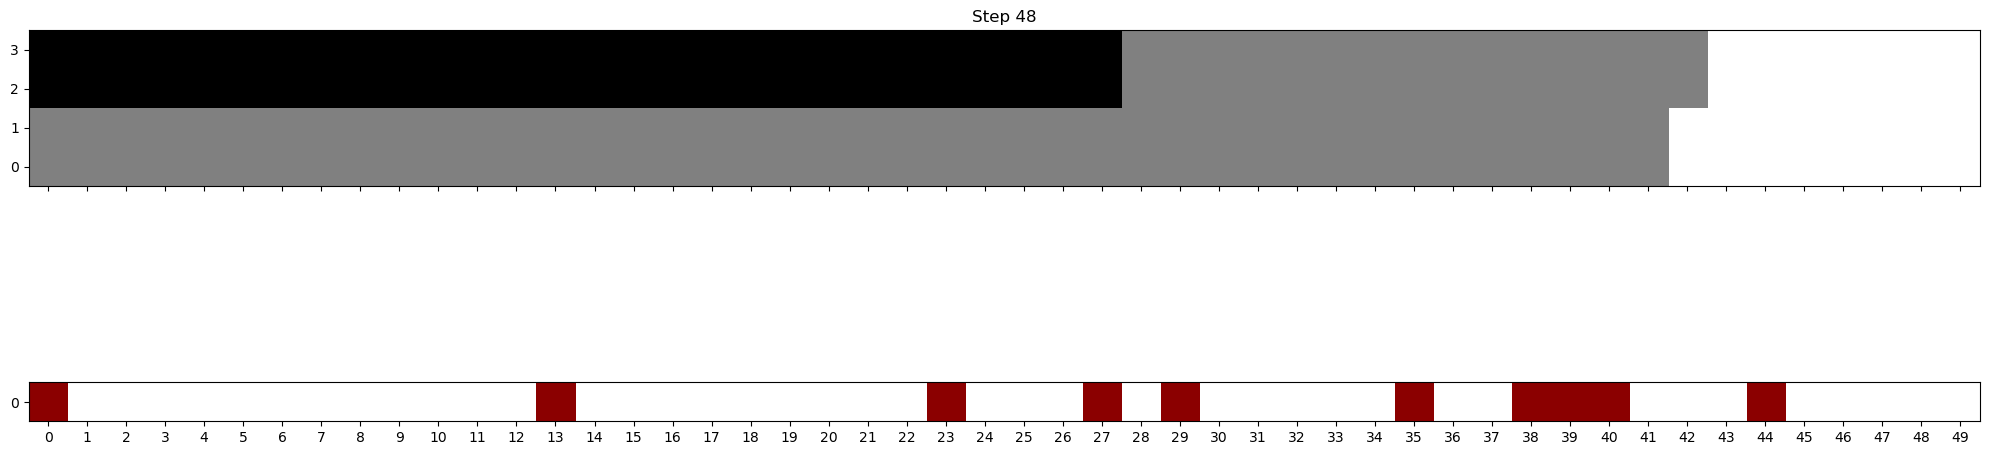

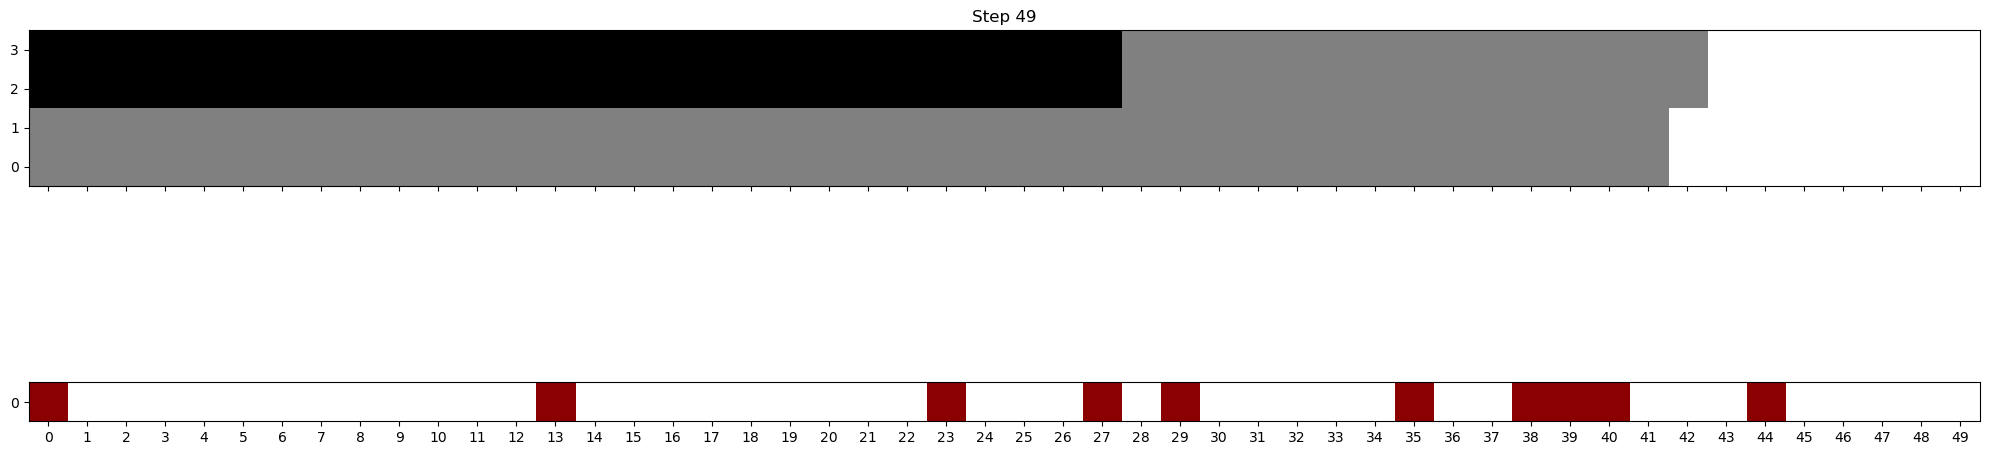

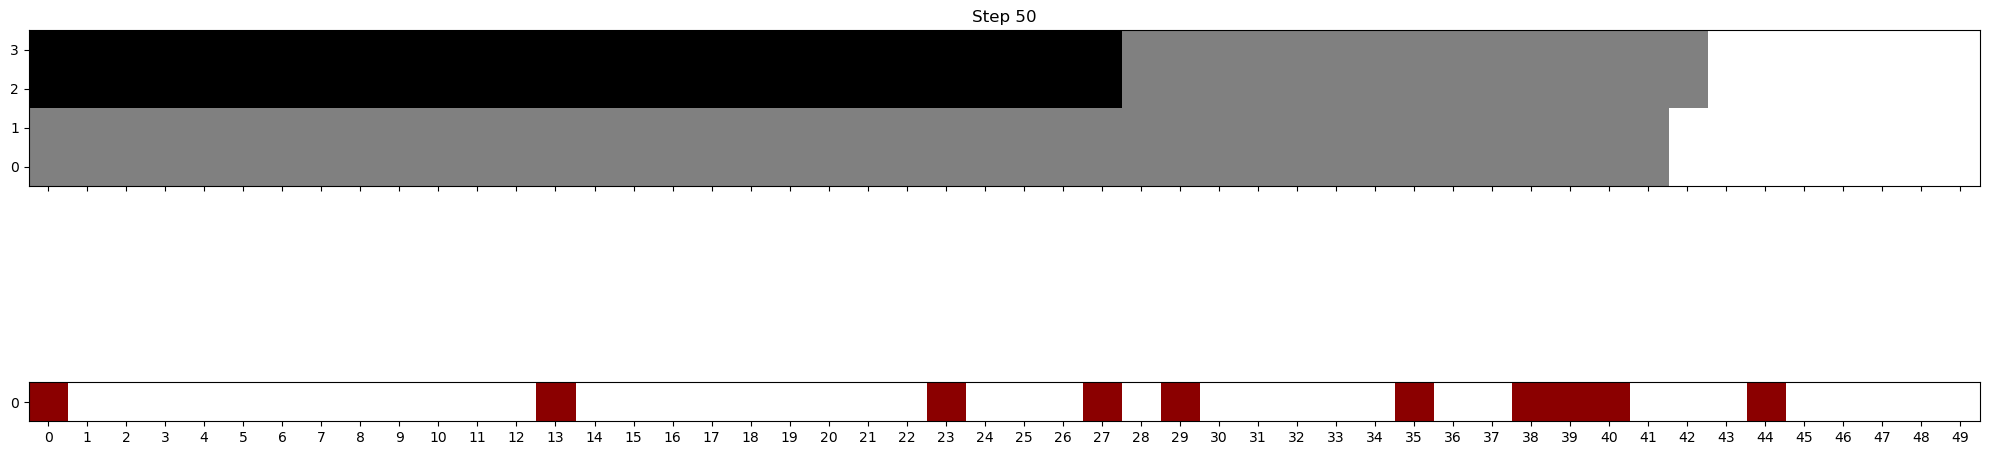

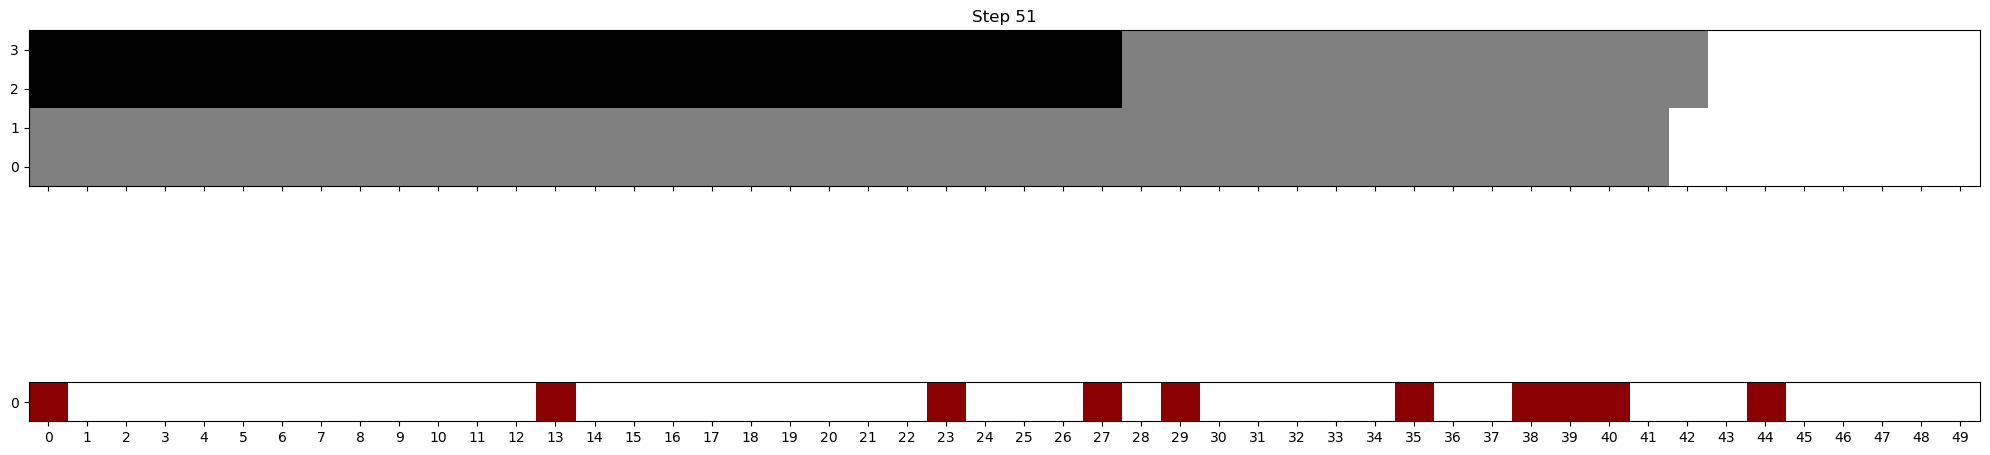

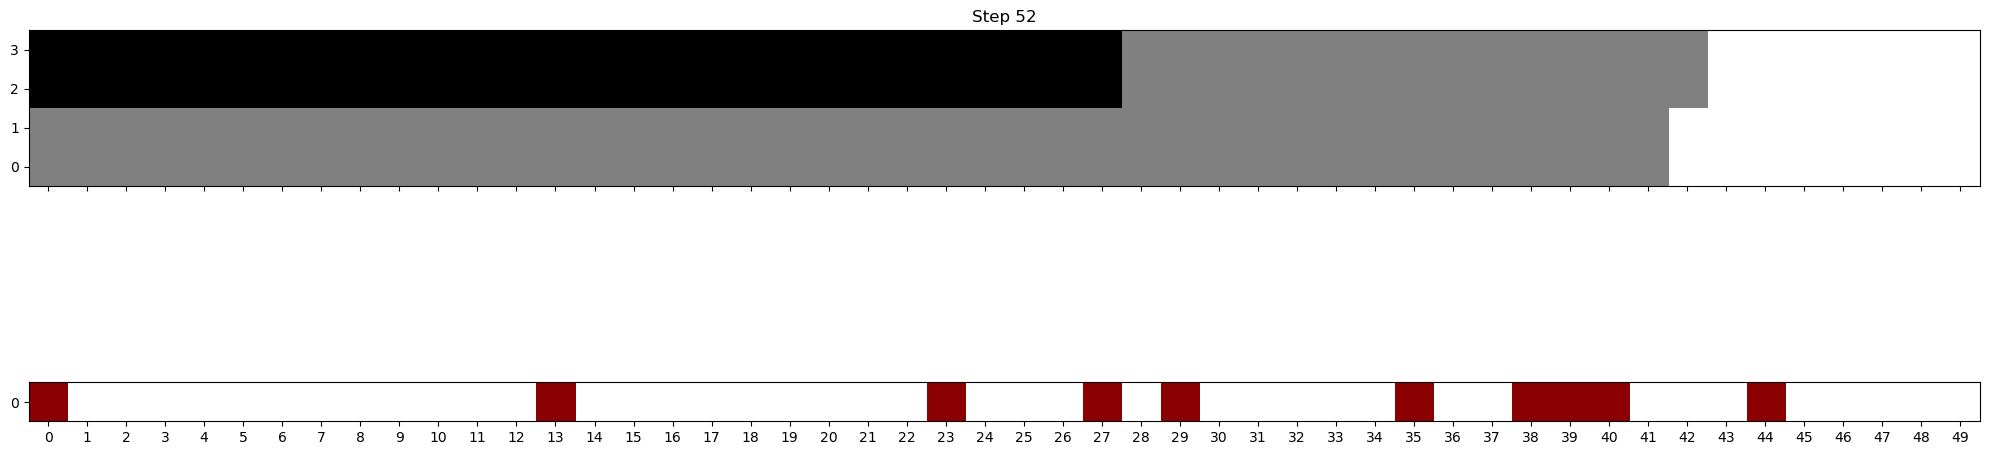

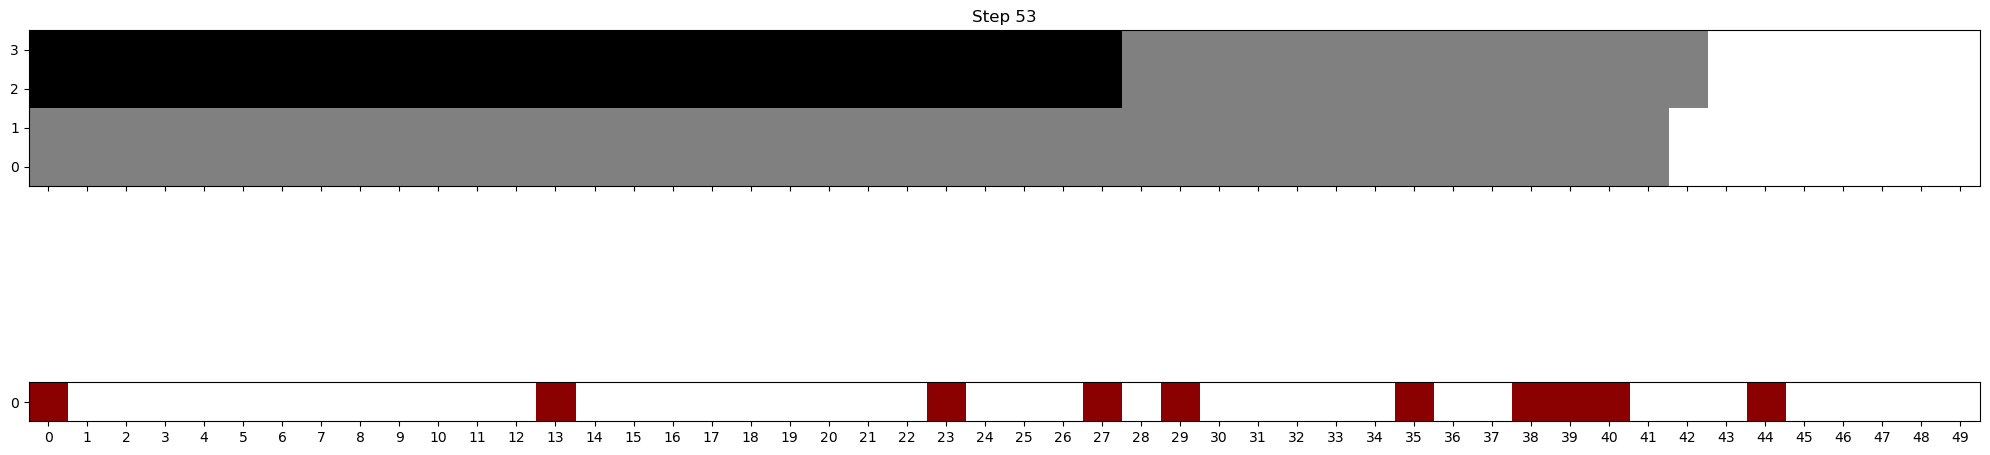

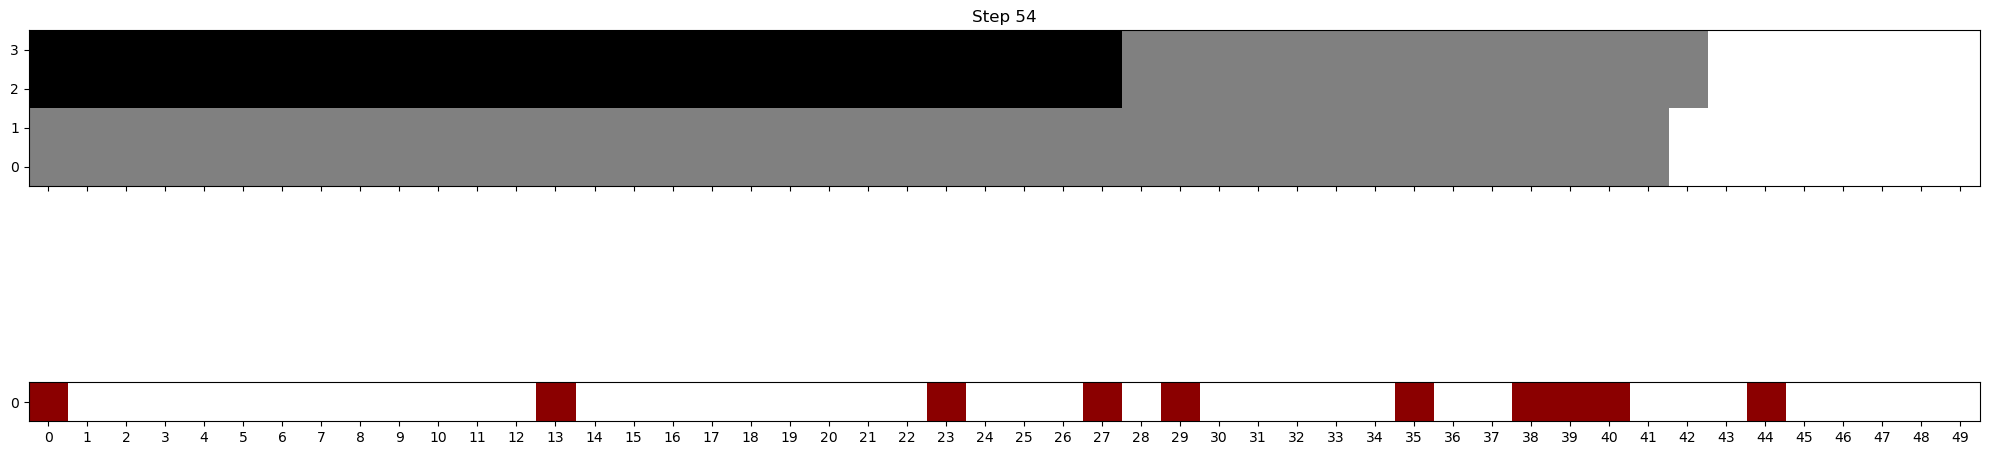

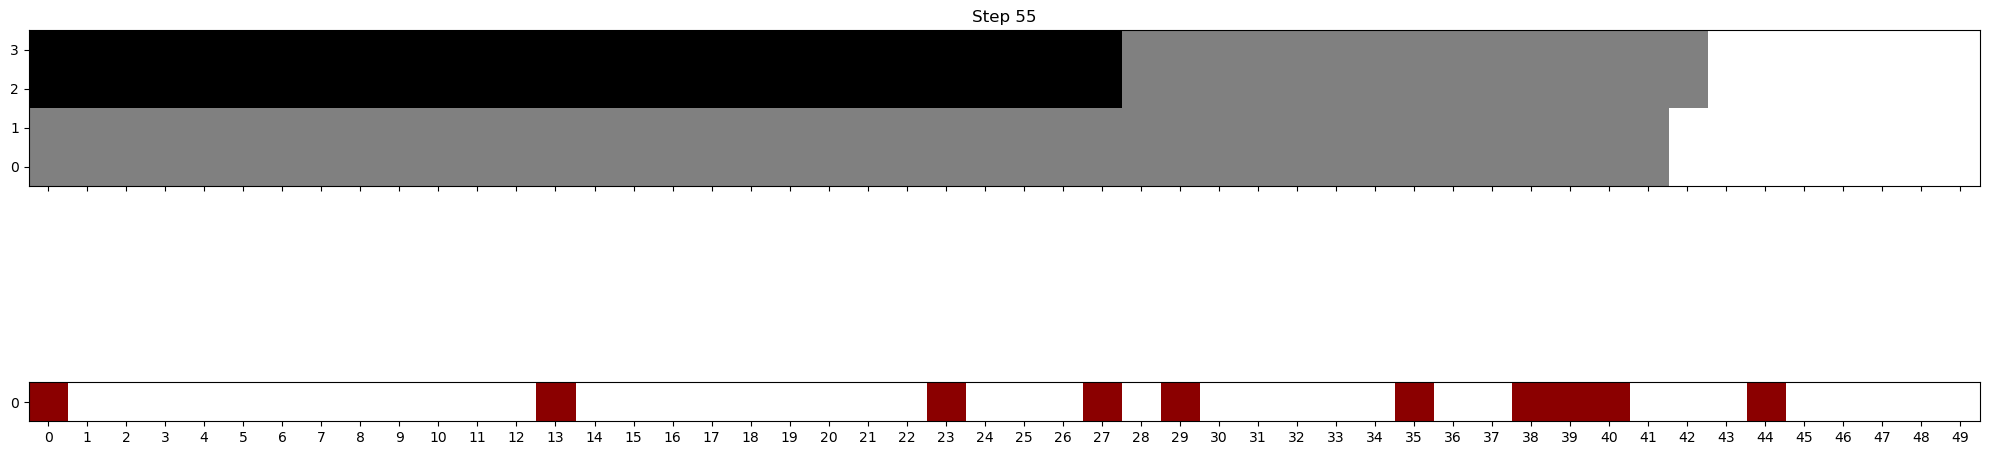

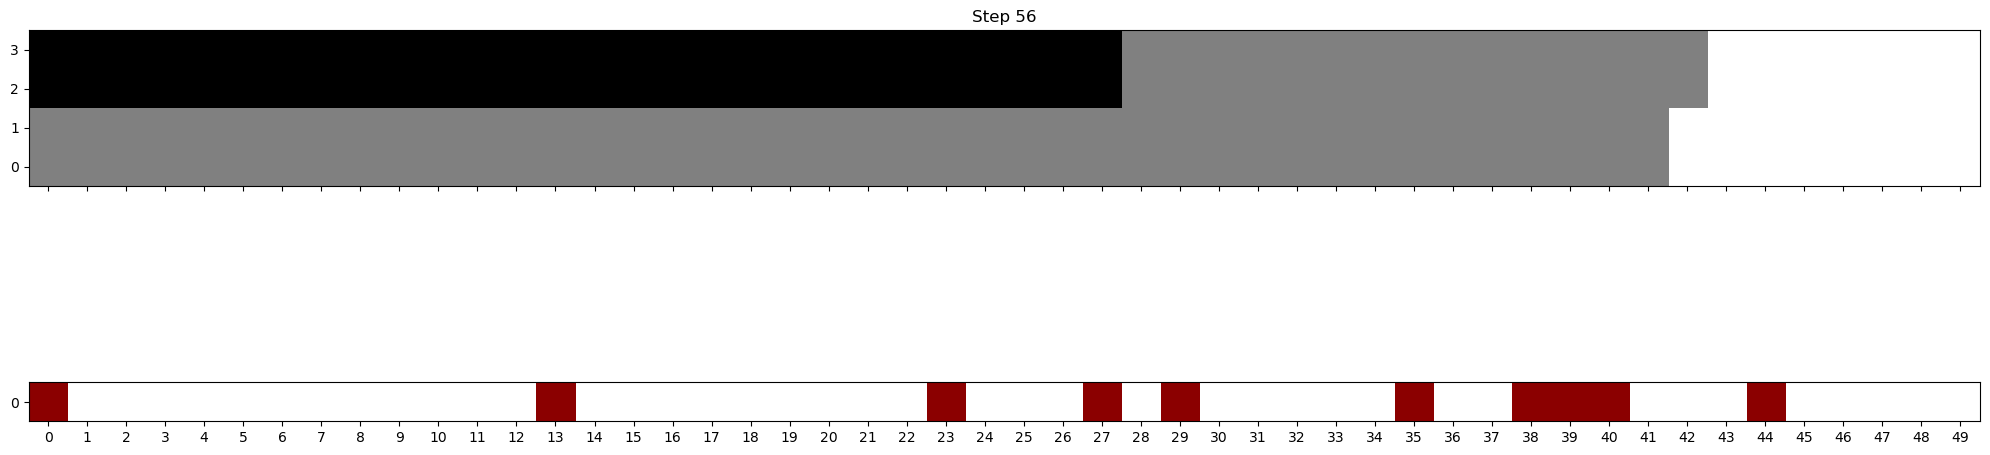

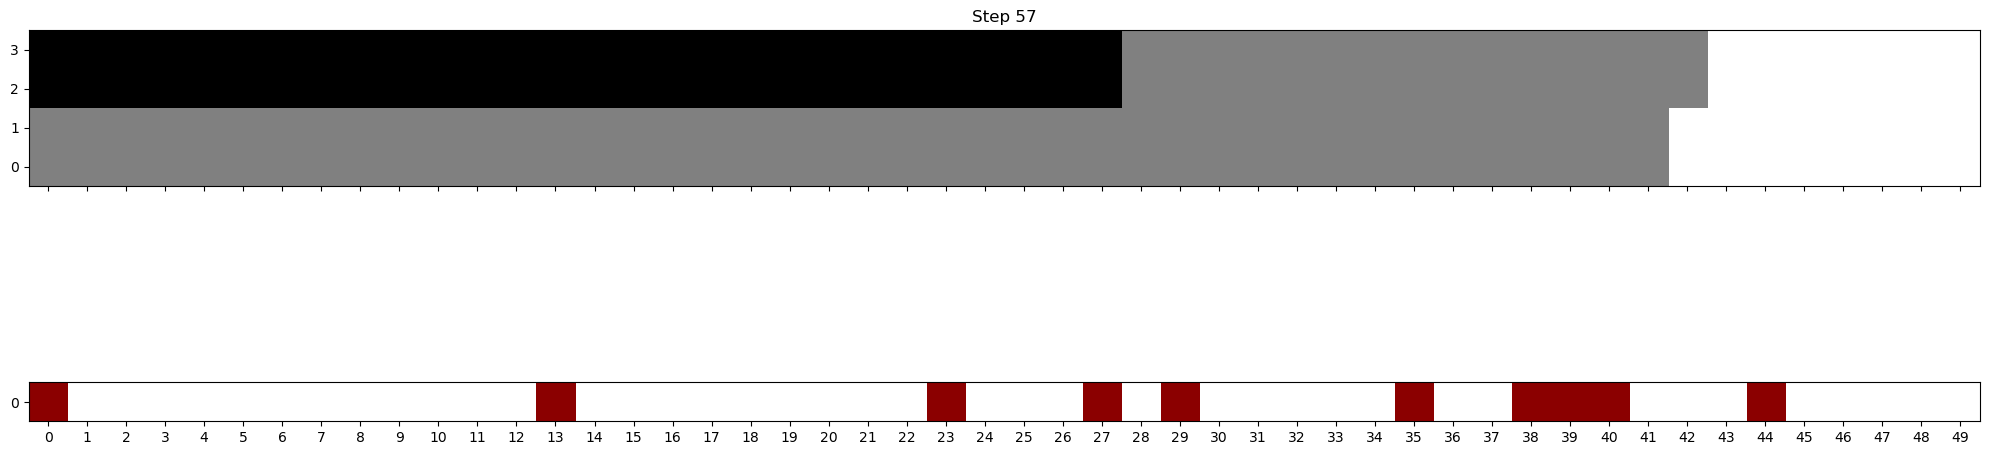

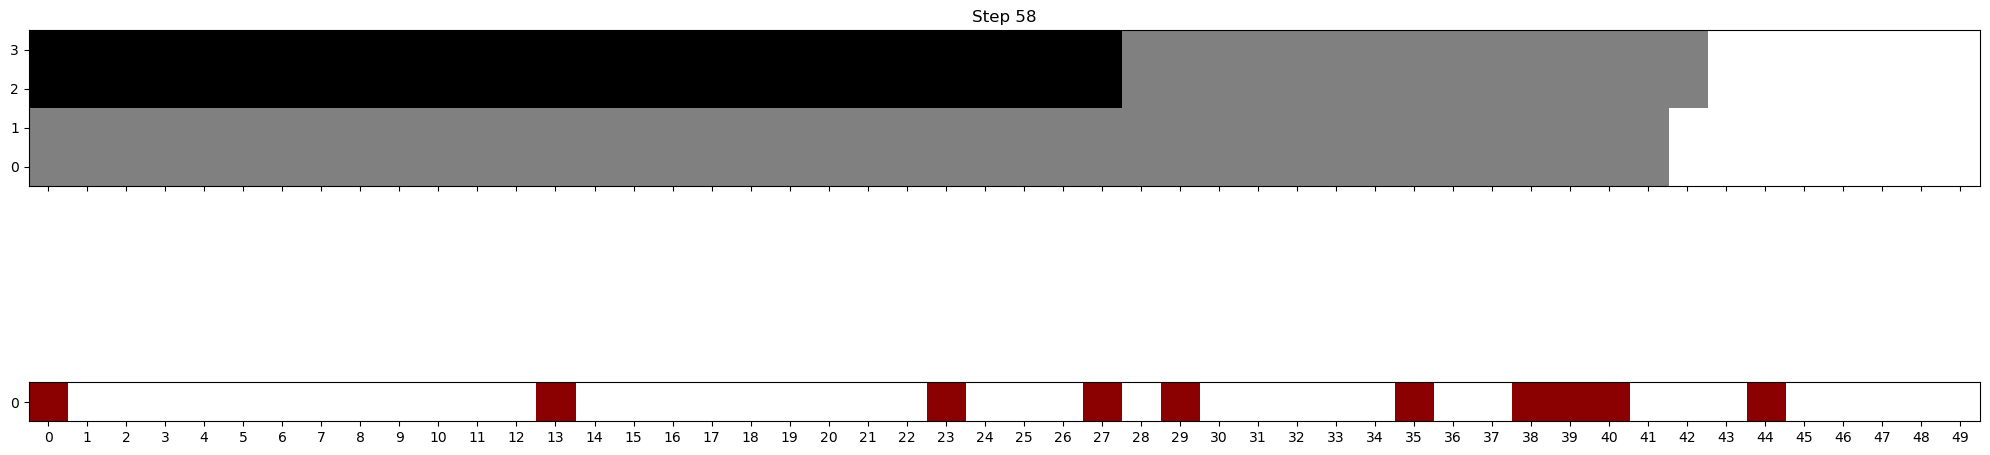

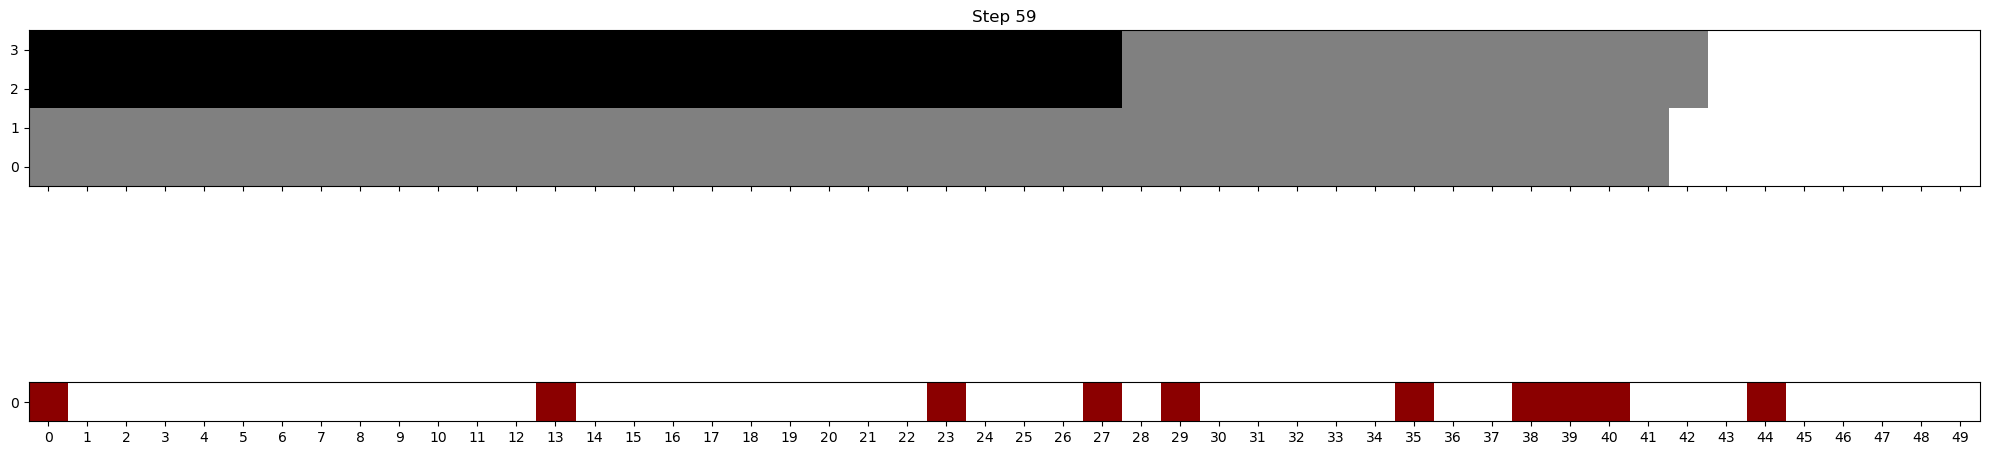

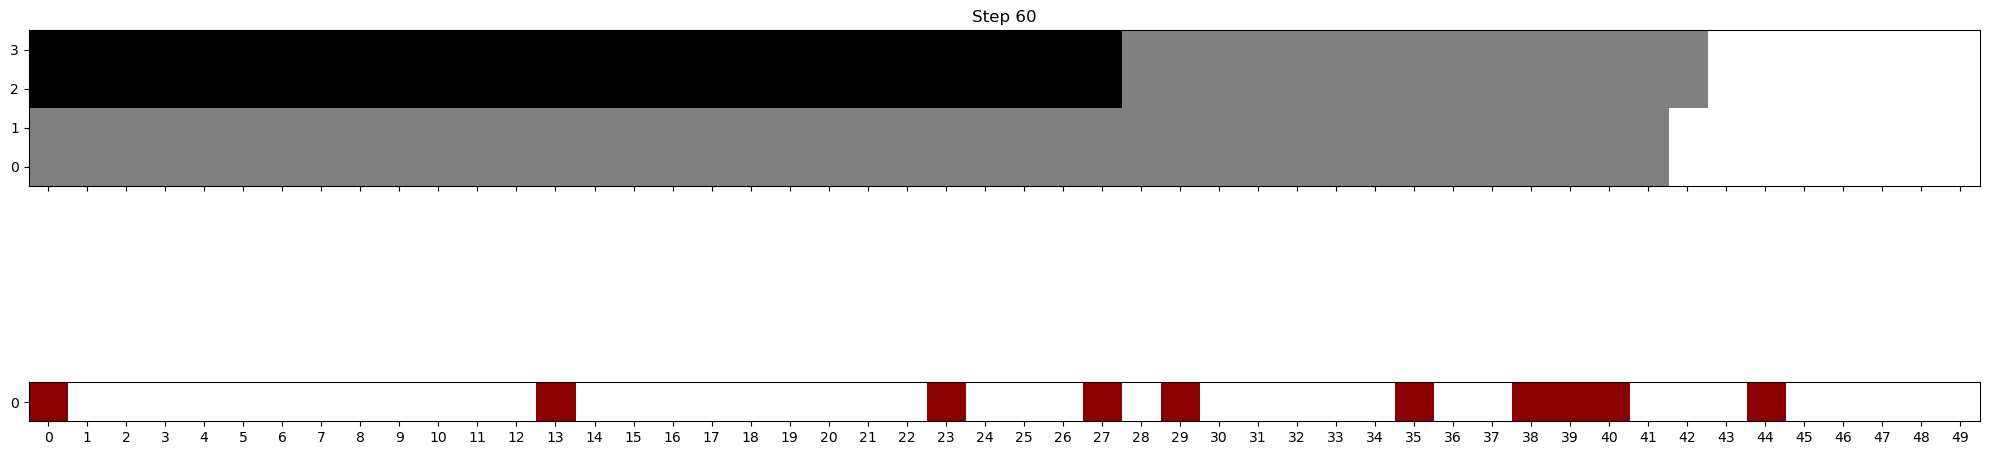

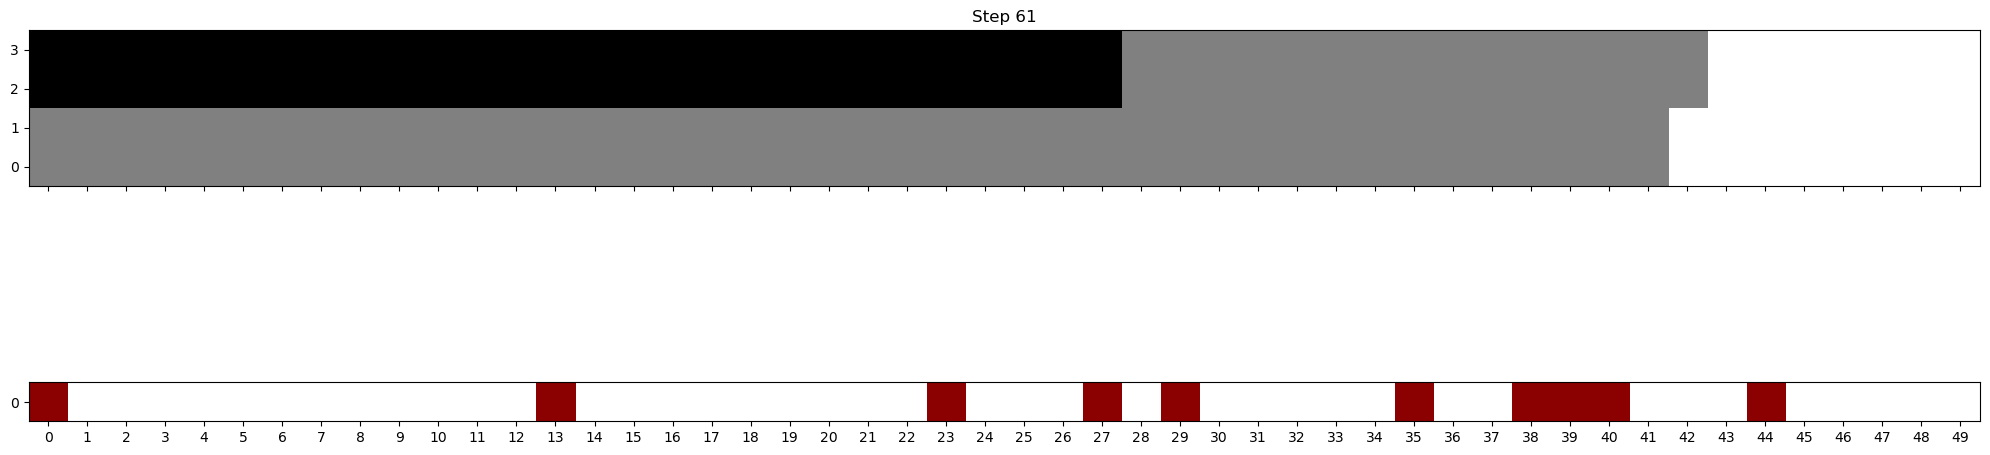

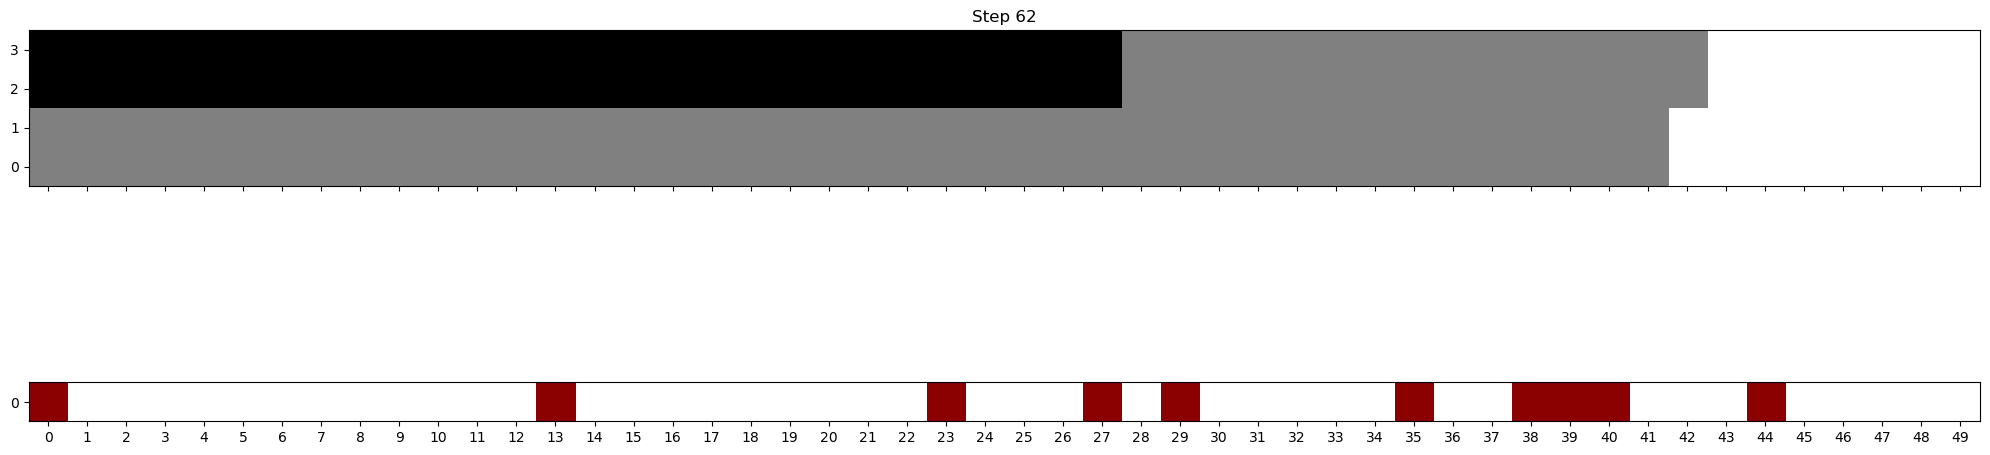

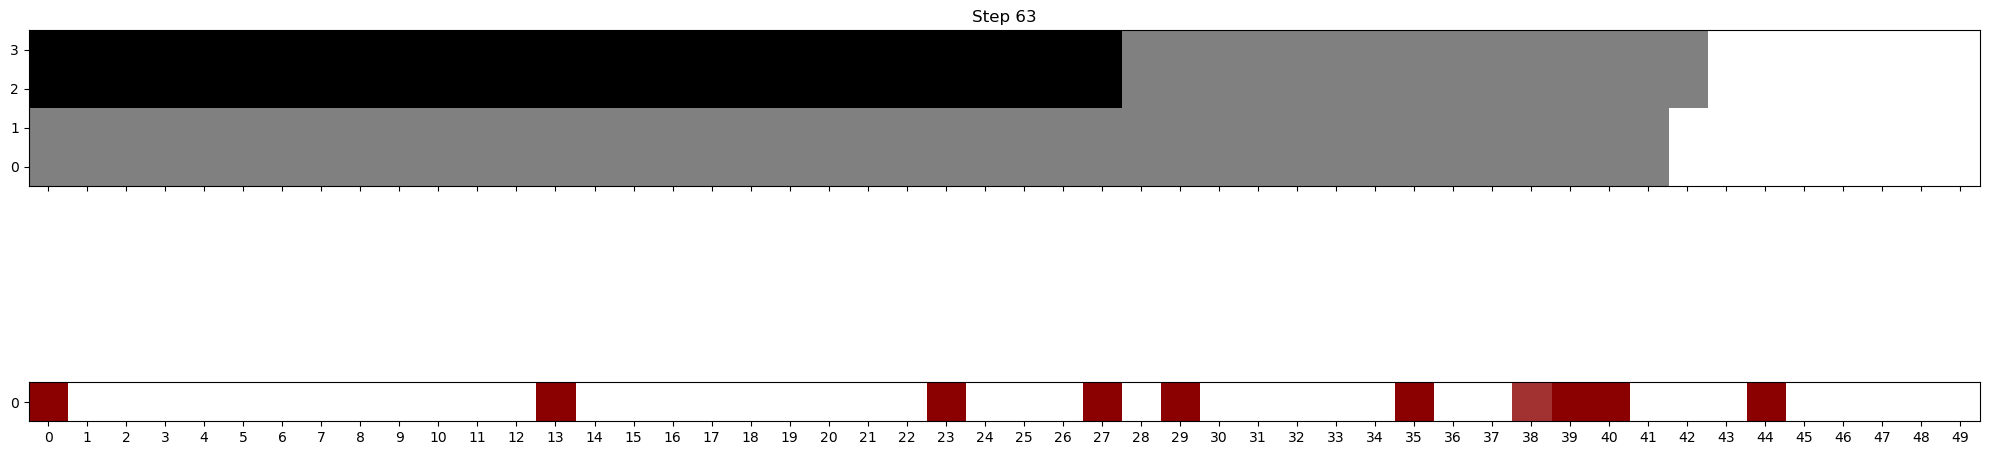

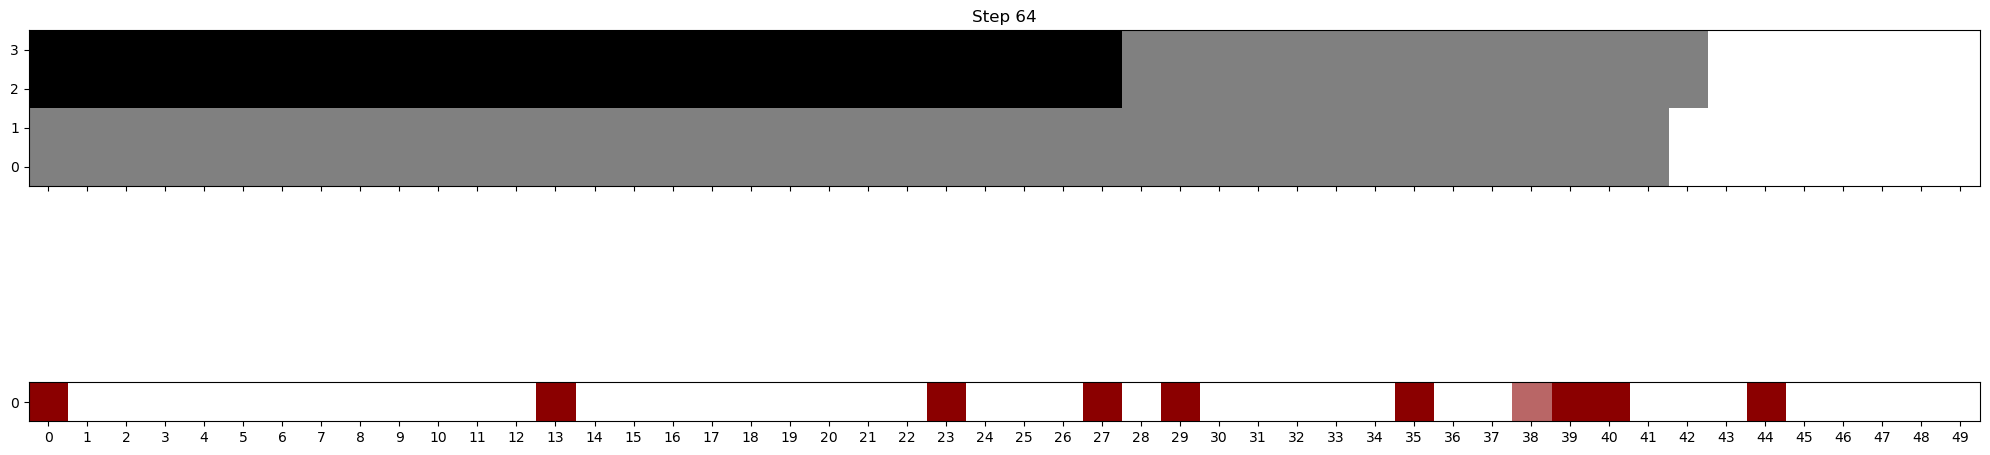

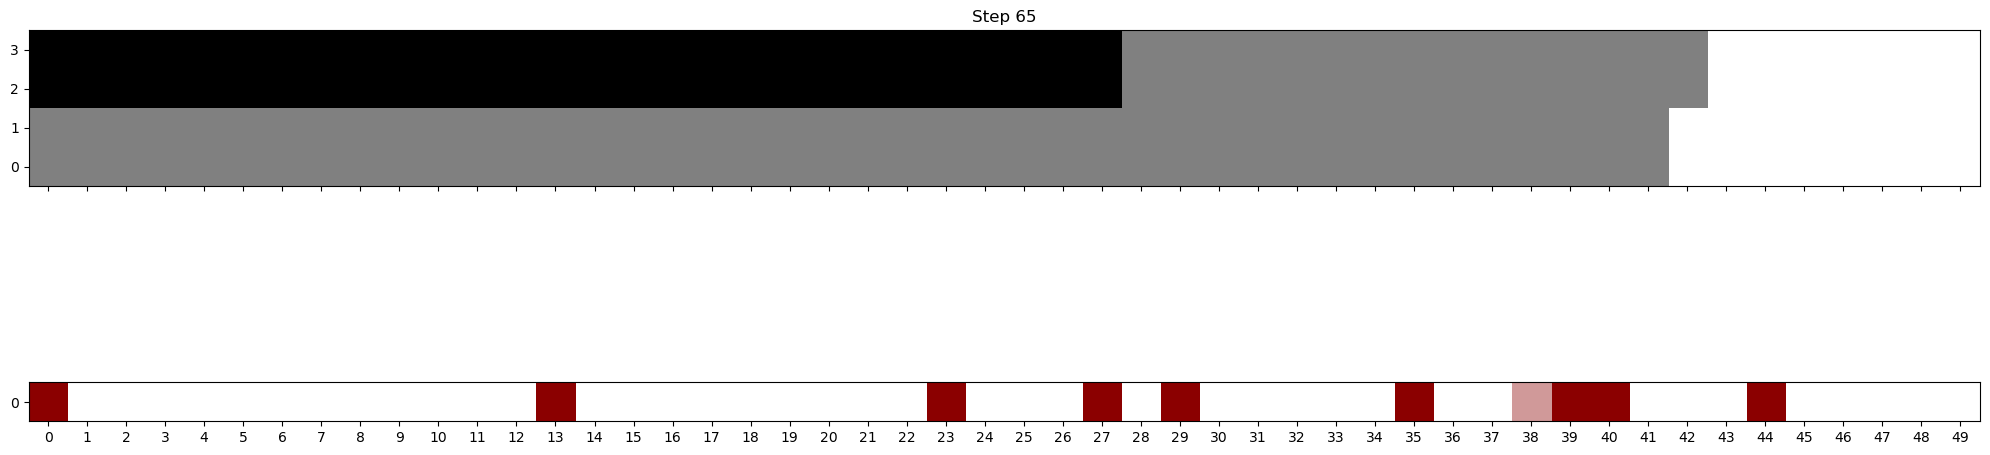

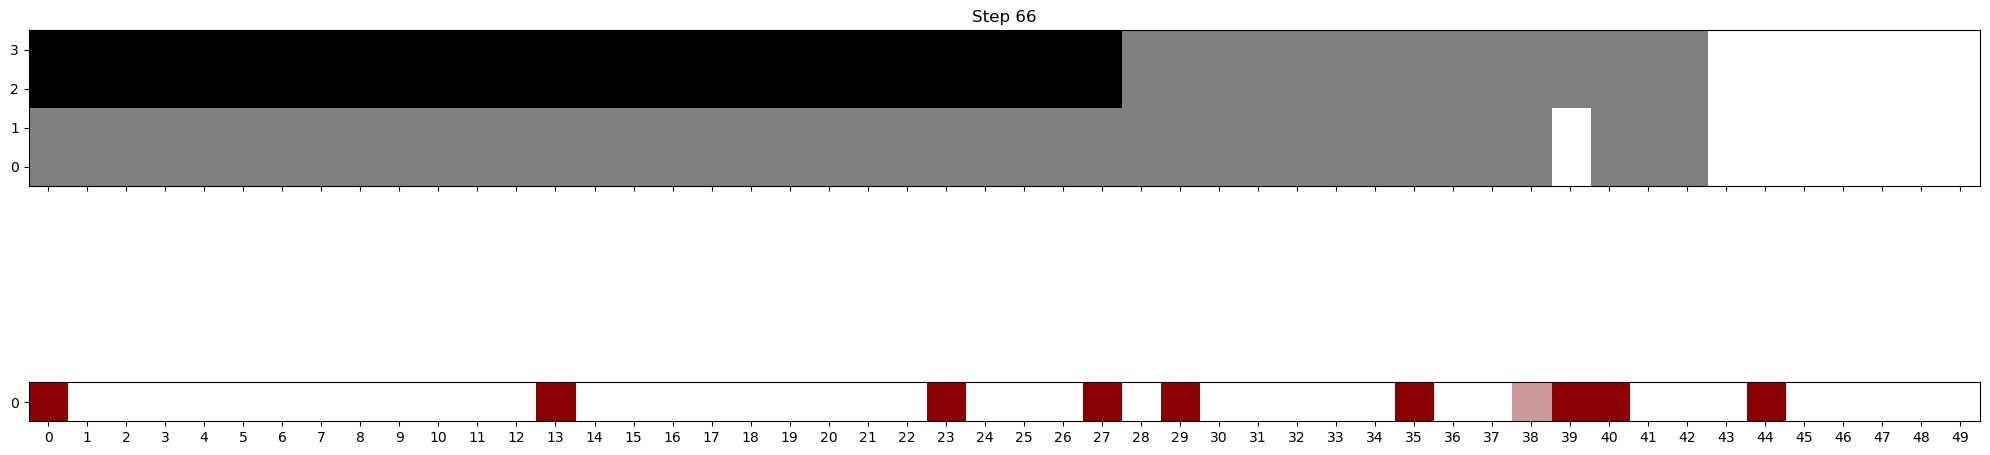

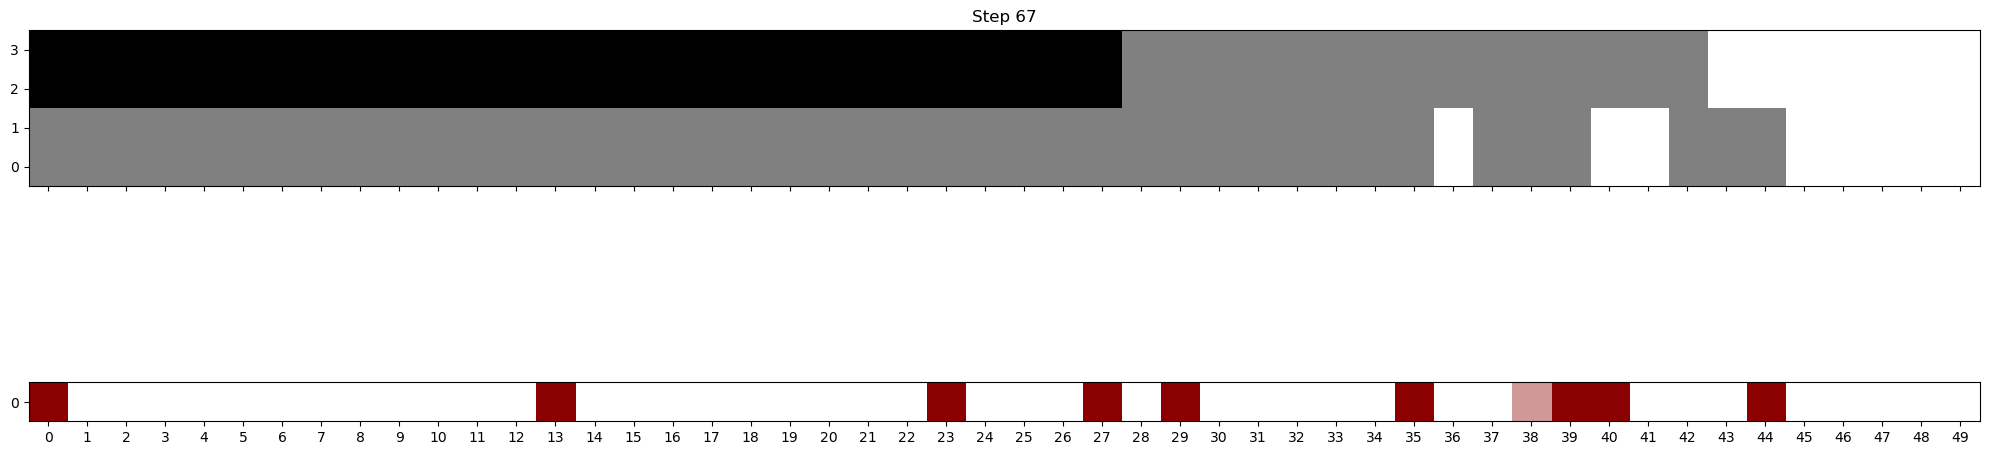

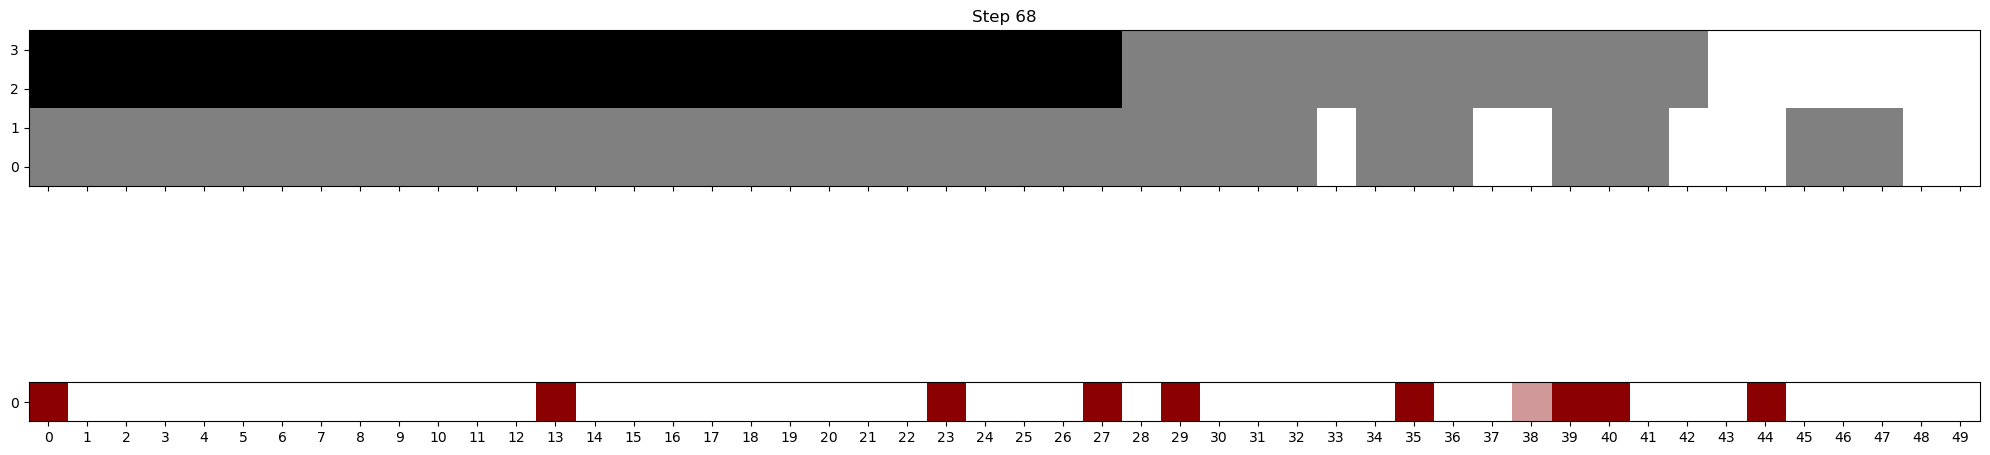

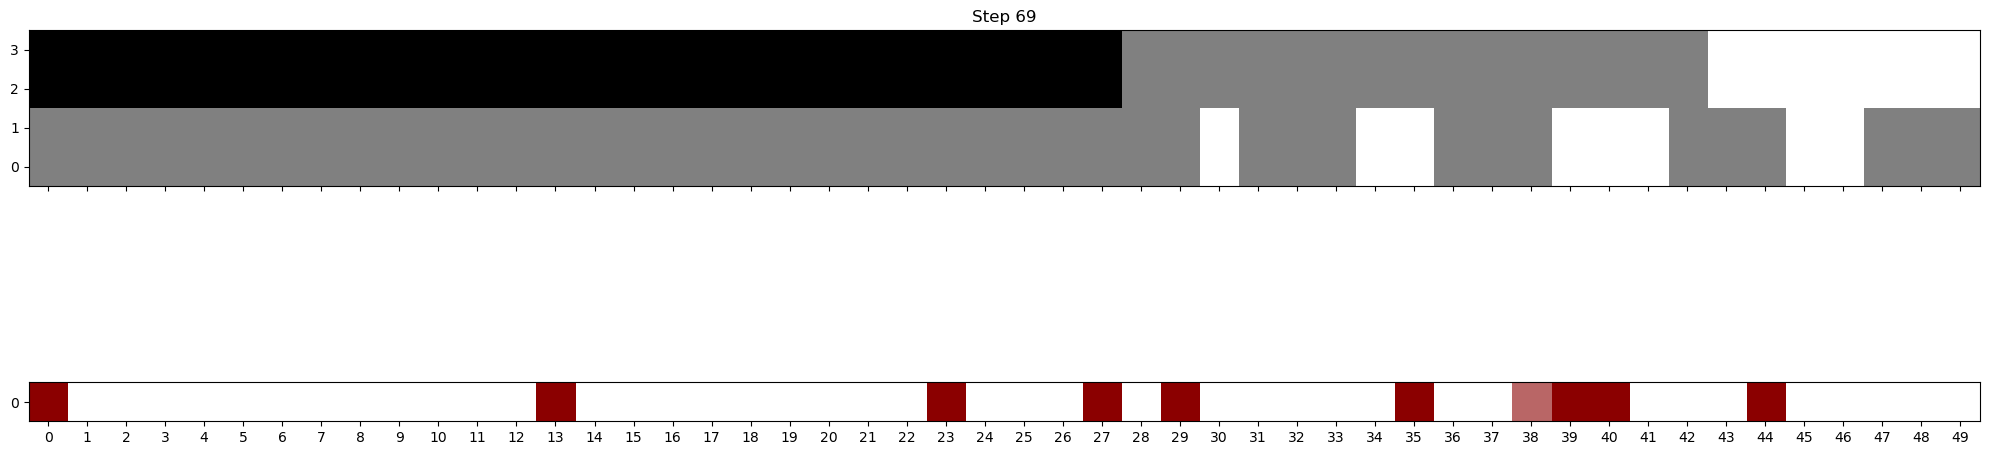

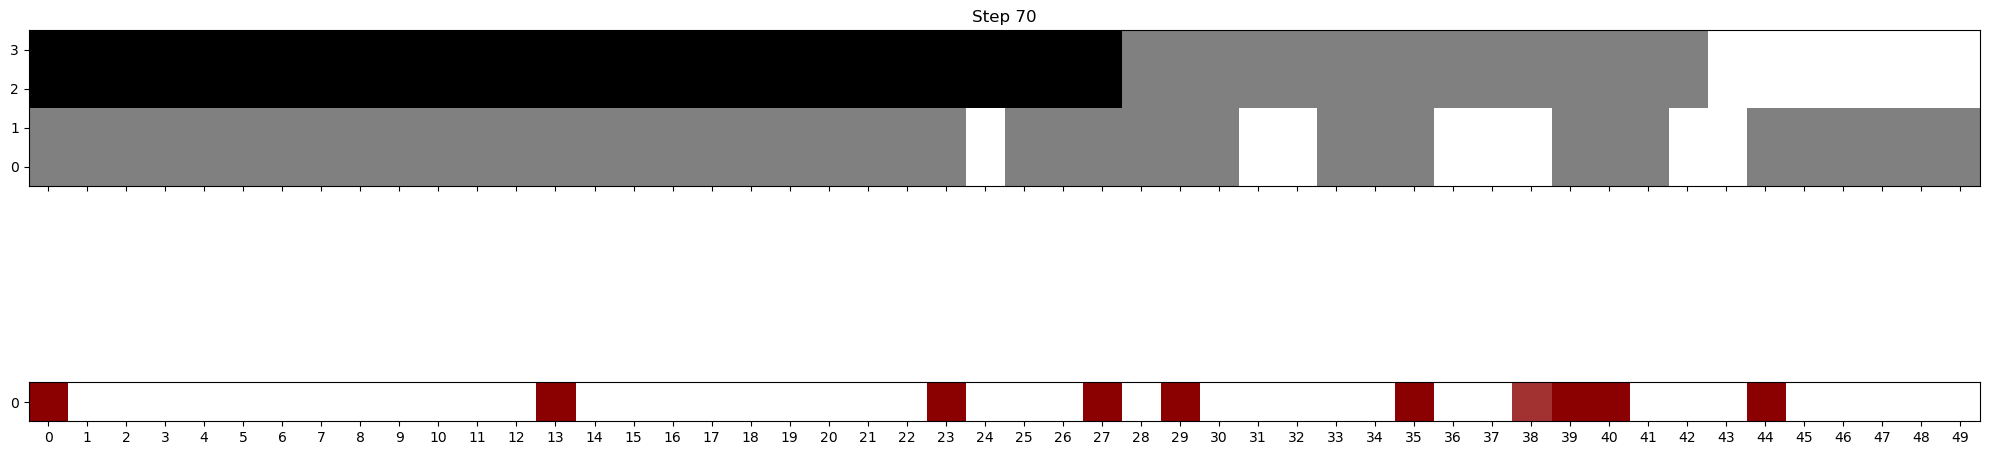

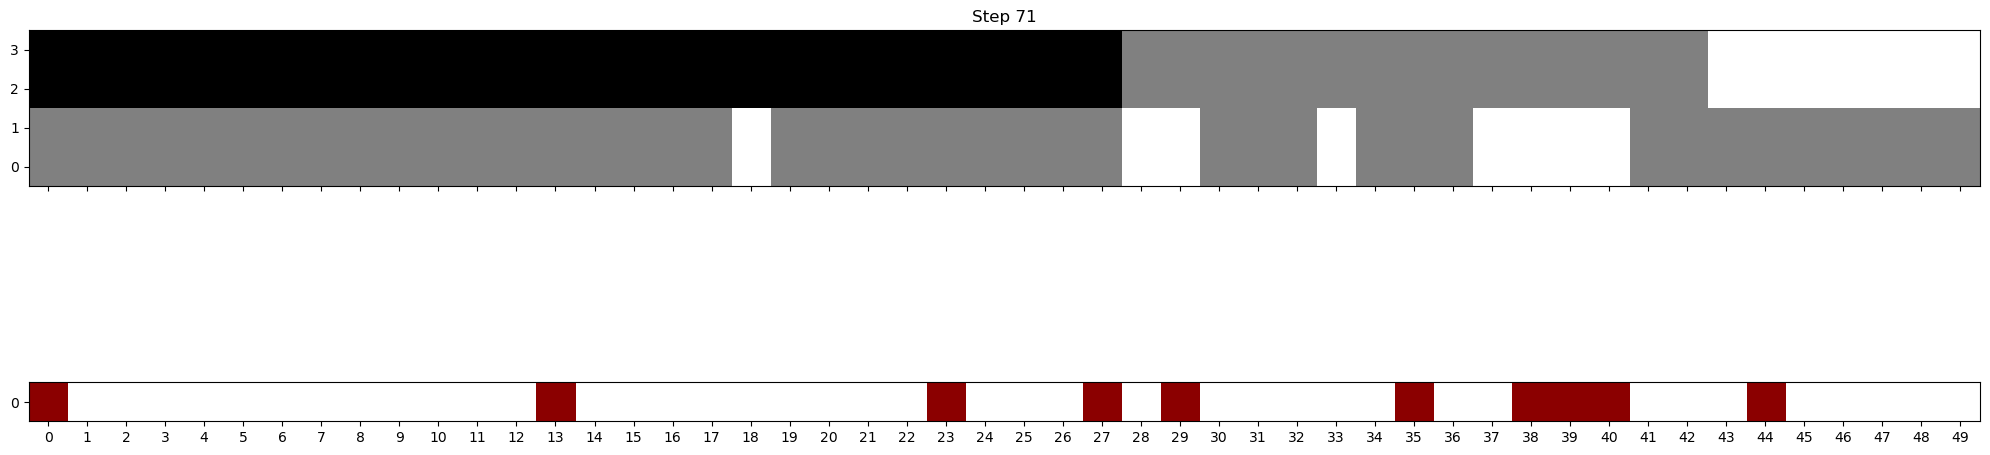

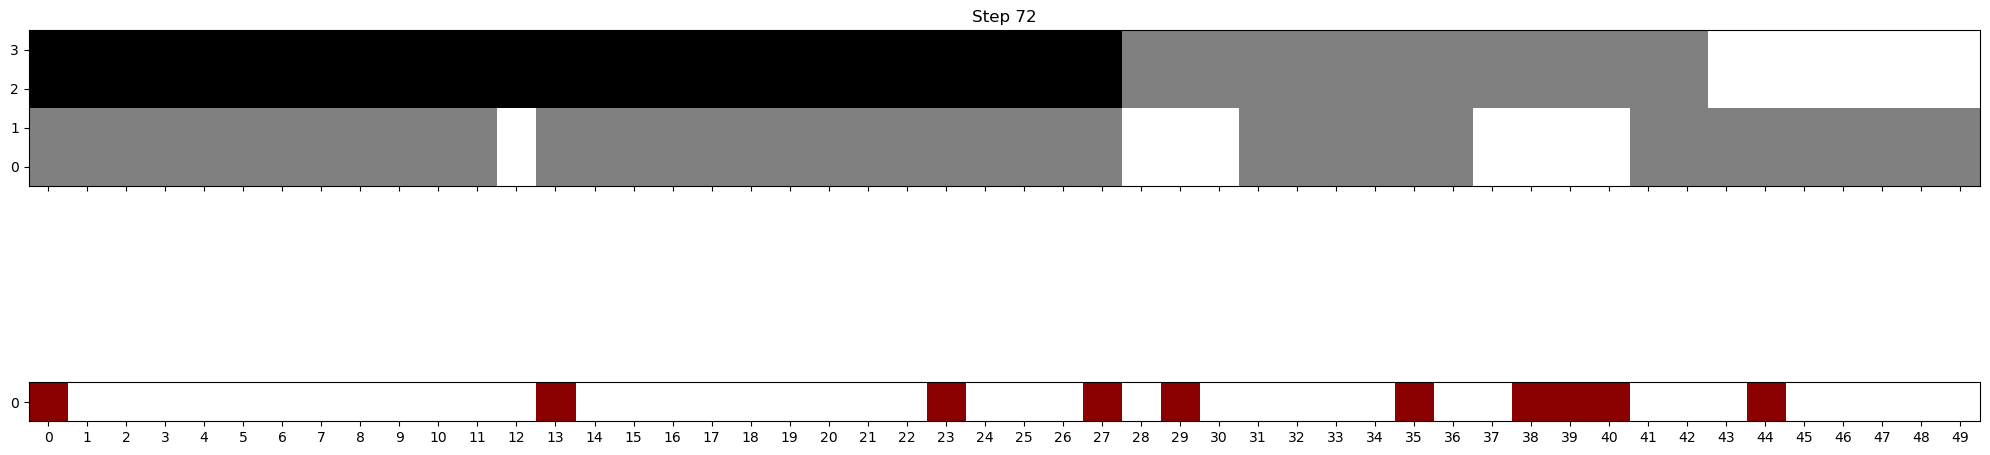

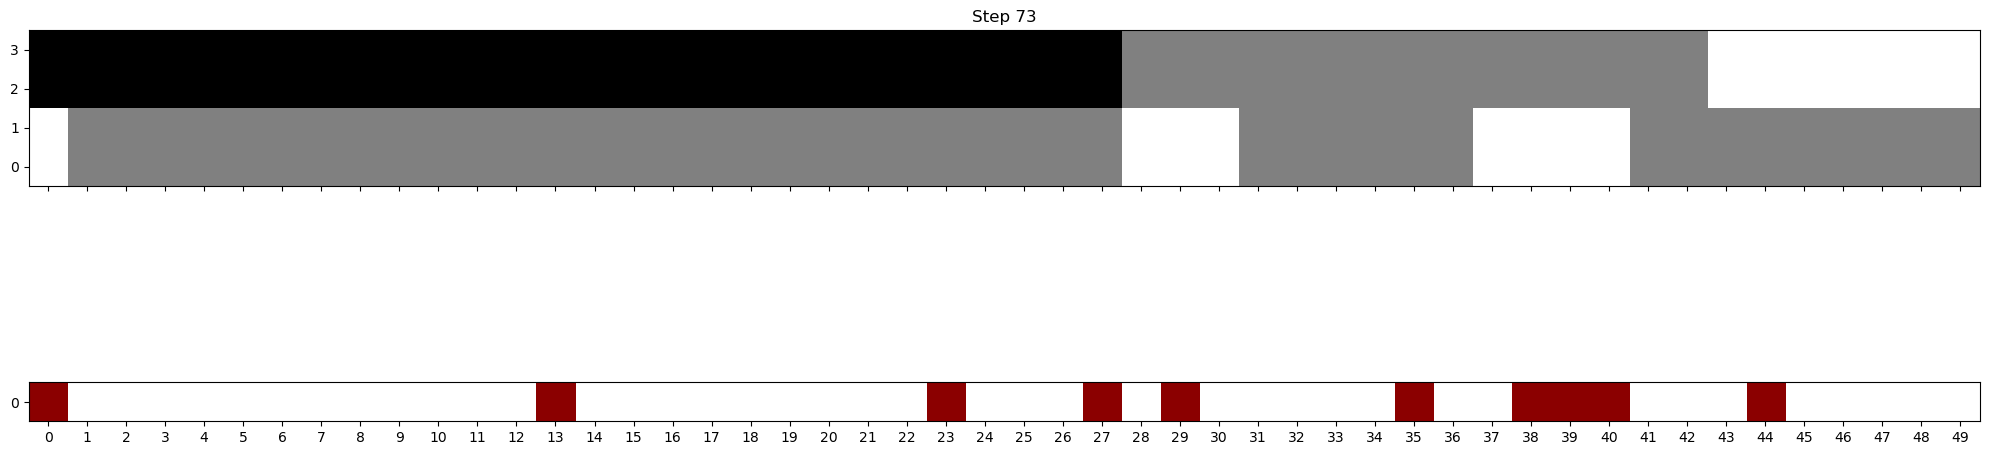

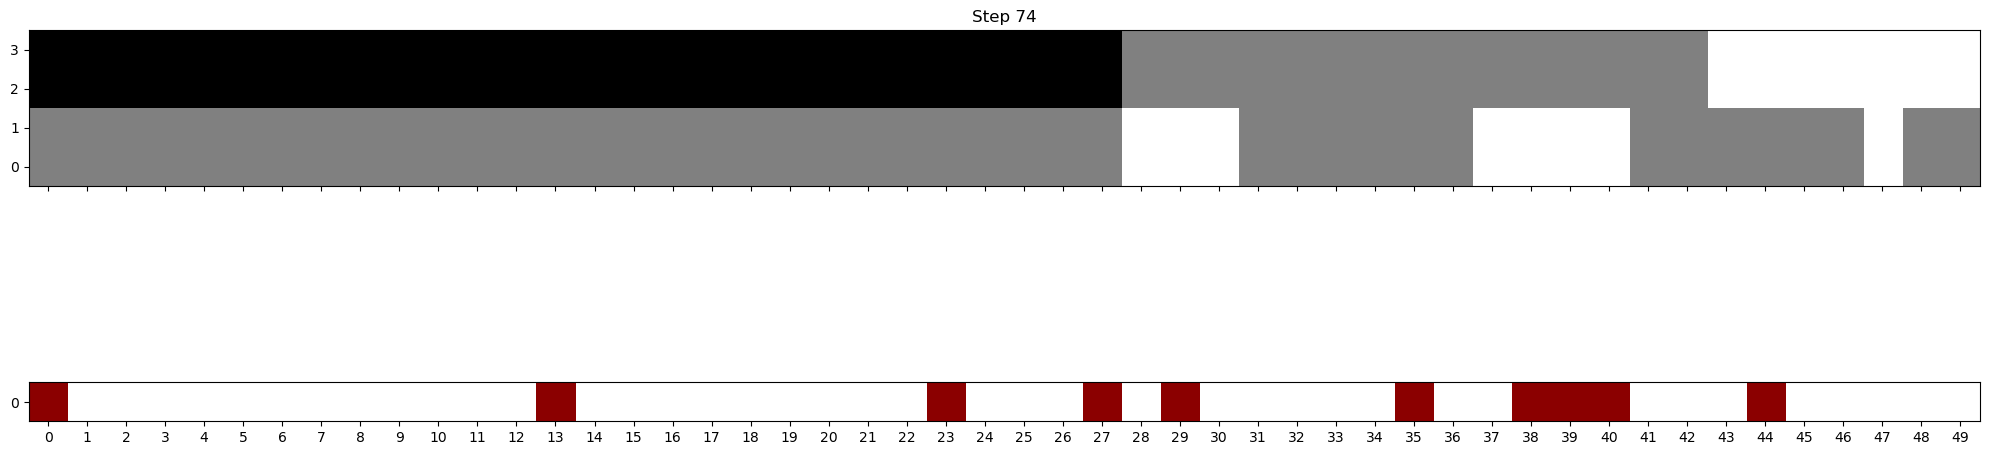

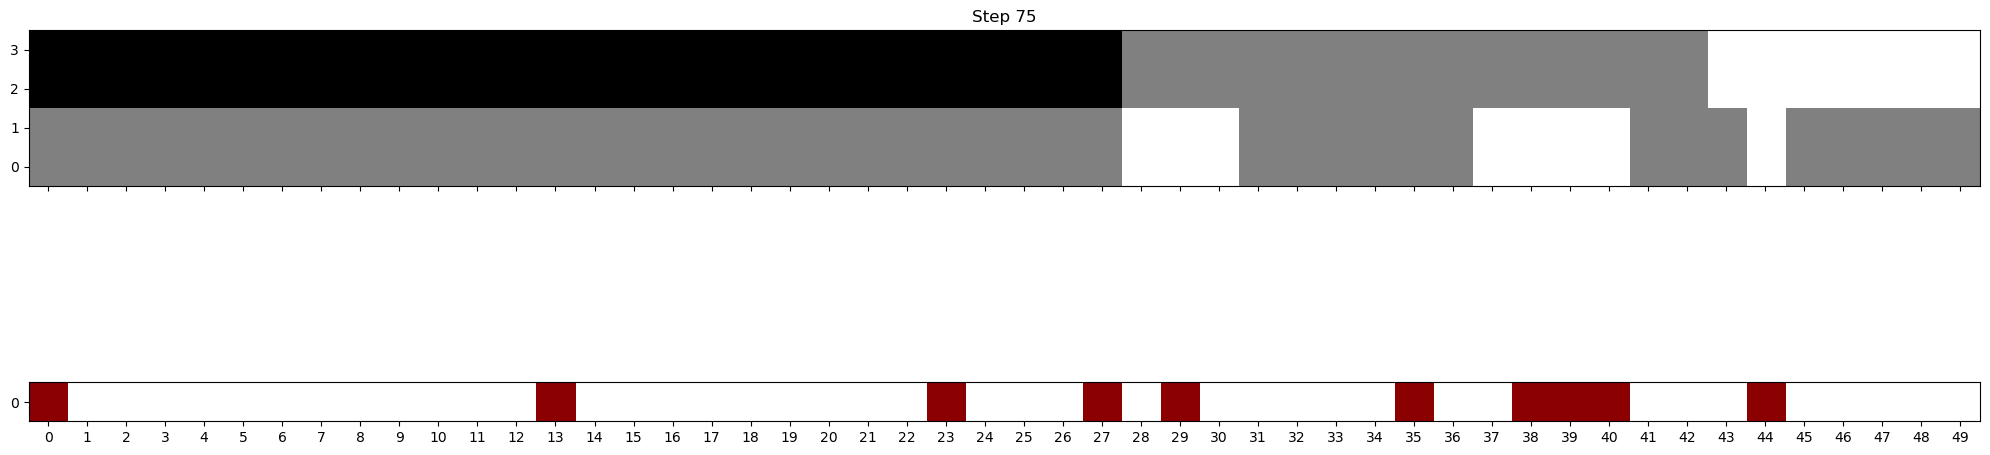

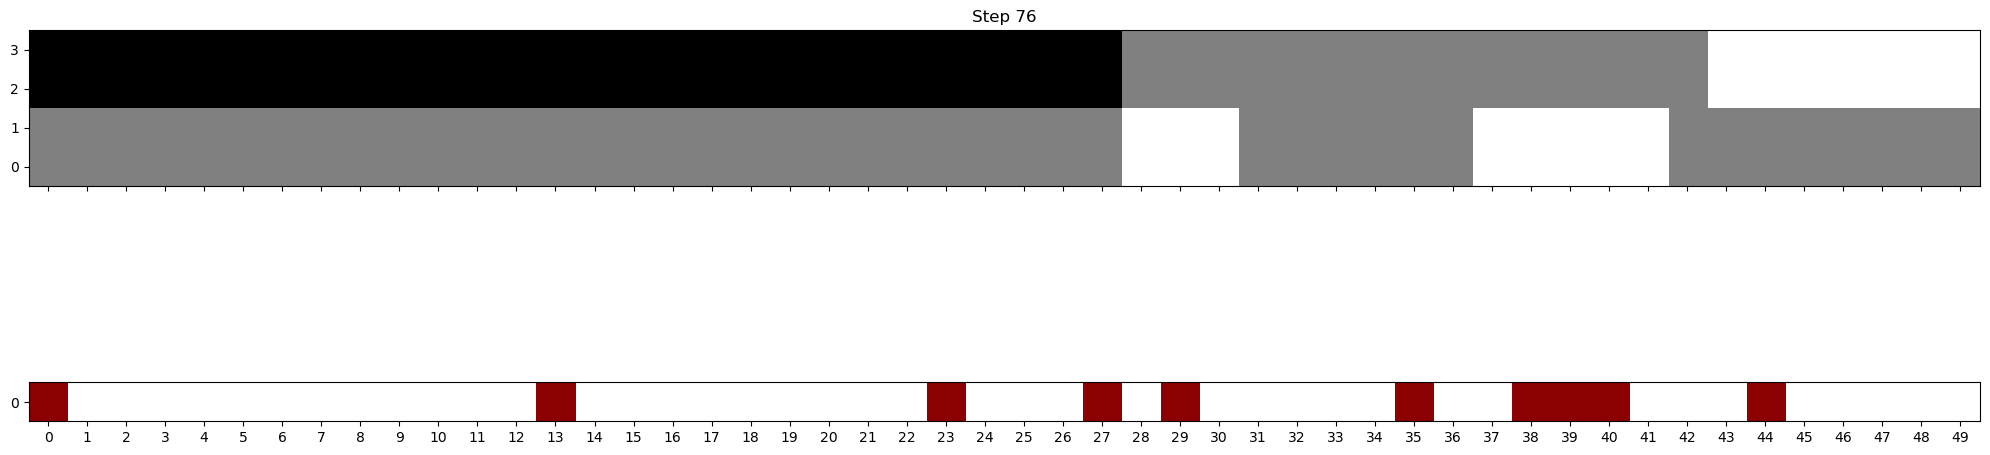

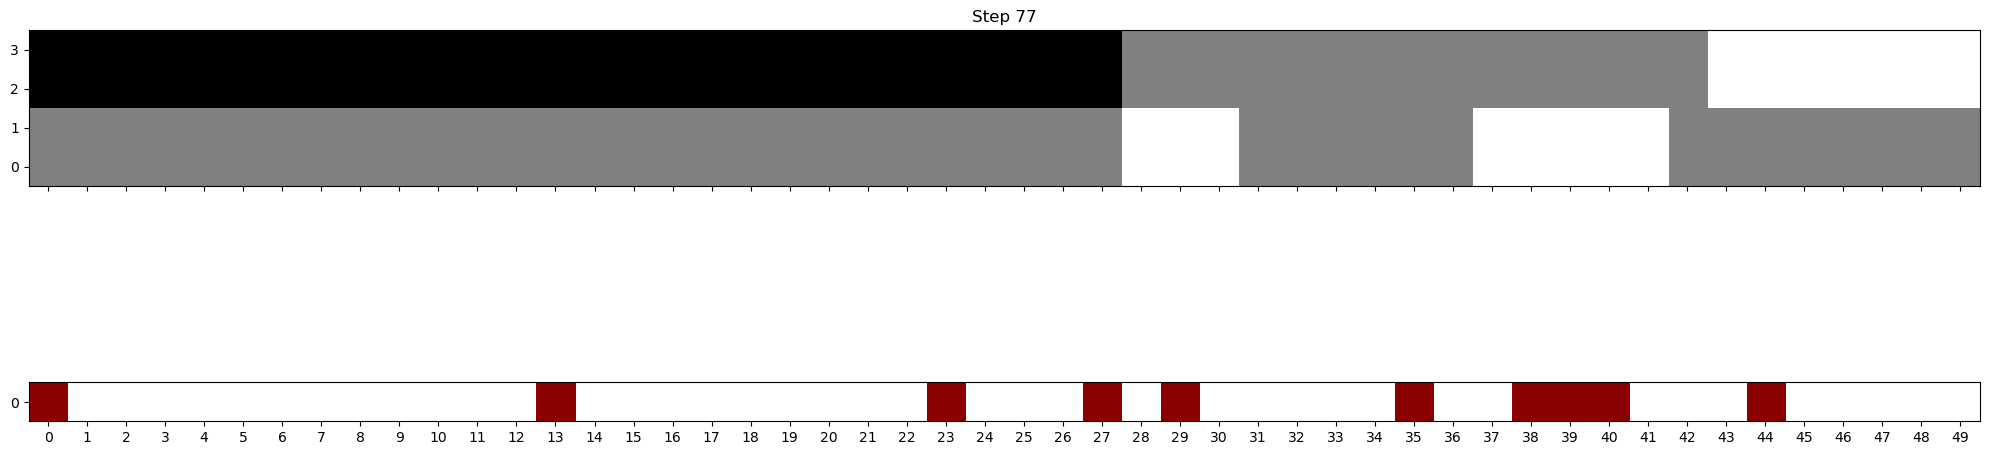

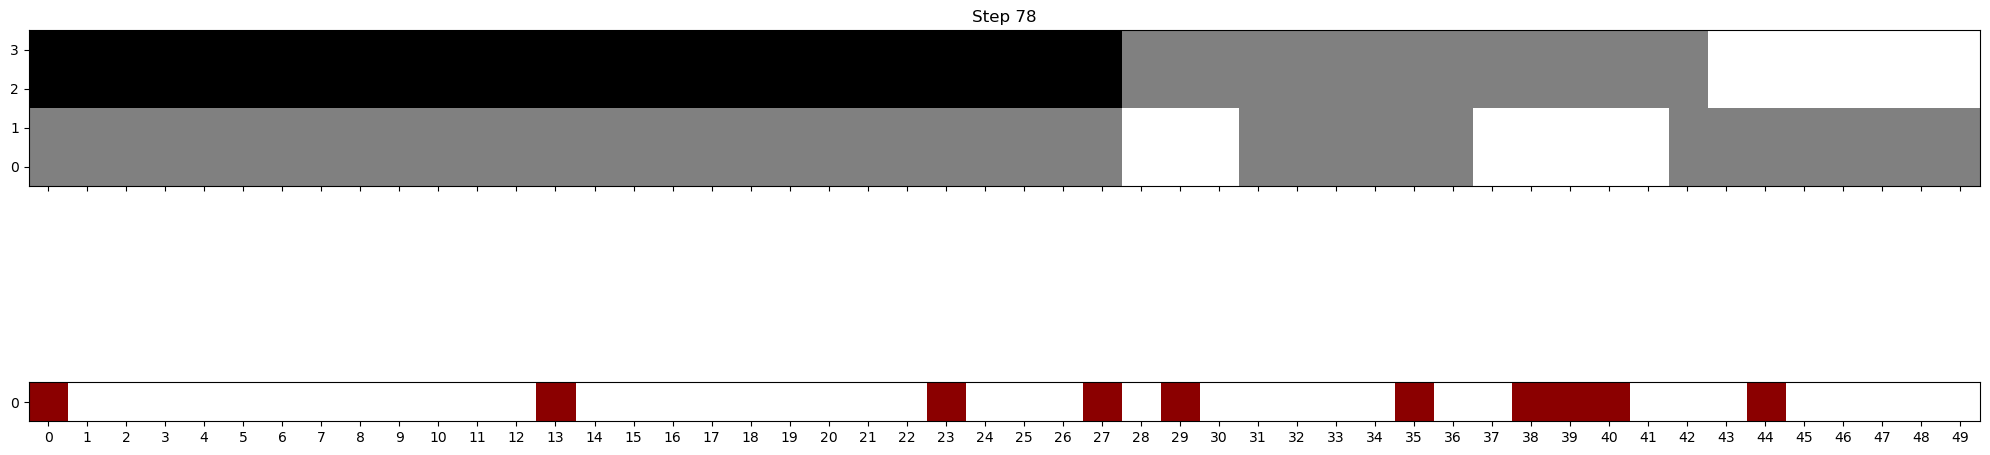

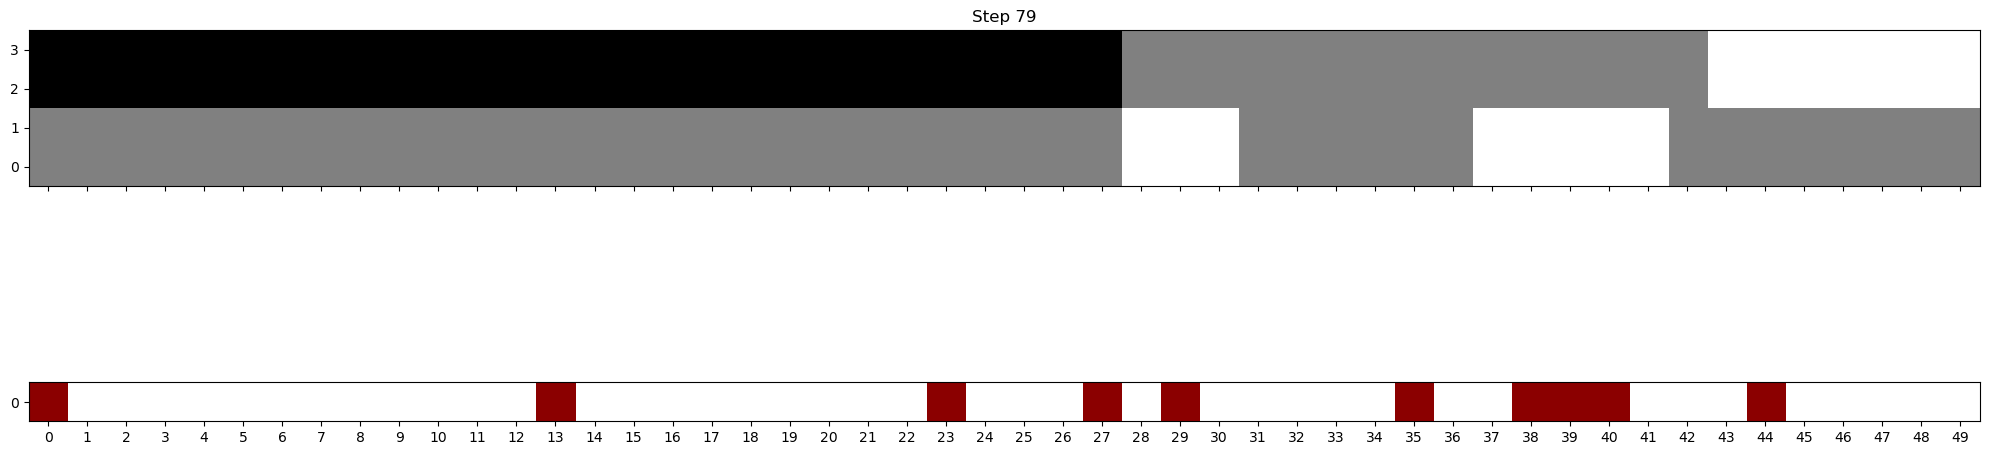

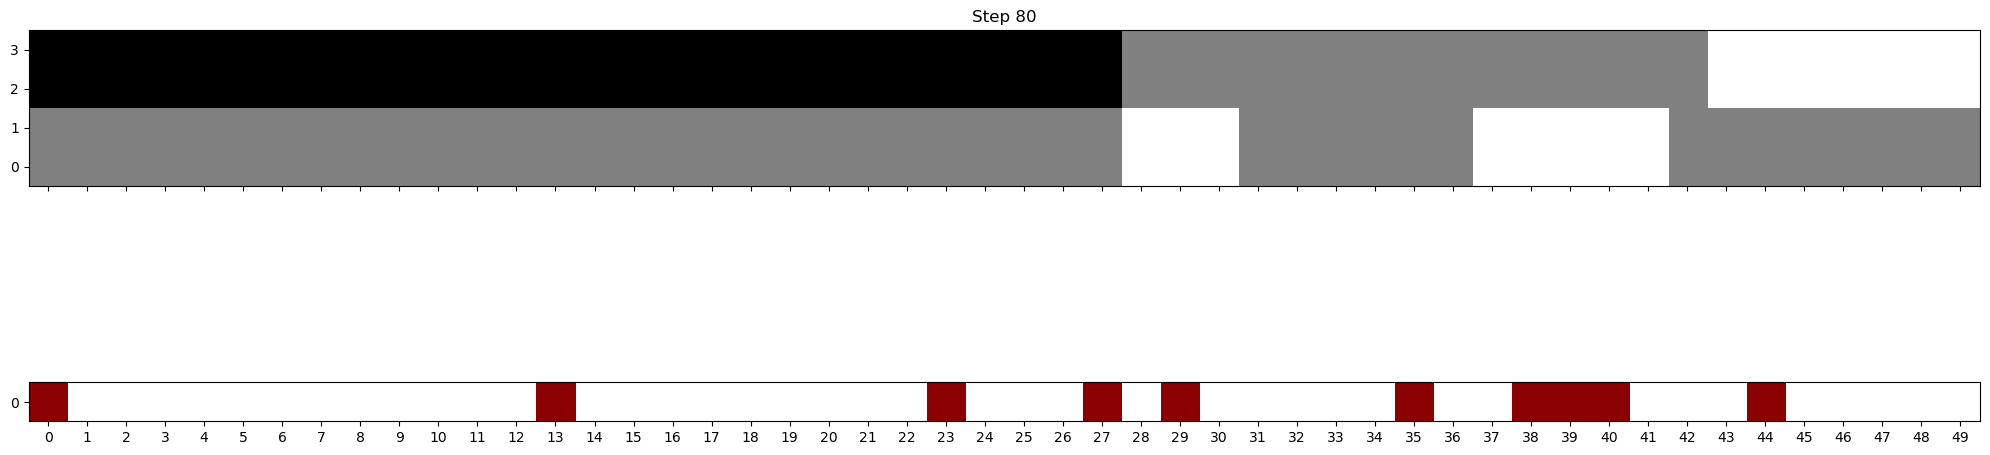

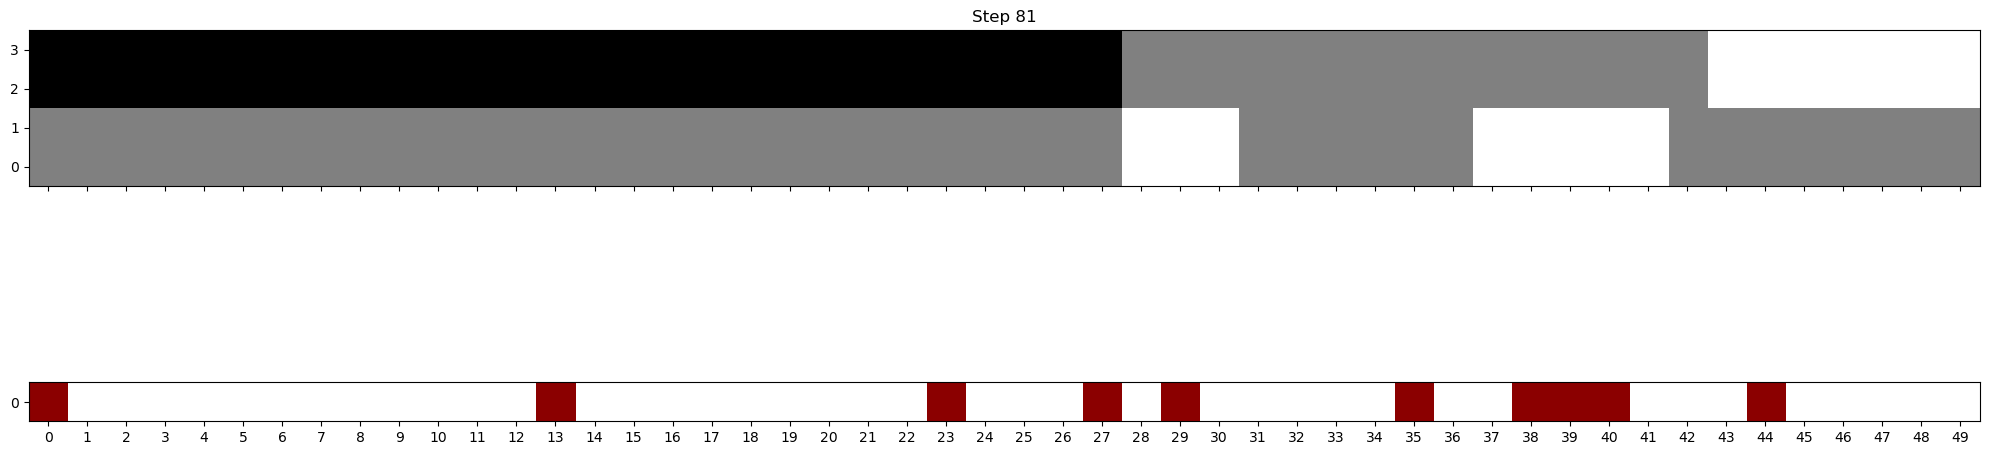

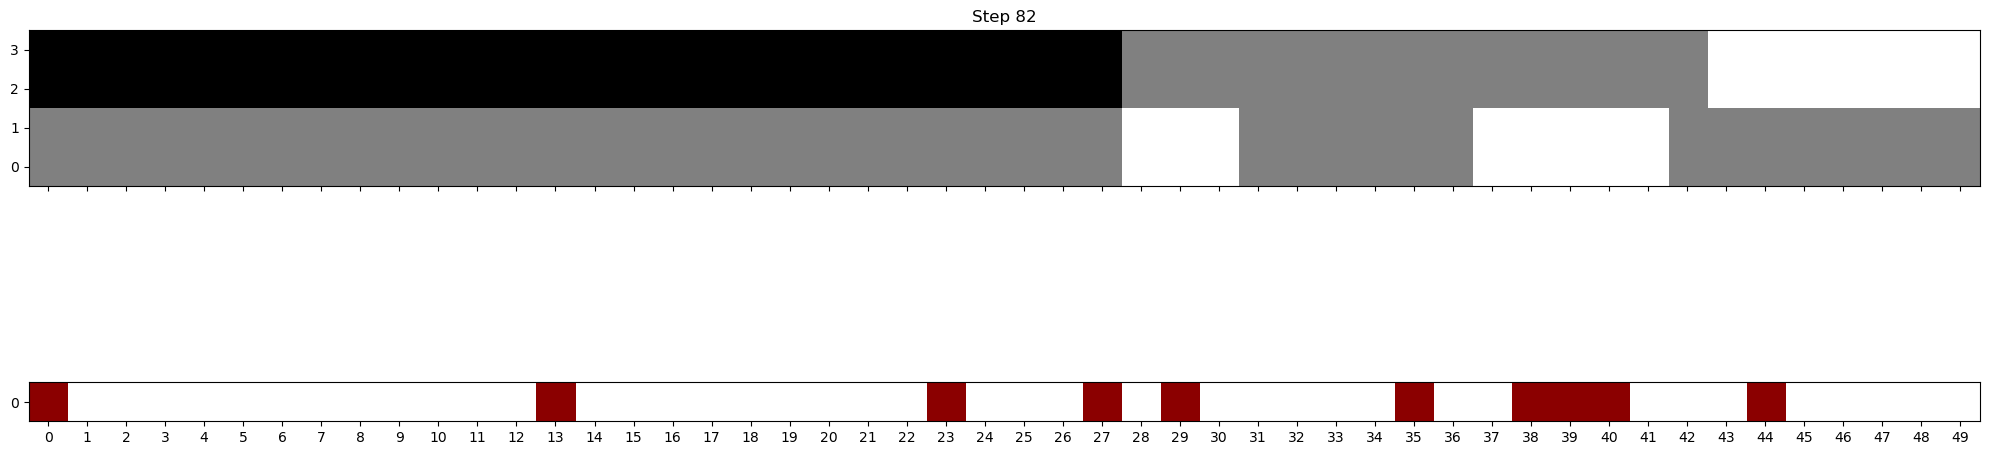

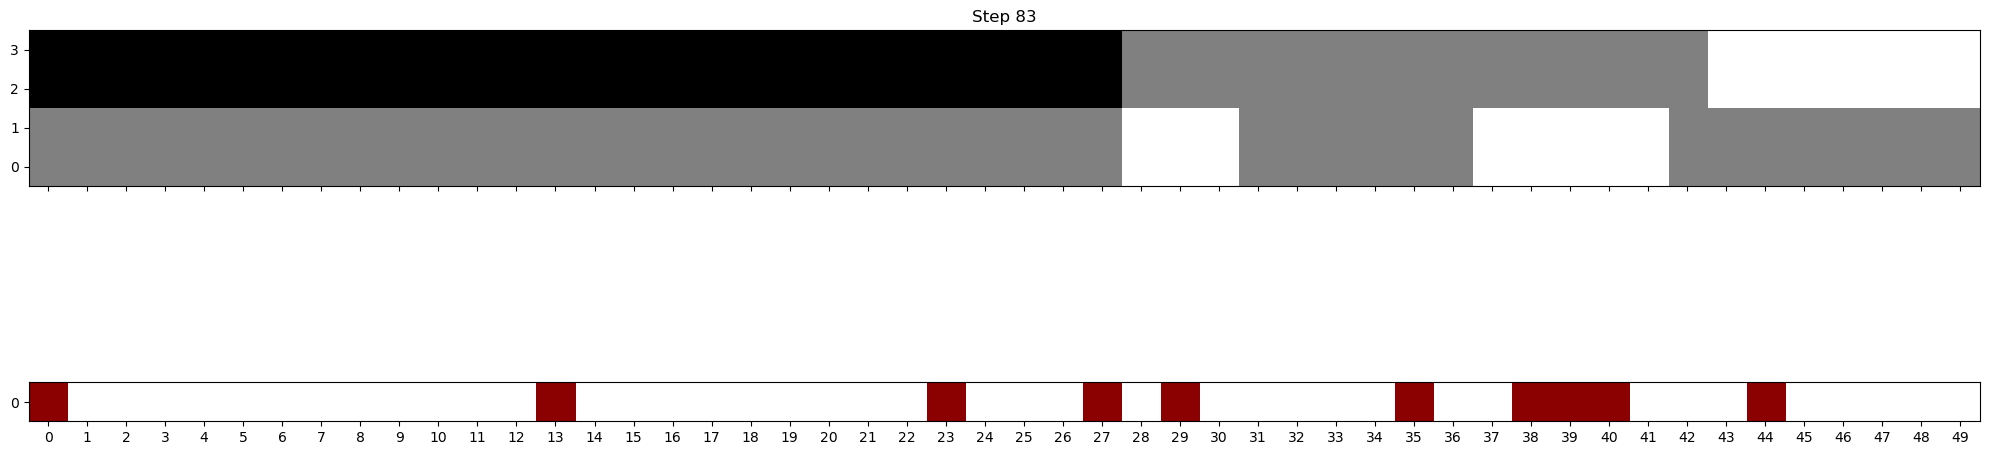

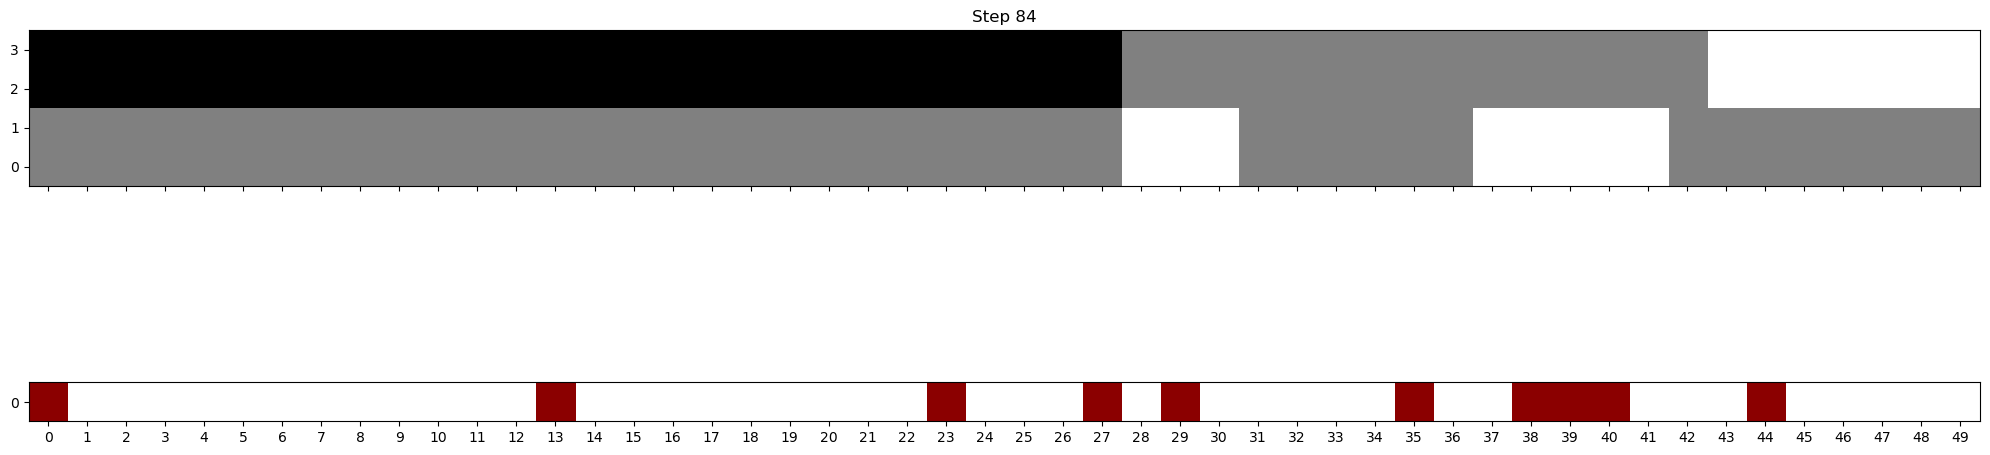

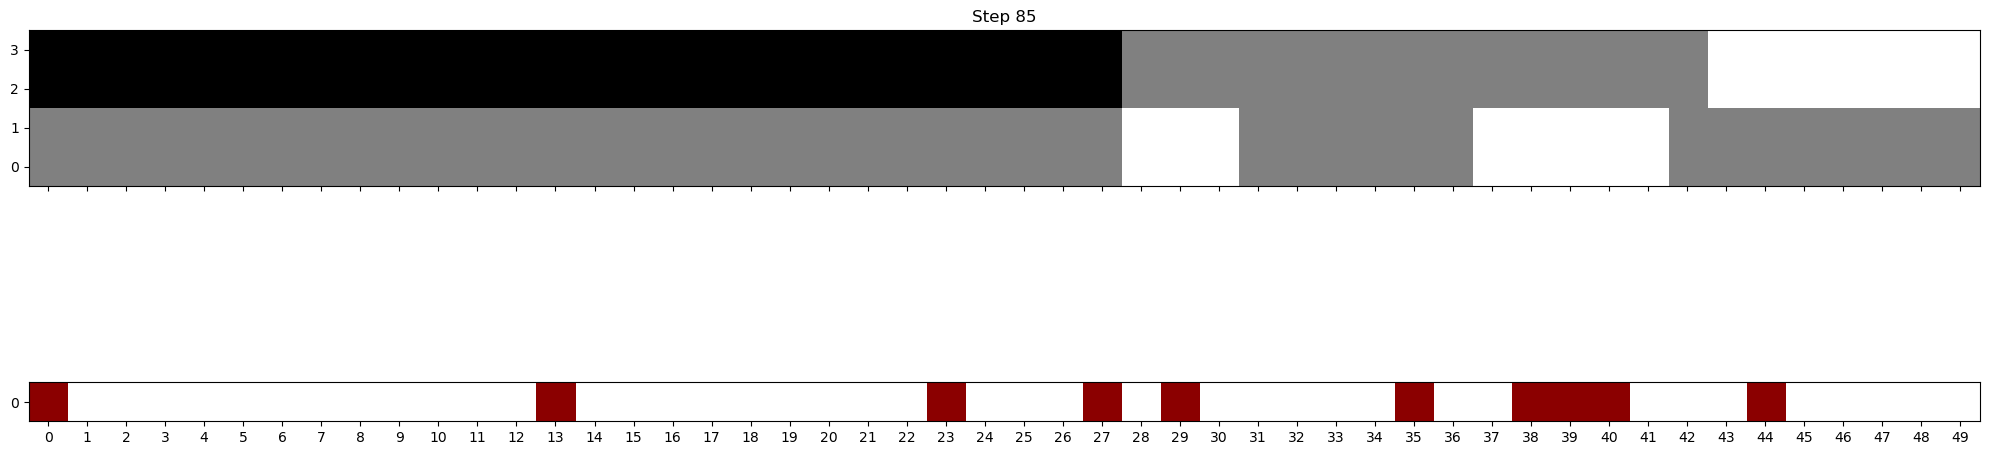

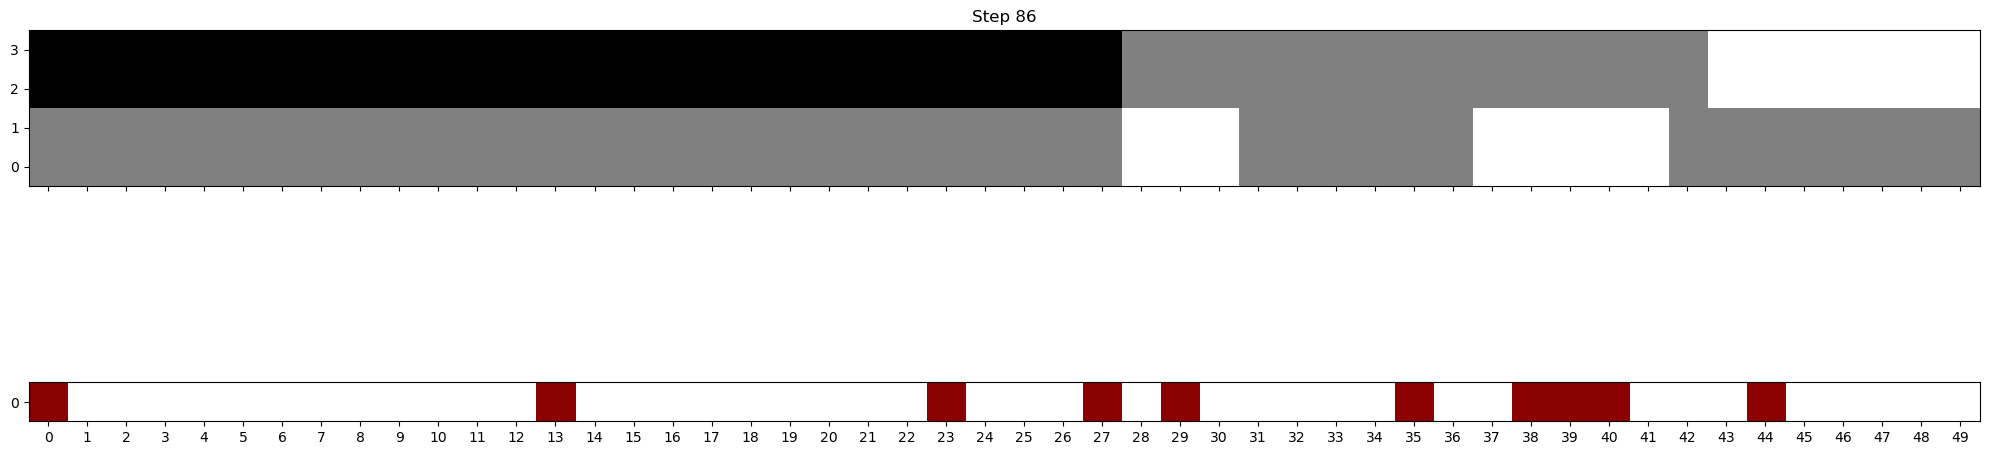

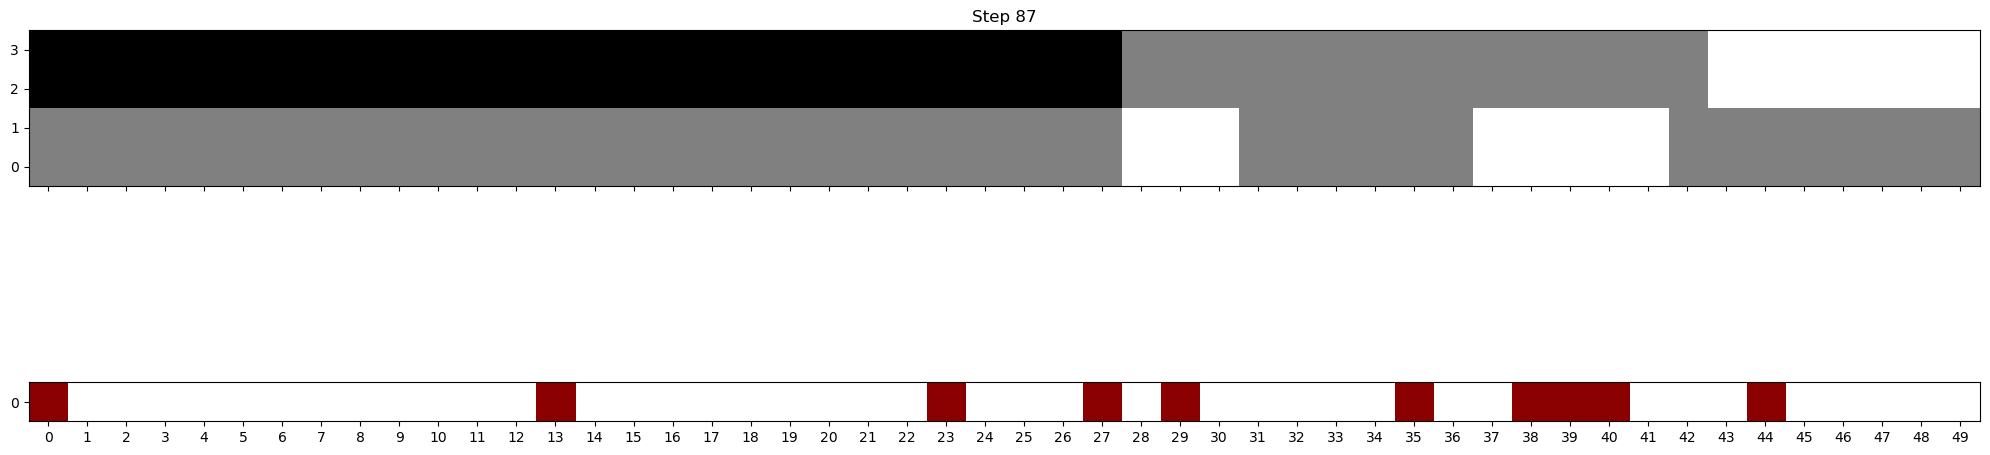

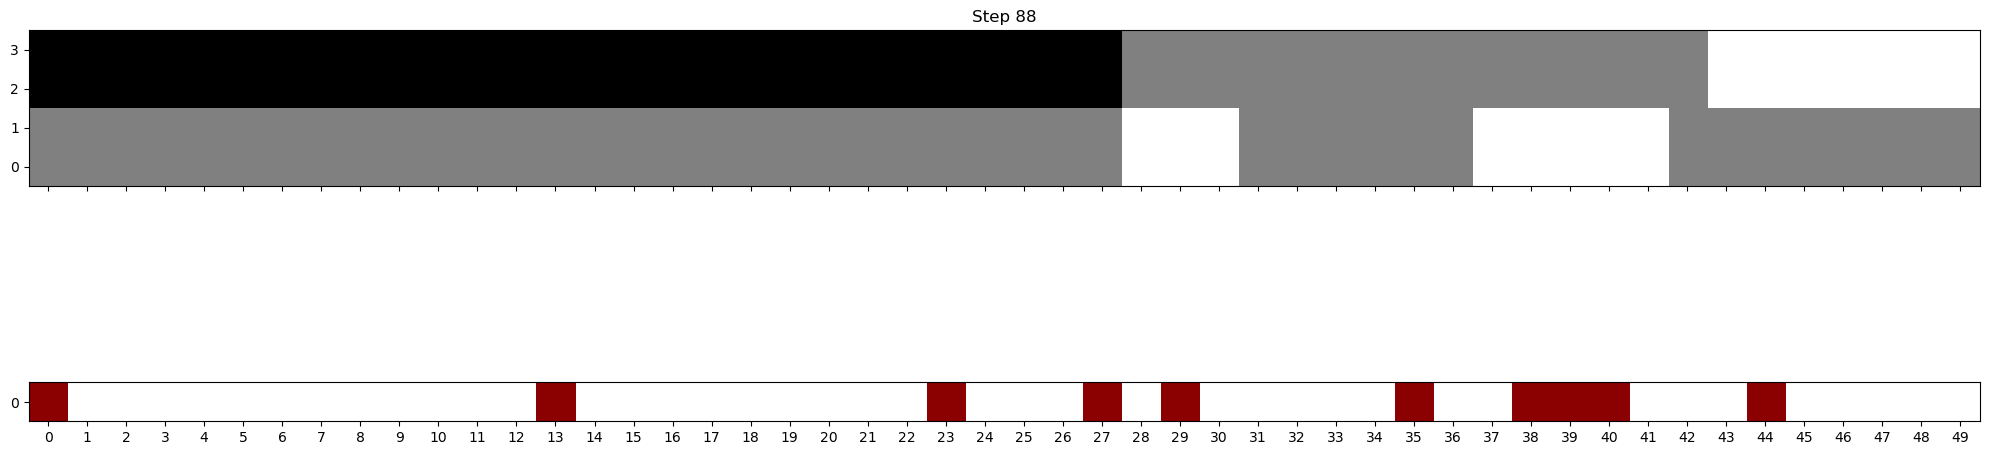

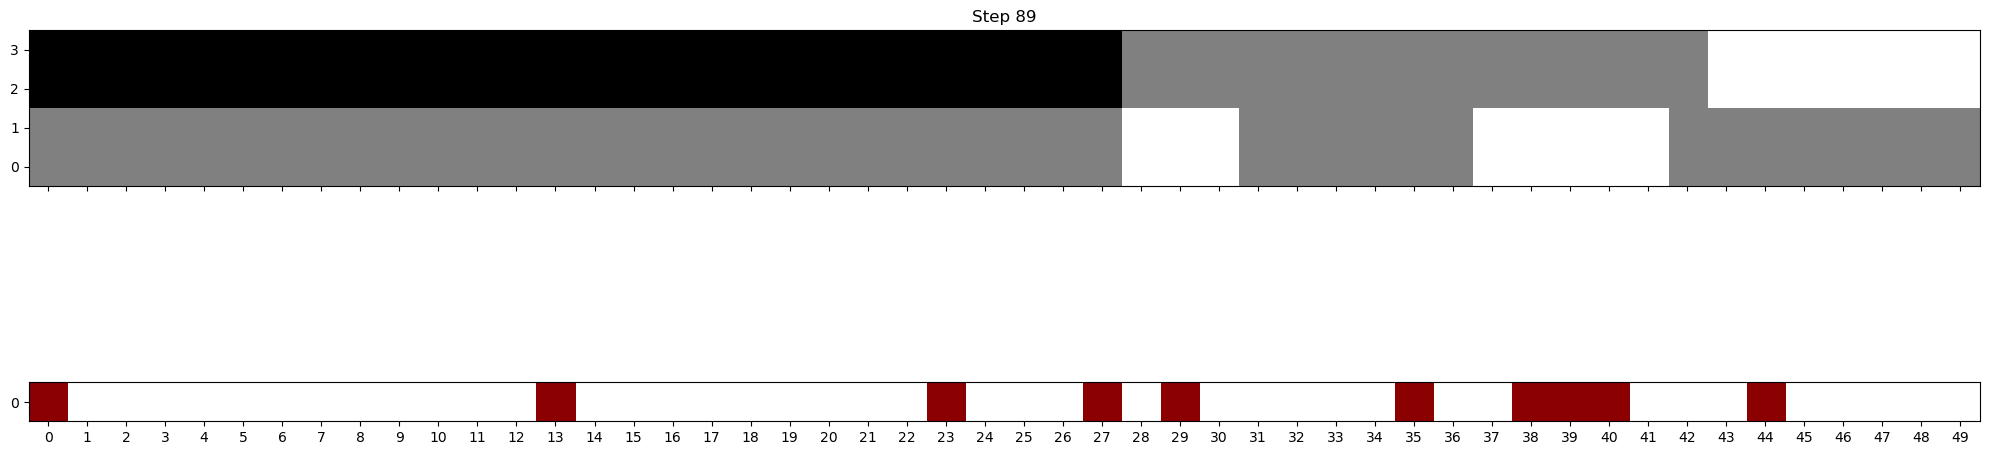

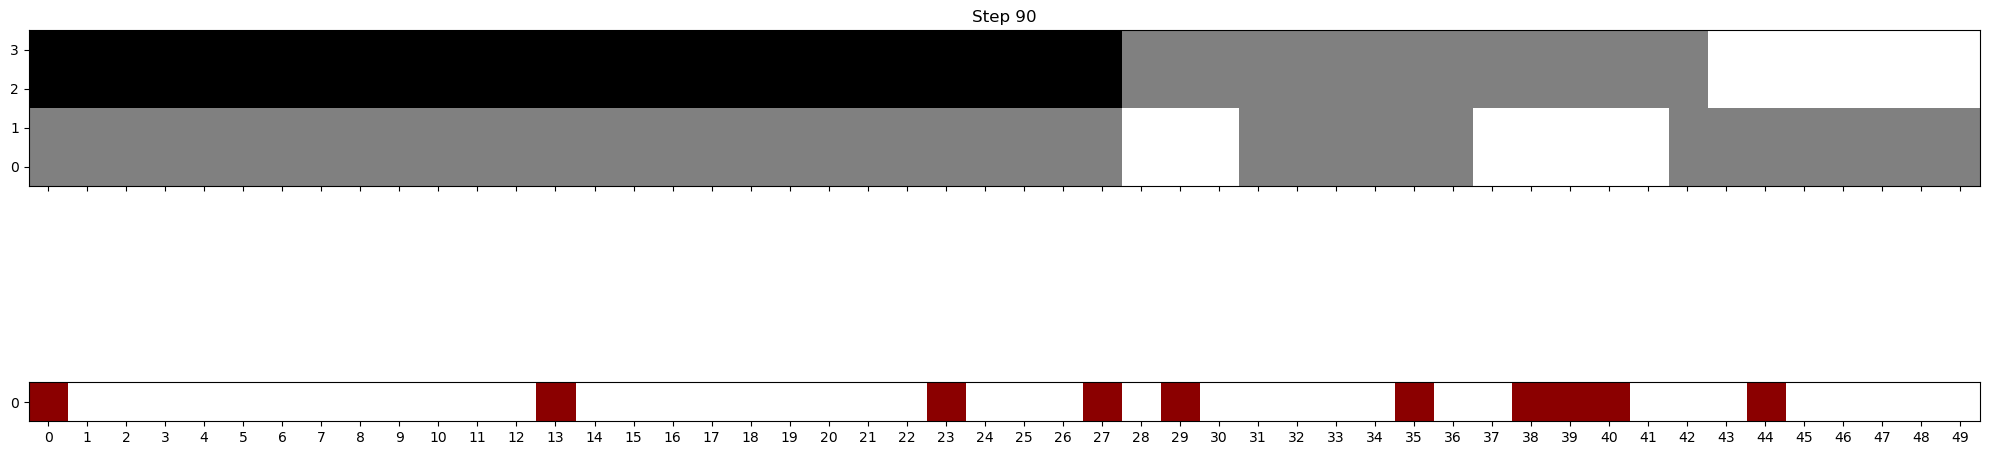

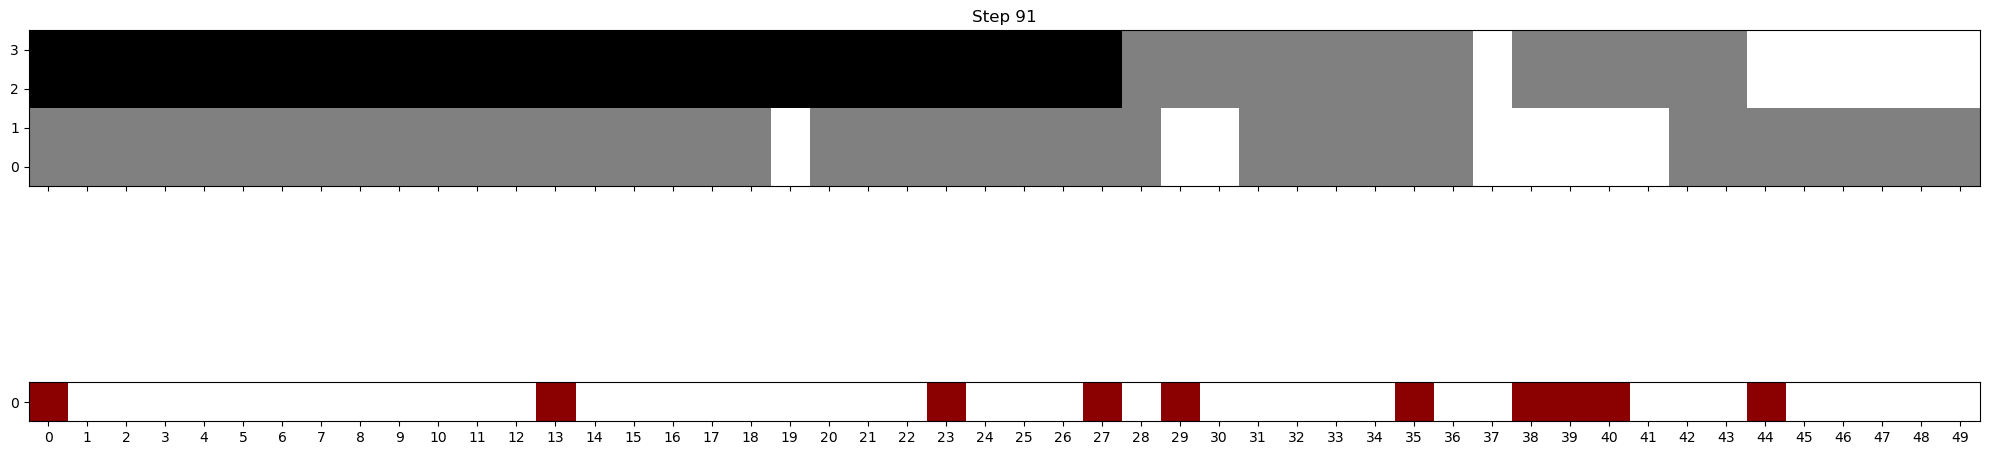

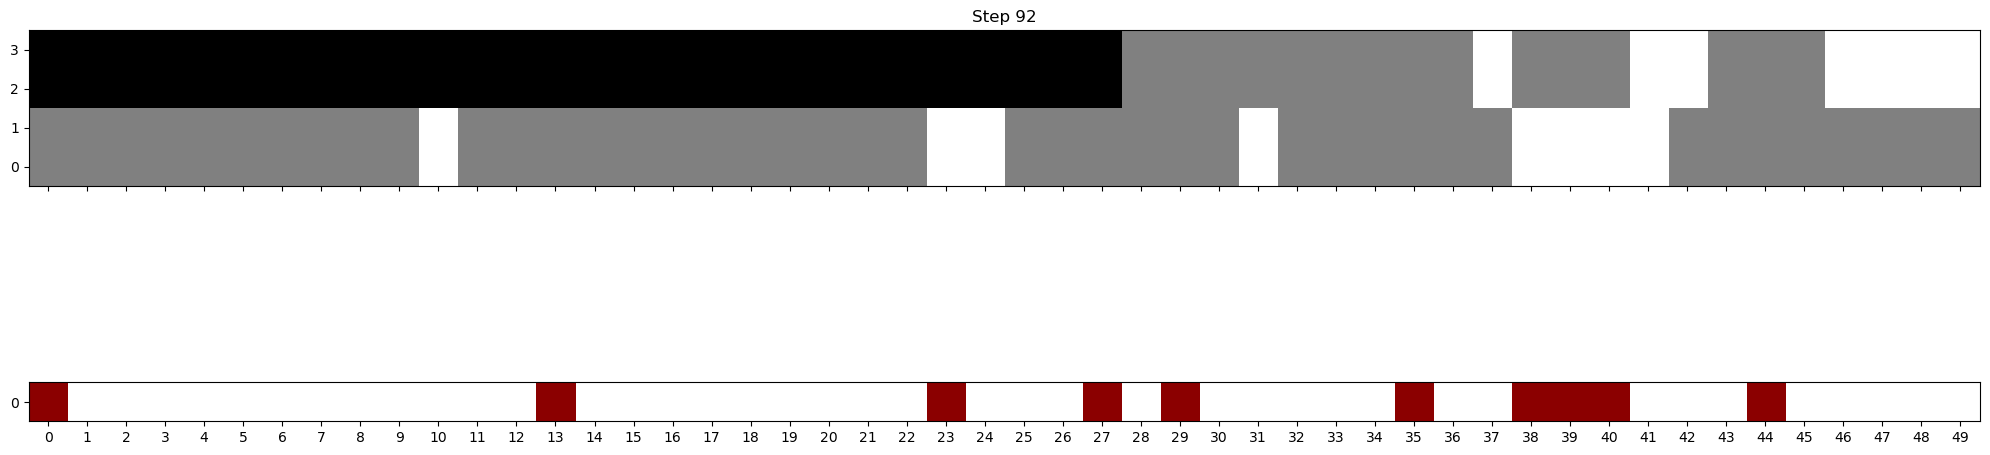

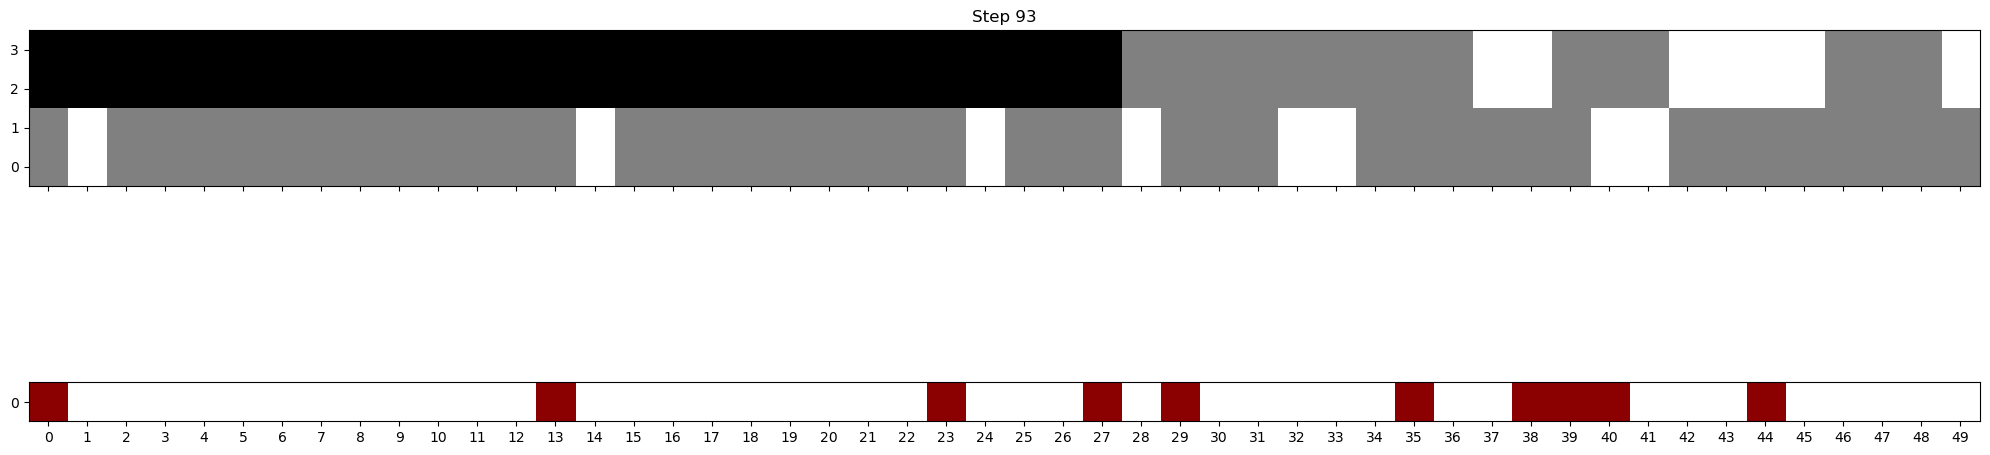

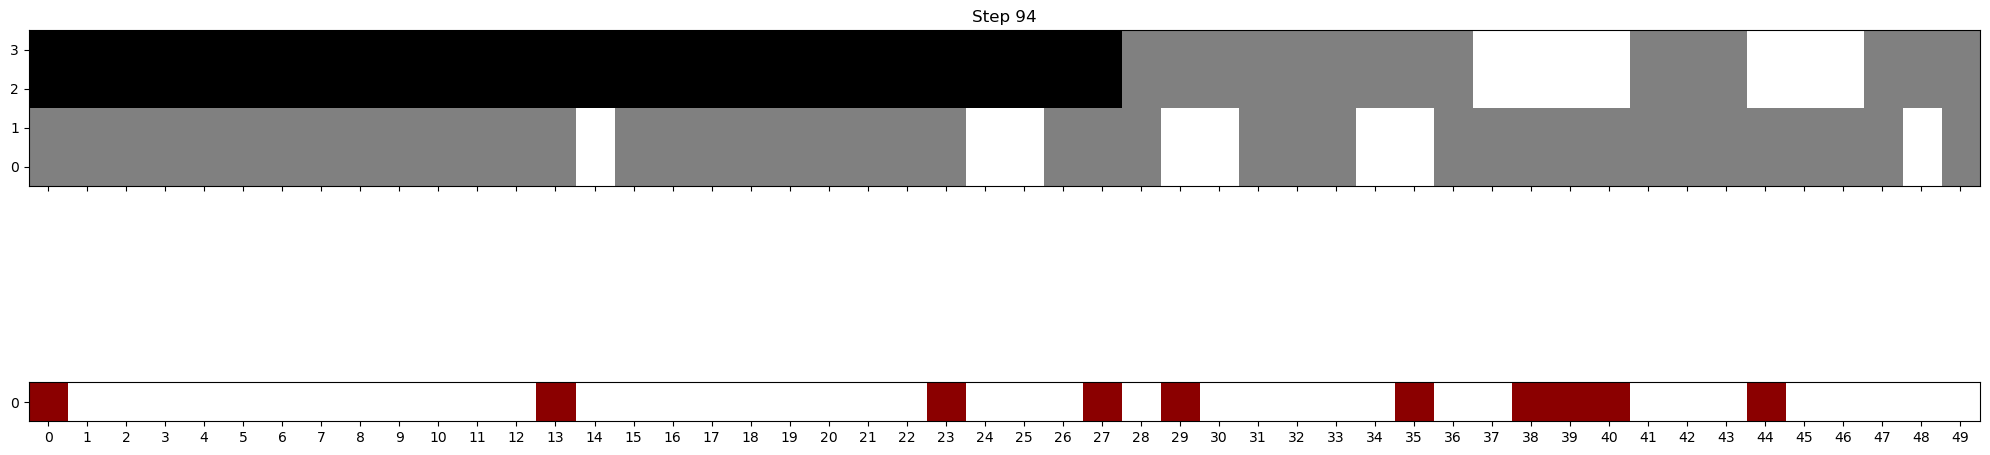

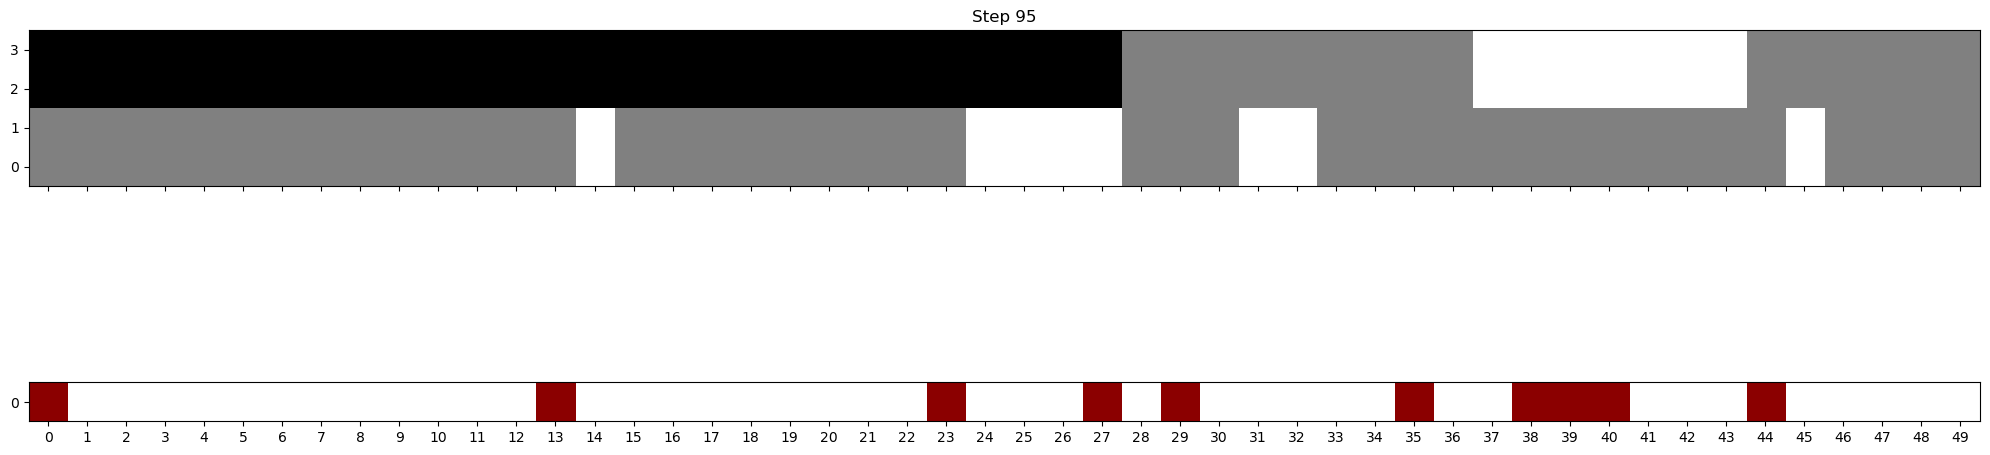

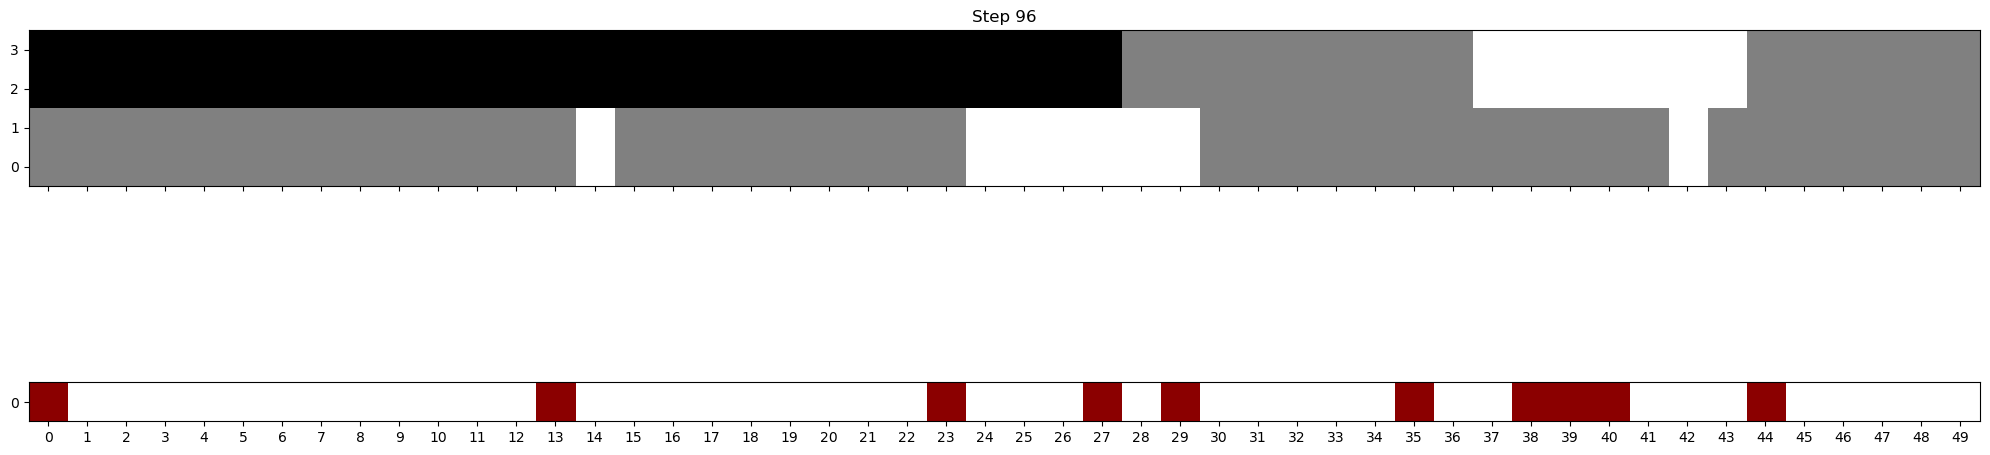

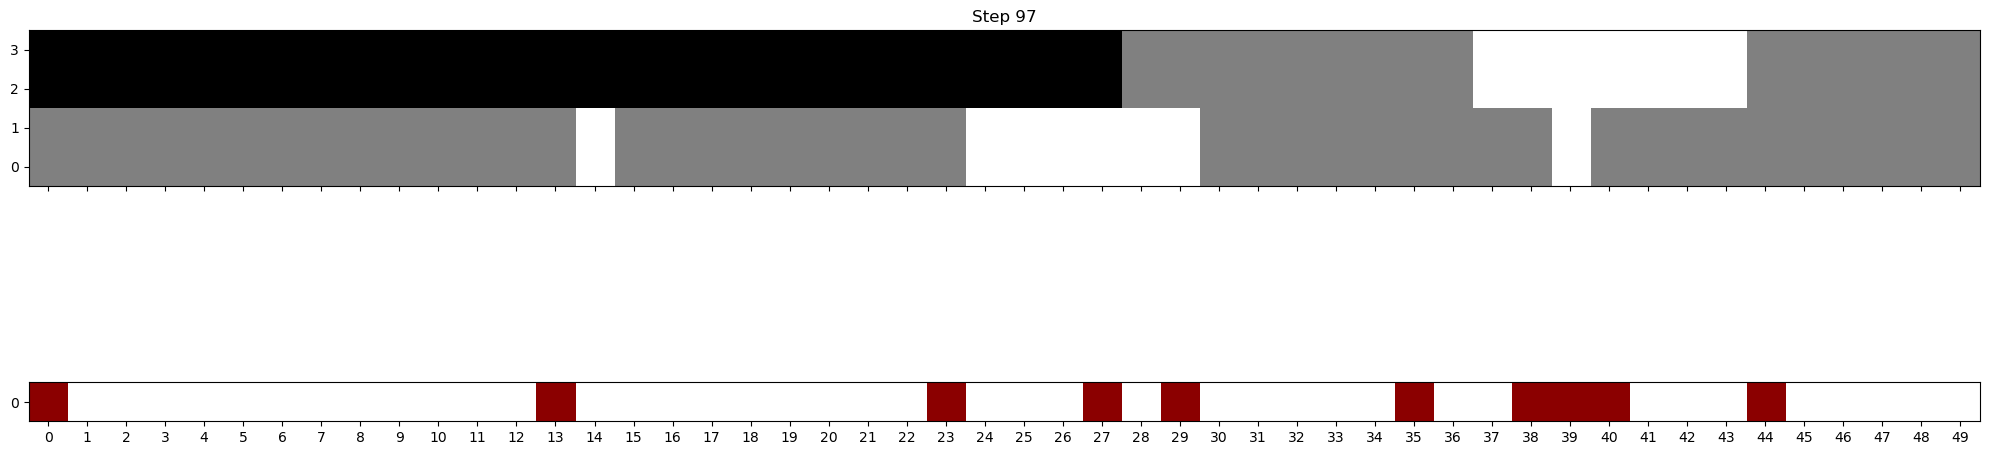

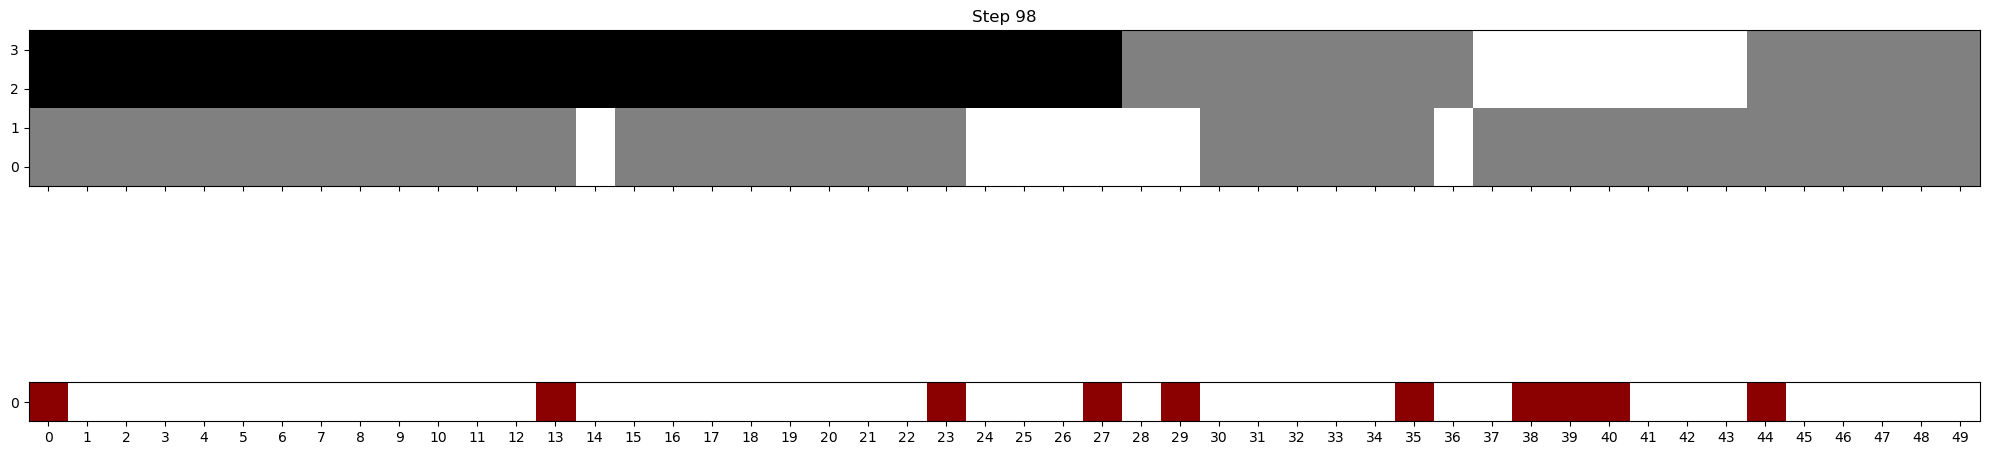

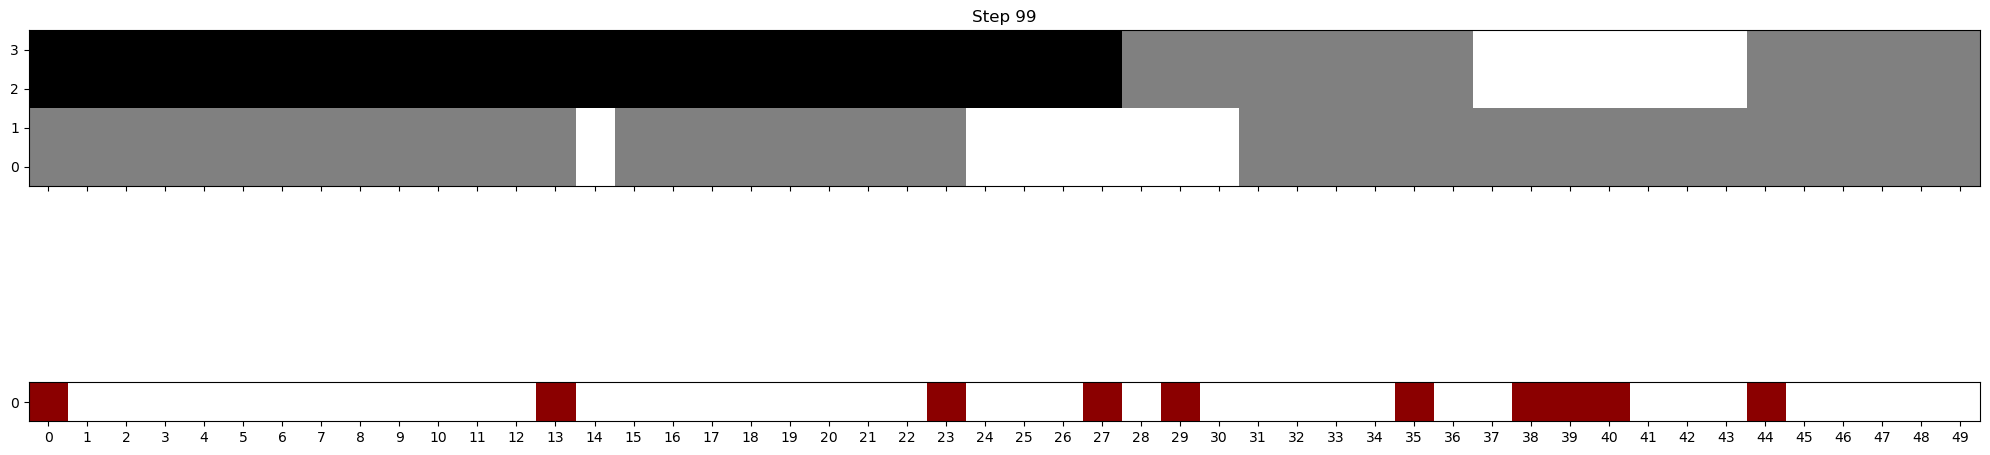

(    Timestep  Actual Density  Actual Truck Fraction  Throughput  \
 0          0            0.07               1.000000           0   
 1          1            0.14               1.000000           0   
 2          2            0.17               0.666667           0   
 3          3            0.20               0.500000           0   
 4          4            0.27               0.600000           0   
 ..       ...             ...                    ...         ...   
 95        95            0.85               0.173913           0   
 96        96            0.85               0.173913           0   
 97        97            0.85               0.173913           0   
 98        98            0.85               0.173913           0   
 99        99            0.85               0.173913           0   
 
     Passenger Throughput  Jeep Throughput  Truck Throughput  \
 0                      0                0                 0   
 1                      0                0            

In [4]:
integrated_simulator.run_simulation(100, 10, 0.8, 0.2, safe_stopping_speed, safe_deceleration, jeepney_allowed_rows, truck_allowed_rows, visualize=True)
#max_timesteps, truck_lane_change_prob, jeep_lane_change_prob, transient_time, density, truck_fraction,stop_to_stop_distance, safe_stopping_speed, safe_deceleration, jeepney_allowed_rows, truck_allowed_rows,visualize=False